# Injecting flares into each of the binary systems based on Davenport distribution and Hawley relaiton to energy and duration

This script takes a dataframe of the sample and injects flares into stars one by one, recovering those that would have been seen above the given detection threshold. Follow comments throughout for process.

In [116]:
# Import modules 
import matplotlib.pyplot as plt 
import numpy as np 
import pandas as pd 
import random 
import numpy.random as ra 
import math 
import time

In [117]:
# Open file of G/M binaries
binaries = pd.read_csv('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_5/final_sample_gm_binaries_flux2.csv')
print('There are ' + str(len(binaries)) + ' G/M binaries to consider.')

There are 21180 G/M binaries to consider.


In [118]:
#Defining the davenport functions that determine the referse cumulative distribution 
def func(t, m, a1, b1, c1):
    return (a1*np.log10(t) + b1*m + c1), a1, b1, c1
def func_2(t, m, a2, b2, c2):
    return (a2*np.log10(t) + b2*m + c2), a2, b2, c2

List length is 21180


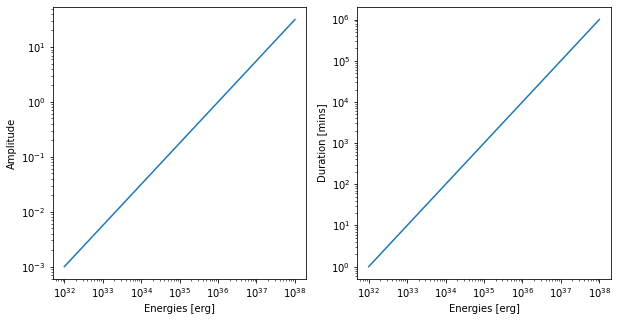

In [119]:
# Setting up lists for the x-axes and costants for the code
list_len = range(0, len(binaries['logAge']))
print('List length is ' + str(len(list_len)))

quart_time_days = int(496) # How many days in a Kepler quarter
quart_time_list = np.linspace(1, 496, 496, dtype=int)

x_value = 1000 # How many x_values to include in the distribution 
xdata = np.logspace(32, 38, x_value)

flare_amp_list = np.logspace(-3, 1.5, x_value) # List of possible flare amplitudes
duration_data = np.logspace(0, 6, x_value) # List of possible flare durations

plt.figure(figsize=(10, 5))
plt.subplot(121)
plt.plot(xdata, flare_amp_list)
plt.ylabel('Amplitude')
plt.xlabel('Energies [erg]')
plt.xscale('log')
plt.yscale('log')
plt.subplot(122)
plt.plot(xdata, duration_data)
plt.ylabel('Duration [mins]')
plt.xlabel('Energies [erg]')
plt.xscale('log')
plt.yscale('log')
plt.show()

In [120]:
# Defining parameters that will be different for each individual system
def get_parameters(i):
    t = (10**(binaries['logAge'][i])) / 10**6
    m = binaries['sec_mass'][i]
    kic = binaries['# Index'][i]
    print('Index: ' + str(kic))
    flux_rat = binaries['fr'][i]
    primary_flux = binaries['p_flux'][i]
    sec_flux = binaries['s_flux'][i]
    temp = binaries['sec_temp'][i]
    print('Age: ' + str(round(t,2)) + ' Myr and Mass: ' + str(round(m, 2)) + ' M_sun.')
    return t, m, primary_flux, flux_rat, temp, sec_flux, kic

In [121]:
# Generating flare energies 
def gen_en(new_xdata, cum_prob, R):
    
    gen_energies = [float(xdata[np.argwhere(cum_prob == np.amin(cum_prob[(cum_prob - r) > 0]))]) for r in R]
    
    new_gen_energies = []
    for i in gen_energies:
        new_gen_energies.append(float(i))
    return new_gen_energies 

In [122]:
#Define the durations for the flares (based on Hawley)
def flare_durs(new_gen_energies):
    for j in new_gen_energies: 
        b = -11.90877707139261
        m = 0.4268323316298744
        dur = (m * np.log10(j)) + b
        dur = 10**dur
        total_flare_durations.append(dur)
    return total_flare_durations

In [123]:
# Define the fluxes and amplitudes of the flares (Hawley)
def flare_flux(new_xdata, flare_amp_list, sec_flux):
    flare_amps = []
    flare_fluxes = []
    for j in range(len(new_gen_energies)):
        b = -21.10764088798248
        m = 0.6103343245801489
        amp = b + (m *  np.log10(new_gen_energies[j]))
        amp = 10**amp
        flare_amps.append(amp)
        flare_flux = (amp * sec_flux) + sec_flux
        flare_fluxes.append(flare_flux)
    return flare_fluxes, flare_amps

In [124]:
# Defining the flux ratios 
def flux_rats(primary_flux, flare_fluxes, flux_rat, sec_flux):
    flare_total_ratio_list = []
    for i in range(len(flare_fluxes)):
        flare_total_ratio_list.append((flare_fluxes[i]/(primary_flux + sec_flux)))
    return flare_total_ratio_list

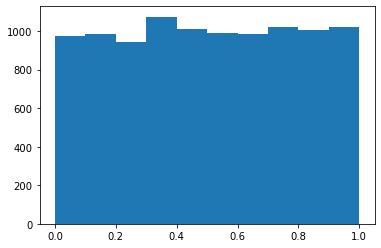


Star Number: 0
Index: 1622695.0
Age: 4897.79 Myr and Mass: 0.42 M_sun.

Star Number: 1
Index: 5399620.0
Age: 2238.72 Myr and Mass: 0.62 M_sun.

Star Number: 2
Index: 178578.0
Age: 6456.54 Myr and Mass: 0.19 M_sun.

Star Number: 3
Index: 3556404.0
Age: 5370.32 Myr and Mass: 0.24 M_sun.

Star Number: 4
Index: 2530325.0
Age: 11748.98 Myr and Mass: 0.64 M_sun.

Star Number: 5
Index: 2095788.0
Age: 3090.3 Myr and Mass: 0.31 M_sun.

Star Number: 6
Index: 11769359.0
Age: 2041.74 Myr and Mass: 0.57 M_sun.

Star Number: 7
Index: 2714379.0
Age: 4265.8 Myr and Mass: 0.62 M_sun.

Star Number: 8
Index: 1436686.0
Age: 6165.95 Myr and Mass: 0.59 M_sun.

Star Number: 9
Index: 13506235.0
Age: 3548.13 Myr and Mass: 0.2 M_sun.

Star Number: 10
Index: 6469043.0
Age: 5888.44 Myr and Mass: 0.29 M_sun.

Star Number: 11
Index: 3155567.0
Age: 2691.53 Myr and Mass: 0.17 M_sun.

Star Number: 12
Index: 3326561.0
Age: 2041.74 Myr and Mass: 0.14 M_sun.

Star Number: 13
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.


Star Number: 128
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.69 M_sun.

Star Number: 129
Index: 3788911.0
Age: 6165.95 Myr and Mass: 0.32 M_sun.

Star Number: 130
Index: 4078277.0
Age: 7762.47 Myr and Mass: 0.13 M_sun.

Star Number: 131
Index: 6518236.0
Age: 11220.18 Myr and Mass: 0.39 M_sun.

Star Number: 132
Index: 480780.0
Age: 11748.98 Myr and Mass: 0.22 M_sun.

Star Number: 133
Index: 3755294.0
Age: 4897.79 Myr and Mass: 0.1 M_sun.

Star Number: 134
Index: 2606896.0
Age: 6456.54 Myr and Mass: 0.29 M_sun.

Star Number: 135
Index: 2255255.0
Age: 7762.47 Myr and Mass: 0.22 M_sun.

Star Number: 136
Index: 12064071.0
Age: 11220.18 Myr and Mass: 0.64 M_sun.

Star Number: 137
Index: 2198492.0
Age: 2344.23 Myr and Mass: 0.56 M_sun.

Star Number: 138
Index: 2763627.0
Age: 7762.47 Myr and Mass: 0.16 M_sun.

Star Number: 139
Index: 2694774.0
Age: 2570.4 Myr and Mass: 0.36 M_sun.

Star Number: 140
Index: 835614.0
Age: 2818.38 Myr and Mass: 0.34 M_sun.

Star Number: 141
Index: 2343841.0
Age:


Star Number: 270
Index: 2444072.0
Age: 4677.35 Myr and Mass: 0.22 M_sun.

Star Number: 271
Index: 7481618.0
Age: 7079.46 Myr and Mass: 0.36 M_sun.

Star Number: 272
Index: 2617776.0
Age: 7413.1 Myr and Mass: 0.65 M_sun.

Star Number: 273
Index: 3017172.0
Age: 5128.61 Myr and Mass: 0.3 M_sun.

Star Number: 274
Index: 335160.0
Age: 11220.18 Myr and Mass: 0.35 M_sun.

Star Number: 275
Index: 2701747.0
Age: 3090.3 Myr and Mass: 0.64 M_sun.

Star Number: 276
Index: 2138147.0
Age: 7413.1 Myr and Mass: 0.67 M_sun.

Star Number: 277
Index: 1583656.0
Age: 2818.38 Myr and Mass: 0.53 M_sun.

Star Number: 278
Index: 7181037.0
Age: 2454.71 Myr and Mass: 0.16 M_sun.

Star Number: 279
Index: 3020200.0
Age: 5370.32 Myr and Mass: 0.16 M_sun.

Star Number: 280
Index: 2013121.0
Age: 5888.44 Myr and Mass: 0.62 M_sun.

Star Number: 281
Index: 3936102.0
Age: 2041.74 Myr and Mass: 0.67 M_sun.

Star Number: 282
Index: 6575442.0
Age: 3548.13 Myr and Mass: 0.18 M_sun.

Star Number: 283
Index: 4018247.0
Age: 56


Star Number: 410
Index: 6856278.0
Age: 1479.11 Myr and Mass: 0.53 M_sun.

Star Number: 411
Index: 11464164.0
Age: 5128.61 Myr and Mass: 0.47 M_sun.

Star Number: 412
Index: 8010748.0
Age: 2454.71 Myr and Mass: 0.15 M_sun.

Star Number: 413
Index: 2413305.0
Age: 1698.24 Myr and Mass: 0.39 M_sun.

Star Number: 414
Index: 10205298.0
Age: 5370.32 Myr and Mass: 0.18 M_sun.

Star Number: 415
Index: 3977083.0
Age: 3890.45 Myr and Mass: 0.39 M_sun.

Star Number: 416
Index: 1984923.0
Age: 2691.53 Myr and Mass: 0.2 M_sun.

Star Number: 417
Index: 4187632.0
Age: 2454.71 Myr and Mass: 0.32 M_sun.

Star Number: 418
Index: 4239221.0
Age: 4677.35 Myr and Mass: 0.5 M_sun.

Star Number: 419
Index: 22541.0
Age: 3388.44 Myr and Mass: 0.36 M_sun.

Star Number: 420
Index: 8955016.0
Age: 5128.61 Myr and Mass: 0.14 M_sun.

Star Number: 421
Index: 184359.0
Age: 6760.83 Myr and Mass: 0.45 M_sun.

Star Number: 422
Index: 7170550.0
Age: 1698.24 Myr and Mass: 0.33 M_sun.

Star Number: 423
Index: 8595402.0
Age: 2


Star Number: 551
Index: 2707586.0
Age: 3548.13 Myr and Mass: 0.42 M_sun.

Star Number: 552
Index: 3555746.0
Age: 5370.32 Myr and Mass: 0.27 M_sun.

Star Number: 553
Index: 3317090.0
Age: 1230.27 Myr and Mass: 0.29 M_sun.

Star Number: 554
Index: 11185545.0
Age: 5623.41 Myr and Mass: 0.21 M_sun.

Star Number: 555
Index: 4742365.0
Age: 3715.35 Myr and Mass: 0.19 M_sun.

Star Number: 556
Index: 693046.0
Age: 4073.8 Myr and Mass: 0.23 M_sun.

Star Number: 557
Index: 2217464.0
Age: 4677.35 Myr and Mass: 0.22 M_sun.

Star Number: 558
Index: 12805505.0
Age: 11748.98 Myr and Mass: 0.12 M_sun.

Star Number: 559
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.57 M_sun.

Star Number: 560
Index: 1361717.0
Age: 2041.74 Myr and Mass: 0.61 M_sun.

Star Number: 561
Index: 11414336.0
Age: 1778.28 Myr and Mass: 0.59 M_sun.

Star Number: 562
Index: 1362797.0
Age: 2137.96 Myr and Mass: 0.15 M_sun.

Star Number: 563
Index: 1465112.0
Age: 7413.1 Myr and Mass: 0.23 M_sun.

Star Number: 564
Index: 8565922.0
Age


Star Number: 697
Index: 3936382.0
Age: 2041.74 Myr and Mass: 0.58 M_sun.

Star Number: 698
Index: 2092886.0
Age: 2691.53 Myr and Mass: 0.27 M_sun.

Star Number: 699
Index: 10555873.0
Age: 3548.13 Myr and Mass: 0.15 M_sun.

Star Number: 700
Index: 840755.0
Age: 3090.3 Myr and Mass: 0.35 M_sun.

Star Number: 701
Index: 4072425.0
Age: 7762.47 Myr and Mass: 0.37 M_sun.

Star Number: 702
Index: 1777873.0
Age: 1862.09 Myr and Mass: 0.25 M_sun.

Star Number: 703
Index: 5058439.0
Age: 2691.53 Myr and Mass: 0.29 M_sun.

Star Number: 704
Index: 1790937.0
Age: 2691.53 Myr and Mass: 0.42 M_sun.

Star Number: 705
Index: 1349854.0
Age: 1122.02 Myr and Mass: 0.24 M_sun.

Star Number: 706
Index: 8110382.0
Age: 5888.44 Myr and Mass: 0.61 M_sun.

Star Number: 707
Index: 4483578.0
Age: 4677.35 Myr and Mass: 0.26 M_sun.

Star Number: 708
Index: 6682748.0
Age: 11748.98 Myr and Mass: 0.66 M_sun.

Star Number: 709
Index: 11692960.0
Age: 7762.47 Myr and Mass: 0.56 M_sun.

Star Number: 710
Index: 2419304.0
Ag


Star Number: 843
Index: 1171079.0
Age: 3235.94 Myr and Mass: 0.14 M_sun.

Star Number: 844
Index: 1976085.0
Age: 1348.96 Myr and Mass: 0.63 M_sun.

Star Number: 845
Index: 9195335.0
Age: 2344.23 Myr and Mass: 0.61 M_sun.

Star Number: 846
Index: 11155971.0
Age: 3235.94 Myr and Mass: 0.41 M_sun.

Star Number: 847
Index: 3412760.0
Age: 7079.46 Myr and Mass: 0.34 M_sun.

Star Number: 848
Index: 7279506.0
Age: 7413.1 Myr and Mass: 0.1 M_sun.

Star Number: 849
Index: 3556255.0
Age: 5370.32 Myr and Mass: 0.22 M_sun.

Star Number: 850
Index: 835321.0
Age: 2818.38 Myr and Mass: 0.66 M_sun.

Star Number: 851
Index: 15575173.0
Age: 1548.82 Myr and Mass: 0.59 M_sun.

Star Number: 852
Index: 4869468.0
Age: 7079.46 Myr and Mass: 0.21 M_sun.

Star Number: 853
Index: 11462415.0
Age: 4897.79 Myr and Mass: 0.39 M_sun.

Star Number: 854
Index: 11412347.0
Age: 1621.81 Myr and Mass: 0.23 M_sun.

Star Number: 855
Index: 4697709.0
Age: 2454.71 Myr and Mass: 0.29 M_sun.

Star Number: 856
Index: 4220193.0
Ag


Star Number: 986
Index: 10530278.0
Age: 3090.3 Myr and Mass: 0.51 M_sun.

Star Number: 987
Index: 3955638.0
Age: 2951.21 Myr and Mass: 0.19 M_sun.

Star Number: 988
Index: 7933412.0
Age: 11220.18 Myr and Mass: 0.1 M_sun.

Star Number: 989
Index: 4421726.0
Age: 1949.84 Myr and Mass: 0.3 M_sun.

Star Number: 990
Index: 1399980.0
Age: 4265.8 Myr and Mass: 0.37 M_sun.

Star Number: 991
Index: 2707718.0
Age: 3548.13 Myr and Mass: 0.18 M_sun.

Star Number: 992
Index: 12150832.0
Age: 2951.21 Myr and Mass: 0.61 M_sun.

Star Number: 993
Index: 5744558.0
Age: 1949.84 Myr and Mass: 0.46 M_sun.

Star Number: 994
Index: 593064.0
Age: 7762.47 Myr and Mass: 0.28 M_sun.

Star Number: 995
Index: 979492.0
Age: 1288.25 Myr and Mass: 0.11 M_sun.

Star Number: 996
Index: 4557154.0
Age: 7413.1 Myr and Mass: 0.62 M_sun.

Star Number: 997
Index: 3157922.0
Age: 2818.38 Myr and Mass: 0.33 M_sun.

Star Number: 998
Index: 4738704.0
Age: 3548.13 Myr and Mass: 0.32 M_sun.

Star Number: 999
Index: 2314268.0
Age: 32


Star Number: 1132
Index: 131597.0
Age: 1778.28 Myr and Mass: 0.54 M_sun.

Star Number: 1133
Index: 2550053.0
Age: 1698.24 Myr and Mass: 0.54 M_sun.

Star Number: 1134
Index: 1041103.0
Age: 6165.95 Myr and Mass: 0.37 M_sun.

Star Number: 1135
Index: 1000091.0
Age: 3090.3 Myr and Mass: 0.26 M_sun.

Star Number: 1136
Index: 11583718.0
Age: 1174.9 Myr and Mass: 0.11 M_sun.

Star Number: 1137
Index: 532596.0
Age: 3890.45 Myr and Mass: 0.19 M_sun.

Star Number: 1138
Index: 1841808.0
Age: 5370.32 Myr and Mass: 0.58 M_sun.

Star Number: 1139
Index: 4686759.0
Age: 2137.96 Myr and Mass: 0.29 M_sun.

Star Number: 1140
Index: 3413002.0
Age: 7079.46 Myr and Mass: 0.1 M_sun.

Star Number: 1141
Index: 554173.0
Age: 5623.41 Myr and Mass: 0.18 M_sun.

Star Number: 1142
Index: 6427875.0
Age: 1548.82 Myr and Mass: 0.22 M_sun.

Star Number: 1143
Index: 3998837.0
Age: 4897.79 Myr and Mass: 0.4 M_sun.

Star Number: 1144
Index: 6549266.0
Age: 1412.54 Myr and Mass: 0.28 M_sun.

Star Number: 1145
Index: 22341


Star Number: 1273
Index: 413148.0
Age: 5370.32 Myr and Mass: 0.15 M_sun.

Star Number: 1274
Index: 2682898.0
Age: 1071.52 Myr and Mass: 0.51 M_sun.

Star Number: 1275
Index: 6618147.0
Age: 6456.54 Myr and Mass: 0.17 M_sun.

Star Number: 1276
Index: 6911940.0
Age: 5888.44 Myr and Mass: 0.31 M_sun.

Star Number: 1277
Index: 3920540.0
Age: 1071.52 Myr and Mass: 0.37 M_sun.

Star Number: 1278
Index: 3010212.0
Age: 4677.35 Myr and Mass: 0.45 M_sun.

Star Number: 1279
Index: 5203504.0
Age: 6760.83 Myr and Mass: 0.39 M_sun.

Star Number: 1280
Index: 2997992.0
Age: 3890.45 Myr and Mass: 0.68 M_sun.

Star Number: 1281
Index: 1772795.0
Age: 1412.54 Myr and Mass: 0.53 M_sun.

Star Number: 1282
Index: 4461917.0
Age: 3715.35 Myr and Mass: 0.49 M_sun.

Star Number: 1283
Index: 1268310.0
Age: 7762.47 Myr and Mass: 0.49 M_sun.

Star Number: 1284
Index: 666445.0
Age: 1949.84 Myr and Mass: 0.41 M_sun.

Star Number: 1285
Index: 8866589.0
Age: 1862.09 Myr and Mass: 0.53 M_sun.

Star Number: 1286
Index: 2


Star Number: 1419
Index: 3019859.0
Age: 5370.32 Myr and Mass: 0.42 M_sun.

Star Number: 1420
Index: 9238976.0
Age: 3235.94 Myr and Mass: 0.16 M_sun.

Star Number: 1421
Index: 6868622.0
Age: 2570.4 Myr and Mass: 0.66 M_sun.

Star Number: 1422
Index: 6070175.0
Age: 1949.84 Myr and Mass: 0.15 M_sun.

Star Number: 1423
Index: 2191132.0
Age: 1122.02 Myr and Mass: 0.59 M_sun.

Star Number: 1424
Index: 10881997.0
Age: 2818.38 Myr and Mass: 0.26 M_sun.

Star Number: 1425
Index: 2830091.0
Age: 2344.23 Myr and Mass: 0.29 M_sun.

Star Number: 1426
Index: 8670105.0
Age: 5128.61 Myr and Mass: 0.32 M_sun.

Star Number: 1427
Index: 3525687.0
Age: 3388.44 Myr and Mass: 0.42 M_sun.

Star Number: 1428
Index: 2936776.0
Age: 11748.98 Myr and Mass: 0.29 M_sun.

Star Number: 1429
Index: 6433067.0
Age: 2238.72 Myr and Mass: 0.3 M_sun.

Star Number: 1430
Index: 141902.0
Age: 2951.21 Myr and Mass: 0.13 M_sun.

Star Number: 1431
Index: 3502758.0
Age: 1862.09 Myr and Mass: 0.39 M_sun.

Star Number: 1432
Index: 


Star Number: 1550
Index: 12596814.0
Age: 1288.25 Myr and Mass: 0.67 M_sun.

Star Number: 1551
Index: 1591326.0
Age: 3235.94 Myr and Mass: 0.66 M_sun.

Star Number: 1552
Index: 2301335.0
Age: 1479.11 Myr and Mass: 0.49 M_sun.

Star Number: 1553
Index: 5718.0
Age: 1412.54 Myr and Mass: 0.25 M_sun.

Star Number: 1554
Index: 4450104.0
Age: 3235.94 Myr and Mass: 0.32 M_sun.

Star Number: 1555
Index: 2197749.0
Age: 2238.72 Myr and Mass: 0.41 M_sun.

Star Number: 1556
Index: 538831.0
Age: 4466.84 Myr and Mass: 0.1 M_sun.

Star Number: 1557
Index: 4458579.0
Age: 3548.13 Myr and Mass: 0.44 M_sun.

Star Number: 1558
Index: 4164759.0
Age: 1071.52 Myr and Mass: 0.36 M_sun.

Star Number: 1559
Index: 1567305.0
Age: 1778.28 Myr and Mass: 0.48 M_sun.

Star Number: 1560
Index: 3711211.0
Age: 2951.21 Myr and Mass: 0.35 M_sun.

Star Number: 1561
Index: 2995181.0
Age: 3715.35 Myr and Mass: 0.2 M_sun.

Star Number: 1562
Index: 7645152.0
Age: 5370.32 Myr and Mass: 0.25 M_sun.

Star Number: 1563
Index: 1263


Star Number: 1698
Index: 6132753.0
Age: 7762.47 Myr and Mass: 0.65 M_sun.

Star Number: 1699
Index: 3946894.0
Age: 2570.4 Myr and Mass: 0.54 M_sun.

Star Number: 1700
Index: 2057264.0
Age: 11748.98 Myr and Mass: 0.28 M_sun.

Star Number: 1701
Index: 264598.0
Age: 2951.21 Myr and Mass: 0.17 M_sun.

Star Number: 1702
Index: 9166611.0
Age: 1621.81 Myr and Mass: 0.58 M_sun.

Star Number: 1703
Index: 14197502.0
Age: 3548.13 Myr and Mass: 0.21 M_sun.

Star Number: 1704
Index: 1319129.0
Age: 11748.98 Myr and Mass: 0.65 M_sun.

Star Number: 1705
Index: 16655933.0
Age: 3548.13 Myr and Mass: 0.33 M_sun.

Star Number: 1706
Index: 4176141.0
Age: 1778.28 Myr and Mass: 0.51 M_sun.

Star Number: 1707
Index: 3424123.0
Age: 7762.47 Myr and Mass: 0.37 M_sun.

Star Number: 1708
Index: 5391148.0
Age: 1949.84 Myr and Mass: 0.19 M_sun.

Star Number: 1709
Index: 2199247.0
Age: 2454.71 Myr and Mass: 0.37 M_sun.

Star Number: 1710
Index: 9632638.0
Age: 2454.71 Myr and Mass: 0.62 M_sun.

Star Number: 1711
Inde


Star Number: 1842
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.32 M_sun.

Star Number: 1843
Index: 429290.0
Age: 6760.83 Myr and Mass: 0.1 M_sun.

Star Number: 1844
Index: 4453149.0
Age: 3388.44 Myr and Mass: 0.48 M_sun.

Star Number: 1845
Index: 11408043.0
Age: 1230.27 Myr and Mass: 0.6 M_sun.

Star Number: 1846
Index: 11274684.0
Age: 1698.24 Myr and Mass: 0.54 M_sun.

Star Number: 1847
Index: 7794514.0
Age: 2570.4 Myr and Mass: 0.45 M_sun.

Star Number: 1848
Index: 5428257.0
Age: 3090.3 Myr and Mass: 0.26 M_sun.

Star Number: 1849
Index: 877022.0
Age: 5888.44 Myr and Mass: 0.46 M_sun.

Star Number: 1850
Index: 4605514.0
Age: 11220.18 Myr and Mass: 0.14 M_sun.

Star Number: 1851
Index: 4776562.0
Age: 4677.35 Myr and Mass: 0.59 M_sun.

Star Number: 1852
Index: 5041192.0
Age: 2137.96 Myr and Mass: 0.65 M_sun.

Star Number: 1853
Index: 2130592.0
Age: 6760.83 Myr and Mass: 0.13 M_sun.

Star Number: 1854
Index: 4136343.0
Age: 11748.98 Myr and Mass: 0.13 M_sun.

Star Number: 1855
Index: 45


Star Number: 1989
Index: 586562.0
Age: 7413.1 Myr and Mass: 0.45 M_sun.

Star Number: 1990
Index: 11540129.0
Age: 11220.18 Myr and Mass: 0.4 M_sun.

Star Number: 1991
Index: 400424.0
Age: 4073.8 Myr and Mass: 0.61 M_sun.

Star Number: 1992
Index: 83441.0
Age: 11220.18 Myr and Mass: 0.4 M_sun.

Star Number: 1993
Index: 833092.0
Age: 2570.4 Myr and Mass: 0.58 M_sun.

Star Number: 1994
Index: 6262697.0
Age: 8128.31 Myr and Mass: 0.62 M_sun.

Star Number: 1995
Index: 6170953.0
Age: 11748.98 Myr and Mass: 0.32 M_sun.

Star Number: 1996
Index: 3972416.0
Age: 3715.35 Myr and Mass: 0.12 M_sun.

Star Number: 1997
Index: 8976176.0
Age: 5888.44 Myr and Mass: 0.36 M_sun.

Star Number: 1998
Index: 4429567.0
Age: 2344.23 Myr and Mass: 0.65 M_sun.

Star Number: 1999
Index: 74014.0
Age: 7762.47 Myr and Mass: 0.34 M_sun.

Star Number: 2000
Index: 11291147.0
Age: 3235.94 Myr and Mass: 0.6 M_sun.

Star Number: 2001
Index: 2620232.0
Age: 7413.1 Myr and Mass: 0.32 M_sun.

Star Number: 2002
Index: 4408195.


Star Number: 2135
Index: 875921.0
Age: 5888.44 Myr and Mass: 0.19 M_sun.

Star Number: 2136
Index: 11956350.0
Age: 2818.38 Myr and Mass: 0.62 M_sun.

Star Number: 2137
Index: 11280842.0
Age: 2344.23 Myr and Mass: 0.58 M_sun.

Star Number: 2138
Index: 1361454.0
Age: 2041.74 Myr and Mass: 0.5 M_sun.

Star Number: 2139
Index: 8088482.0
Age: 5128.61 Myr and Mass: 0.2 M_sun.

Star Number: 2140
Index: 4219537.0
Age: 3715.35 Myr and Mass: 0.39 M_sun.

Star Number: 2141
Index: 9309703.0
Age: 4897.79 Myr and Mass: 0.23 M_sun.

Star Number: 2142
Index: 9856275.0
Age: 7079.46 Myr and Mass: 0.42 M_sun.

Star Number: 2143
Index: 3053037.0
Age: 7079.46 Myr and Mass: 0.42 M_sun.

Star Number: 2144
Index: 293813.0
Age: 5888.44 Myr and Mass: 0.47 M_sun.

Star Number: 2145
Index: 5483540.0
Age: 4677.35 Myr and Mass: 0.13 M_sun.

Star Number: 2146
Index: 6589558.0
Age: 4677.35 Myr and Mass: 0.53 M_sun.

Star Number: 2147
Index: 353215.0
Age: 11748.98 Myr and Mass: 0.19 M_sun.

Star Number: 2148
Index: 8


Star Number: 2281
Index: 6856819.0
Age: 1479.11 Myr and Mass: 0.47 M_sun.

Star Number: 2282
Index: 8628648.0
Age: 3715.35 Myr and Mass: 0.48 M_sun.

Star Number: 2283
Index: 698680.0
Age: 4466.84 Myr and Mass: 0.24 M_sun.

Star Number: 2284
Index: 4449409.0
Age: 3235.94 Myr and Mass: 0.57 M_sun.

Star Number: 2285
Index: 933043.0
Age: 11220.18 Myr and Mass: 0.18 M_sun.

Star Number: 2286
Index: 4170625.0
Age: 1479.11 Myr and Mass: 0.29 M_sun.

Star Number: 2287
Index: 3804307.0
Age: 6760.83 Myr and Mass: 0.18 M_sun.

Star Number: 2288
Index: 2823139.0
Age: 1479.11 Myr and Mass: 0.32 M_sun.

Star Number: 2289
Index: 4748163.0
Age: 3890.45 Myr and Mass: 0.64 M_sun.

Star Number: 2290
Index: 2051177.0
Age: 11220.18 Myr and Mass: 0.53 M_sun.

Star Number: 2291
Index: 3567479.0
Age: 6165.95 Myr and Mass: 0.5 M_sun.

Star Number: 2292
Index: 697041.0
Age: 4466.84 Myr and Mass: 0.14 M_sun.

Star Number: 2293
Index: 4775309.0
Age: 4677.35 Myr and Mass: 0.52 M_sun.

Star Number: 2294
Index: 5


Star Number: 2425
Index: 2830675.0
Age: 2344.23 Myr and Mass: 0.23 M_sun.

Star Number: 2426
Index: 19544.0
Age: 3090.3 Myr and Mass: 0.23 M_sun.

Star Number: 2427
Index: 6064550.0
Age: 1122.02 Myr and Mass: 0.59 M_sun.

Star Number: 2428
Index: 6223170.0
Age: 5370.32 Myr and Mass: 0.68 M_sun.

Star Number: 2429
Index: 4767985.0
Age: 4466.84 Myr and Mass: 0.42 M_sun.

Star Number: 2430
Index: 3173762.0
Age: 3715.35 Myr and Mass: 0.14 M_sun.

Star Number: 2431
Index: 2319913.0
Age: 3890.45 Myr and Mass: 0.5 M_sun.

Star Number: 2432
Index: 5377177.0
Age: 1479.11 Myr and Mass: 0.38 M_sun.

Star Number: 2433
Index: 11092325.0
Age: 10715.19 Myr and Mass: 0.42 M_sun.

Star Number: 2434
Index: 9193735.0
Age: 2344.23 Myr and Mass: 0.68 M_sun.

Star Number: 2435
Index: 2342108.0
Age: 6165.95 Myr and Mass: 0.16 M_sun.

Star Number: 2436
Index: 5384387.0
Age: 1778.28 Myr and Mass: 0.63 M_sun.

Star Number: 2437
Index: 4188068.0
Age: 2454.71 Myr and Mass: 0.62 M_sun.

Star Number: 2438
Index: 4


Star Number: 2571
Index: 2223540.0
Age: 5370.32 Myr and Mass: 0.38 M_sun.

Star Number: 2572
Index: 2843347.0
Age: 3548.13 Myr and Mass: 0.46 M_sun.

Star Number: 2573
Index: 4203984.0
Age: 3090.3 Myr and Mass: 0.41 M_sun.

Star Number: 2574
Index: 2342430.0
Age: 6165.95 Myr and Mass: 0.38 M_sun.

Star Number: 2575
Index: 9854479.0
Age: 7079.46 Myr and Mass: 0.64 M_sun.

Star Number: 2576
Index: 9182226.0
Age: 2041.74 Myr and Mass: 0.3 M_sun.

Star Number: 2577
Index: 3676167.0
Age: 1071.52 Myr and Mass: 0.18 M_sun.

Star Number: 2578
Index: 6699856.0
Age: 1071.52 Myr and Mass: 0.54 M_sun.

Star Number: 2579
Index: 2860748.0
Age: 5128.61 Myr and Mass: 0.3 M_sun.

Star Number: 2580
Index: 2707085.0
Age: 3548.13 Myr and Mass: 0.41 M_sun.

Star Number: 2581
Index: 7026464.0
Age: 2951.21 Myr and Mass: 0.48 M_sun.

Star Number: 2582
Index: 13877888.0
Age: 4466.84 Myr and Mass: 0.64 M_sun.

Star Number: 2583
Index: 5951107.0
Age: 7413.1 Myr and Mass: 0.3 M_sun.

Star Number: 2584
Index: 124


Star Number: 2716
Index: 2893069.0
Age: 7413.1 Myr and Mass: 0.41 M_sun.

Star Number: 2717
Index: 10097998.0
Age: 3090.3 Myr and Mass: 0.41 M_sun.

Star Number: 2718
Index: 8944313.0
Age: 4677.35 Myr and Mass: 0.63 M_sun.

Star Number: 2719
Index: 378825.0
Age: 1698.24 Myr and Mass: 0.43 M_sun.

Star Number: 2720
Index: 849531.0
Age: 3715.35 Myr and Mass: 0.38 M_sun.

Star Number: 2721
Index: 6552105.0
Age: 1698.24 Myr and Mass: 0.3 M_sun.

Star Number: 2722
Index: 2307478.0
Age: 2454.71 Myr and Mass: 0.47 M_sun.

Star Number: 2723
Index: 6319804.0
Age: 2951.21 Myr and Mass: 0.26 M_sun.

Star Number: 2724
Index: 4710638.0
Age: 2818.38 Myr and Mass: 0.44 M_sun.

Star Number: 2725
Index: 2083132.0
Age: 1230.27 Myr and Mass: 0.51 M_sun.

Star Number: 2726
Index: 6306857.0
Age: 1479.11 Myr and Mass: 0.36 M_sun.

Star Number: 2727
Index: 984837.0
Age: 1862.09 Myr and Mass: 0.11 M_sun.

Star Number: 2728
Index: 8875485.0
Age: 2238.72 Myr and Mass: 0.64 M_sun.

Star Number: 2729
Index: 2736


Star Number: 2860
Index: 6253276.0
Age: 7762.47 Myr and Mass: 0.61 M_sun.

Star Number: 2861
Index: 11785880.0
Age: 3090.3 Myr and Mass: 0.5 M_sun.

Star Number: 2862
Index: 7572407.0
Age: 1288.25 Myr and Mass: 0.67 M_sun.

Star Number: 2863
Index: 7008521.0
Age: 1288.25 Myr and Mass: 0.22 M_sun.

Star Number: 2864
Index: 6202341.0
Age: 3235.94 Myr and Mass: 0.11 M_sun.

Star Number: 2865
Index: 8905119.0
Age: 3235.94 Myr and Mass: 0.23 M_sun.

Star Number: 2866
Index: 5451305.0
Age: 3715.35 Myr and Mass: 0.11 M_sun.

Star Number: 2867
Index: 11159289.0
Age: 3388.44 Myr and Mass: 0.39 M_sun.

Star Number: 2868
Index: 4384067.0
Age: 11748.98 Myr and Mass: 0.68 M_sun.

Star Number: 2869
Index: 10873551.0
Age: 2041.74 Myr and Mass: 0.15 M_sun.

Star Number: 2870
Index: 2141968.0
Age: 7762.47 Myr and Mass: 0.24 M_sun.

Star Number: 2871
Index: 6442.0
Age: 1548.82 Myr and Mass: 0.41 M_sun.

Star Number: 2872
Index: 7196904.0
Age: 3235.94 Myr and Mass: 0.26 M_sun.

Star Number: 2873
Index: 


Star Number: 2999
Index: 6573307.0
Age: 3388.44 Myr and Mass: 0.29 M_sun.

Star Number: 3000
Index: 10230664.0
Age: 5888.44 Myr and Mass: 0.59 M_sun.

Star Number: 3001
Index: 3333032.0
Age: 2570.4 Myr and Mass: 0.32 M_sun.

Star Number: 3002
Index: 3198670.0
Age: 5370.32 Myr and Mass: 0.66 M_sun.

Star Number: 3003
Index: 8389473.0
Age: 5623.41 Myr and Mass: 0.48 M_sun.

Star Number: 3004
Index: 2331466.0
Age: 5128.61 Myr and Mass: 0.12 M_sun.

Star Number: 3005
Index: 11222831.0
Age: 8128.31 Myr and Mass: 0.18 M_sun.

Star Number: 3006
Index: 2783792.0
Age: 11220.18 Myr and Mass: 0.28 M_sun.

Star Number: 3007
Index: 380144.0
Age: 1862.09 Myr and Mass: 0.57 M_sun.

Star Number: 3008
Index: 4253343.0
Age: 5370.32 Myr and Mass: 0.7 M_sun.

Star Number: 3009
Index: 552529.0
Age: 5370.32 Myr and Mass: 0.61 M_sun.

Star Number: 3010
Index: 2838986.0
Age: 3090.3 Myr and Mass: 0.56 M_sun.

Star Number: 3011
Index: 218041.0
Age: 11220.18 Myr and Mass: 0.11 M_sun.

Star Number: 3012
Index: 4


Star Number: 3140
Index: 1165363.0
Age: 2951.21 Myr and Mass: 0.15 M_sun.

Star Number: 3141
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.13 M_sun.

Star Number: 3142
Index: 8317640.0
Age: 3090.3 Myr and Mass: 0.57 M_sun.

Star Number: 3143
Index: 3170218.0
Age: 3548.13 Myr and Mass: 0.21 M_sun.

Star Number: 3144
Index: 5798411.0
Age: 3548.13 Myr and Mass: 0.36 M_sun.

Star Number: 3145
Index: 7788399.0
Age: 2137.96 Myr and Mass: 0.18 M_sun.

Star Number: 3146
Index: 2757736.0
Age: 7413.1 Myr and Mass: 0.35 M_sun.

Star Number: 3147
Index: 6955774.0
Age: 8128.31 Myr and Mass: 0.38 M_sun.

Star Number: 3148
Index: 3521394.0
Age: 3235.94 Myr and Mass: 0.28 M_sun.

Star Number: 3149
Index: 6449029.0
Age: 3890.45 Myr and Mass: 0.52 M_sun.

Star Number: 3150
Index: 2583619.0
Age: 4897.79 Myr and Mass: 0.36 M_sun.

Star Number: 3151
Index: 74020.0
Age: 7762.47 Myr and Mass: 0.21 M_sun.

Star Number: 3152
Index: 2966692.0
Age: 1862.09 Myr and Mass: 0.31 M_sun.

Star Number: 3153
Index: 5212


Star Number: 3282
Index: 4801346.0
Age: 5370.32 Myr and Mass: 0.13 M_sun.

Star Number: 3283
Index: 9474803.0
Age: 8128.31 Myr and Mass: 0.49 M_sun.

Star Number: 3284
Index: 1003362.0
Age: 3388.44 Myr and Mass: 0.5 M_sun.

Star Number: 3285
Index: 4253074.0
Age: 5370.32 Myr and Mass: 0.46 M_sun.

Star Number: 3286
Index: 9916514.0
Age: 10715.19 Myr and Mass: 0.58 M_sun.

Star Number: 3287
Index: 6242058.0
Age: 6760.83 Myr and Mass: 0.58 M_sun.

Star Number: 3288
Index: 3363387.0
Age: 4466.84 Myr and Mass: 0.22 M_sun.

Star Number: 3289
Index: 8860675.0
Age: 1621.81 Myr and Mass: 0.5 M_sun.

Star Number: 3290
Index: 5031880.0
Age: 1778.28 Myr and Mass: 0.62 M_sun.

Star Number: 3291
Index: 12432935.0
Age: 4897.79 Myr and Mass: 0.29 M_sun.

Star Number: 3292
Index: 9597027.0
Age: 1548.82 Myr and Mass: 0.58 M_sun.

Star Number: 3293
Index: 6319568.0
Age: 2951.21 Myr and Mass: 0.67 M_sun.

Star Number: 3294
Index: 2726171.0
Age: 5370.32 Myr and Mass: 0.41 M_sun.

Star Number: 3295
Index:


Star Number: 3426
Index: 10080472.0
Age: 2691.53 Myr and Mass: 0.58 M_sun.

Star Number: 3427
Index: 3142556.0
Age: 1621.81 Myr and Mass: 0.67 M_sun.

Star Number: 3428
Index: 4199621.0
Age: 2951.21 Myr and Mass: 0.7 M_sun.

Star Number: 3429
Index: 3970454.0
Age: 3548.13 Myr and Mass: 0.69 M_sun.

Star Number: 3430
Index: 877320.0
Age: 5888.44 Myr and Mass: 0.21 M_sun.

Star Number: 3431
Index: 3224119.0
Age: 6760.83 Myr and Mass: 0.32 M_sun.

Star Number: 3432
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.26 M_sun.

Star Number: 3433
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.37 M_sun.

Star Number: 3434
Index: 7821636.0
Age: 3890.45 Myr and Mass: 0.67 M_sun.

Star Number: 3435
Index: 7832970.0
Age: 4677.35 Myr and Mass: 0.41 M_sun.

Star Number: 3436
Index: 382344.0
Age: 2238.72 Myr and Mass: 0.35 M_sun.

Star Number: 3437
Index: 5735513.0
Age: 1621.81 Myr and Mass: 0.2 M_sun.

Star Number: 3438
Index: 11758694.0
Age: 1122.02 Myr and Mass: 0.29 M_sun.

Star Number: 3439
Index: 781


Star Number: 3571
Index: 2596029.0
Age: 5888.44 Myr and Mass: 0.24 M_sun.

Star Number: 3572
Index: 2751932.0
Age: 7079.46 Myr and Mass: 0.46 M_sun.

Star Number: 3573
Index: 1625202.0
Age: 5128.61 Myr and Mass: 0.67 M_sun.

Star Number: 3574
Index: 4690305.0
Age: 2238.72 Myr and Mass: 0.21 M_sun.

Star Number: 3575
Index: 7169106.0
Age: 1621.81 Myr and Mass: 0.65 M_sun.

Star Number: 3576
Index: 2306162.0
Age: 2238.72 Myr and Mass: 0.27 M_sun.

Star Number: 3577
Index: 2748750.0
Age: 6760.83 Myr and Mass: 0.61 M_sun.

Star Number: 3578
Index: 7663890.0
Age: 6456.54 Myr and Mass: 0.53 M_sun.

Star Number: 3579
Index: 4433276.0
Age: 2454.71 Myr and Mass: 0.29 M_sun.

Star Number: 3580
Index: 4420971.0
Age: 1862.09 Myr and Mass: 0.15 M_sun.

Star Number: 3581
Index: 45826.0
Age: 5623.41 Myr and Mass: 0.37 M_sun.

Star Number: 3582
Index: 2699019.0
Age: 2951.21 Myr and Mass: 0.1 M_sun.

Star Number: 3583
Index: 1463730.0
Age: 7079.46 Myr and Mass: 0.21 M_sun.

Star Number: 3584
Index: 70


Star Number: 3717
Index: 2008929.0
Age: 5370.32 Myr and Mass: 0.31 M_sun.

Star Number: 3718
Index: 681913.0
Age: 3235.94 Myr and Mass: 0.33 M_sun.

Star Number: 3719
Index: 15013.0
Age: 2691.53 Myr and Mass: 0.65 M_sun.

Star Number: 3720
Index: 1376773.0
Age: 2951.21 Myr and Mass: 0.56 M_sun.

Star Number: 3721
Index: 148596.0
Age: 3548.13 Myr and Mass: 0.52 M_sun.

Star Number: 3722
Index: 4433895.0
Age: 2570.4 Myr and Mass: 0.21 M_sun.

Star Number: 3723
Index: 4767441.0
Age: 4466.84 Myr and Mass: 0.14 M_sun.

Star Number: 3724
Index: 1647612.0
Age: 6165.95 Myr and Mass: 0.14 M_sun.

Star Number: 3725
Index: 2088589.0
Age: 2137.96 Myr and Mass: 0.17 M_sun.

Star Number: 3726
Index: 6065433.0
Age: 1288.25 Myr and Mass: 0.27 M_sun.

Star Number: 3727
Index: 255741.0
Age: 1862.09 Myr and Mass: 0.22 M_sun.

Star Number: 3728
Index: 11762408.0
Age: 1479.11 Myr and Mass: 0.31 M_sun.

Star Number: 3729
Index: 3137426.0
Age: 1122.02 Myr and Mass: 0.12 M_sun.

Star Number: 3730
Index: 7618


Star Number: 3863
Index: 4192528.0
Age: 2691.53 Myr and Mass: 0.33 M_sun.

Star Number: 3864
Index: 2923740.0
Age: 11220.18 Myr and Mass: 0.62 M_sun.

Star Number: 3865
Index: 4419857.0
Age: 1778.28 Myr and Mass: 0.45 M_sun.

Star Number: 3866
Index: 12381766.0
Age: 2570.4 Myr and Mass: 0.21 M_sun.

Star Number: 3867
Index: 1159962.0
Age: 2570.4 Myr and Mass: 0.2 M_sun.

Star Number: 3868
Index: 7246450.0
Age: 5888.44 Myr and Mass: 0.64 M_sun.

Star Number: 3869
Index: 11938165.0
Age: 1479.11 Myr and Mass: 0.23 M_sun.

Star Number: 3870
Index: 7991429.0
Age: 1621.81 Myr and Mass: 0.45 M_sun.

Star Number: 3871
Index: 10182602.0
Age: 4897.79 Myr and Mass: 0.37 M_sun.

Star Number: 3872
Index: 62742.0
Age: 7079.46 Myr and Mass: 0.33 M_sun.

Star Number: 3873
Index: 13633044.0
Age: 7079.46 Myr and Mass: 0.57 M_sun.

Star Number: 3874
Index: 377573.0
Age: 1548.82 Myr and Mass: 0.37 M_sun.

Star Number: 3875
Index: 5757176.0
Age: 2344.23 Myr and Mass: 0.62 M_sun.

Star Number: 3876
Index: 


Star Number: 4010
Index: 7095639.0
Age: 7413.1 Myr and Mass: 0.2 M_sun.

Star Number: 4011
Index: 10029138.0
Age: 1479.11 Myr and Mass: 0.35 M_sun.

Star Number: 4012
Index: 432226.0
Age: 6760.83 Myr and Mass: 0.14 M_sun.

Star Number: 4013
Index: 4436862.0
Age: 2691.53 Myr and Mass: 0.53 M_sun.

Star Number: 4014
Index: 8975389.0
Age: 5888.44 Myr and Mass: 0.34 M_sun.

Star Number: 4015
Index: 2208638.0
Age: 3548.13 Myr and Mass: 0.32 M_sun.

Star Number: 4016
Index: 555139.0
Age: 5623.41 Myr and Mass: 0.33 M_sun.

Star Number: 4017
Index: 4677633.0
Age: 1778.28 Myr and Mass: 0.32 M_sun.

Star Number: 4018
Index: 4512092.0
Age: 5888.44 Myr and Mass: 0.2 M_sun.

Star Number: 4019
Index: 724700.0
Age: 6165.95 Myr and Mass: 0.23 M_sun.

Star Number: 4020
Index: 11764443.0
Age: 1621.81 Myr and Mass: 0.41 M_sun.

Star Number: 4021
Index: 1974745.0
Age: 1122.02 Myr and Mass: 0.64 M_sun.

Star Number: 4022
Index: 5093616.0
Age: 3548.13 Myr and Mass: 0.56 M_sun.

Star Number: 4023
Index: 224


Star Number: 4156
Index: 39429.0
Age: 5128.61 Myr and Mass: 0.36 M_sun.

Star Number: 4157
Index: 831126.0
Age: 2454.71 Myr and Mass: 0.58 M_sun.

Star Number: 4158
Index: 2711161.0
Age: 3890.45 Myr and Mass: 0.47 M_sun.

Star Number: 4159
Index: 9167151.0
Age: 1621.81 Myr and Mass: 0.33 M_sun.

Star Number: 4160
Index: 8319456.0
Age: 3090.3 Myr and Mass: 0.44 M_sun.

Star Number: 4161
Index: 2937582.0
Age: 11748.98 Myr and Mass: 0.65 M_sun.

Star Number: 4162
Index: 1783555.0
Age: 2238.72 Myr and Mass: 0.61 M_sun.

Star Number: 4163
Index: 4414071.0
Age: 1412.54 Myr and Mass: 0.6 M_sun.

Star Number: 4164
Index: 1773565.0
Age: 1479.11 Myr and Mass: 0.52 M_sun.

Star Number: 4165
Index: 659795.0
Age: 1174.9 Myr and Mass: 0.66 M_sun.

Star Number: 4166
Index: 6763905.0
Age: 6165.95 Myr and Mass: 0.46 M_sun.

Star Number: 4167
Index: 2431025.0
Age: 3388.44 Myr and Mass: 0.42 M_sun.

Star Number: 4168
Index: 724079.0
Age: 6165.95 Myr and Mass: 0.69 M_sun.

Star Number: 4169
Index: 586935


Star Number: 4298
Index: 672113.0
Age: 2454.71 Myr and Mass: 0.31 M_sun.

Star Number: 4299
Index: 2424479.0
Age: 2818.38 Myr and Mass: 0.31 M_sun.

Star Number: 4300
Index: 148860.0
Age: 3715.35 Myr and Mass: 0.57 M_sun.

Star Number: 4301
Index: 51254.0
Age: 6165.95 Myr and Mass: 0.68 M_sun.

Star Number: 4302
Index: 7409951.0
Age: 3715.35 Myr and Mass: 0.32 M_sun.

Star Number: 4303
Index: 10135042.0
Age: 3890.45 Myr and Mass: 0.28 M_sun.

Star Number: 4304
Index: 4673794.0
Age: 1698.24 Myr and Mass: 0.55 M_sun.

Star Number: 4305
Index: 10576772.0
Age: 4073.8 Myr and Mass: 0.46 M_sun.

Star Number: 4306
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.45 M_sun.

Star Number: 4307
Index: 2323346.0
Age: 4265.8 Myr and Mass: 0.7 M_sun.

Star Number: 4308
Index: 5505076.0
Age: 5370.32 Myr and Mass: 0.19 M_sun.

Star Number: 4309
Index: 5865701.0
Age: 5370.32 Myr and Mass: 0.67 M_sun.

Star Number: 4310
Index: 3432390.0
Age: 8128.31 Myr and Mass: 0.54 M_sun.

Star Number: 4311
Index: 31535


Star Number: 4444
Index: 2250164.0
Age: 7762.47 Myr and Mass: 0.23 M_sun.

Star Number: 4445
Index: 17550599.0
Age: 5370.32 Myr and Mass: 0.45 M_sun.

Star Number: 4446
Index: 2958685.0
Age: 1023.29 Myr and Mass: 0.53 M_sun.

Star Number: 4447
Index: 4407948.0
Age: 1023.29 Myr and Mass: 0.38 M_sun.

Star Number: 4448
Index: 1787353.0
Age: 2454.71 Myr and Mass: 0.5 M_sun.

Star Number: 4449
Index: 5762294.0
Age: 2570.4 Myr and Mass: 0.26 M_sun.

Star Number: 4450
Index: 1381114.0
Age: 3235.94 Myr and Mass: 0.6 M_sun.

Star Number: 4451
Index: 4459954.0
Age: 3715.35 Myr and Mass: 0.54 M_sun.

Star Number: 4452
Index: 908198.0
Age: 7413.1 Myr and Mass: 0.53 M_sun.

Star Number: 4453
Index: 1593057.0
Age: 3388.44 Myr and Mass: 0.45 M_sun.

Star Number: 4454
Index: 10451485.0
Age: 1122.02 Myr and Mass: 0.45 M_sun.

Star Number: 4455
Index: 764441.0
Age: 11220.18 Myr and Mass: 0.07 M_sun.

Star Number: 4456
Index: 983745.0
Age: 1778.28 Myr and Mass: 0.55 M_sun.

Star Number: 4457
Index: 111


Star Number: 4590
Index: 6262329.0
Age: 8128.31 Myr and Mass: 0.49 M_sun.

Star Number: 4591
Index: 2340662.0
Age: 6165.95 Myr and Mass: 0.35 M_sun.

Star Number: 4592
Index: 10163357.0
Age: 4466.84 Myr and Mass: 0.66 M_sun.

Star Number: 4593
Index: 4445532.0
Age: 3090.3 Myr and Mass: 0.37 M_sun.

Star Number: 4594
Index: 39140.0
Age: 5128.61 Myr and Mass: 0.46 M_sun.

Star Number: 4595
Index: 4184757.0
Age: 2238.72 Myr and Mass: 0.25 M_sun.

Star Number: 4596
Index: 1355864.0
Age: 1621.81 Myr and Mass: 0.65 M_sun.

Star Number: 4597
Index: 11216146.0
Age: 7762.47 Myr and Mass: 0.34 M_sun.

Star Number: 4598
Index: 3337173.0
Age: 2818.38 Myr and Mass: 0.67 M_sun.

Star Number: 4599
Index: 5158613.0
Age: 5623.41 Myr and Mass: 0.54 M_sun.

Star Number: 4600
Index: 379220.0
Age: 1778.28 Myr and Mass: 0.23 M_sun.

Star Number: 4601
Index: 5813302.0
Age: 3890.45 Myr and Mass: 0.26 M_sun.

Star Number: 4602
Index: 6305993.0
Age: 1288.25 Myr and Mass: 0.54 M_sun.

Star Number: 4603
Index: 8


Star Number: 4734
Index: 8914209.0
Age: 3548.13 Myr and Mass: 0.36 M_sun.

Star Number: 4735
Index: 738598.0
Age: 7079.46 Myr and Mass: 0.46 M_sun.

Star Number: 4736
Index: 4325998.0
Age: 7762.47 Myr and Mass: 0.18 M_sun.

Star Number: 4737
Index: 1029158.0
Age: 5370.32 Myr and Mass: 0.59 M_sun.

Star Number: 4738
Index: 16115283.0
Age: 1548.82 Myr and Mass: 0.64 M_sun.

Star Number: 4739
Index: 156409.0
Age: 4466.84 Myr and Mass: 0.28 M_sun.

Star Number: 4740
Index: 6353567.0
Age: 6165.95 Myr and Mass: 0.67 M_sun.

Star Number: 4741
Index: 6703296.0
Age: 1479.11 Myr and Mass: 0.29 M_sun.

Star Number: 4742
Index: 2697081.0
Age: 2691.53 Myr and Mass: 0.64 M_sun.

Star Number: 4743
Index: 4424176.0
Age: 2041.74 Myr and Mass: 0.16 M_sun.

Star Number: 4744
Index: 10072017.0
Age: 2570.4 Myr and Mass: 0.64 M_sun.

Star Number: 4745
Index: 2697295.0
Age: 2818.38 Myr and Mass: 0.53 M_sun.

Star Number: 4746
Index: 3294196.0
Age: 11748.98 Myr and Mass: 0.51 M_sun.

Star Number: 4747
Index:


Star Number: 4879
Index: 9697536.0
Age: 3715.35 Myr and Mass: 0.25 M_sun.

Star Number: 4880
Index: 1769832.0
Age: 1174.9 Myr and Mass: 0.5 M_sun.

Star Number: 4881
Index: 7397410.0
Age: 3090.3 Myr and Mass: 0.69 M_sun.

Star Number: 4882
Index: 131500.0
Age: 1698.24 Myr and Mass: 0.63 M_sun.

Star Number: 4883
Index: 3196424.0
Age: 5370.32 Myr and Mass: 0.66 M_sun.

Star Number: 4884
Index: 2130573.0
Age: 6760.83 Myr and Mass: 0.34 M_sun.

Star Number: 4885
Index: 9794796.0
Age: 5888.44 Myr and Mass: 0.48 M_sun.

Star Number: 4886
Index: 403652.0
Age: 4466.84 Myr and Mass: 0.29 M_sun.

Star Number: 4887
Index: 2114683.0
Age: 5128.61 Myr and Mass: 0.41 M_sun.

Star Number: 4888
Index: 7295726.0
Age: 7762.47 Myr and Mass: 0.69 M_sun.

Star Number: 4889
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.12 M_sun.

Star Number: 4890
Index: 2218651.0
Age: 4677.35 Myr and Mass: 0.61 M_sun.

Star Number: 4891
Index: 674020.0
Age: 2570.4 Myr and Mass: 0.47 M_sun.

Star Number: 4892
Index: 4871037


Star Number: 5024
Index: 3411722.0
Age: 7079.46 Myr and Mass: 0.2 M_sun.

Star Number: 5025
Index: 3161621.0
Age: 3090.3 Myr and Mass: 0.24 M_sun.

Star Number: 5026
Index: 2436405.0
Age: 3890.45 Myr and Mass: 0.21 M_sun.

Star Number: 5027
Index: 7571145.0
Age: 1174.9 Myr and Mass: 0.43 M_sun.

Star Number: 5028
Index: 7135132.0
Age: 11748.98 Myr and Mass: 0.34 M_sun.

Star Number: 5029
Index: 658827.0
Age: 1071.52 Myr and Mass: 0.67 M_sun.

Star Number: 5030
Index: 3927781.0
Age: 1548.82 Myr and Mass: 0.23 M_sun.

Star Number: 5031
Index: 1643741.0
Age: 5888.44 Myr and Mass: 0.31 M_sun.

Star Number: 5032
Index: 2687745.0
Age: 1778.28 Myr and Mass: 0.34 M_sun.

Star Number: 5033
Index: 8914175.0
Age: 3548.13 Myr and Mass: 0.25 M_sun.

Star Number: 5034
Index: 1576056.0
Age: 2344.23 Myr and Mass: 0.28 M_sun.

Star Number: 5035
Index: 4483716.0
Age: 4677.35 Myr and Mass: 0.28 M_sun.

Star Number: 5036
Index: 7788942.0
Age: 2238.72 Myr and Mass: 0.7 M_sun.

Star Number: 5037
Index: 182


Star Number: 5169
Index: 3595920.0
Age: 7413.1 Myr and Mass: 0.5 M_sun.

Star Number: 5170
Index: 2919833.0
Age: 11220.18 Myr and Mass: 0.43 M_sun.

Star Number: 5171
Index: 12616968.0
Age: 2454.71 Myr and Mass: 0.47 M_sun.

Star Number: 5172
Index: 4459191.0
Age: 3548.13 Myr and Mass: 0.18 M_sun.

Star Number: 5173
Index: 5095791.0
Age: 3715.35 Myr and Mass: 0.42 M_sun.

Star Number: 5174
Index: 4036445.0
Age: 6456.54 Myr and Mass: 0.44 M_sun.

Star Number: 5175
Index: 3982753.0
Age: 4265.8 Myr and Mass: 0.46 M_sun.

Star Number: 5176
Index: 4693337.0
Age: 2344.23 Myr and Mass: 0.13 M_sun.

Star Number: 5177
Index: 13307954.0
Age: 7413.1 Myr and Mass: 0.38 M_sun.

Star Number: 5178
Index: 8120640.0
Age: 6165.95 Myr and Mass: 0.11 M_sun.

Star Number: 5179
Index: 987661.0
Age: 2137.96 Myr and Mass: 0.14 M_sun.

Star Number: 5180
Index: 1153707.0
Age: 2238.72 Myr and Mass: 0.47 M_sun.

Star Number: 5181
Index: 3365048.0
Age: 4677.35 Myr and Mass: 0.38 M_sun.

Star Number: 5182
Index: 7


Star Number: 5314
Index: 1607325.0
Age: 4073.8 Myr and Mass: 0.68 M_sun.

Star Number: 5315
Index: 4316953.0
Age: 7762.47 Myr and Mass: 0.25 M_sun.

Star Number: 5316
Index: 3679104.0
Age: 1288.25 Myr and Mass: 0.6 M_sun.

Star Number: 5317
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.4 M_sun.

Star Number: 5318
Index: 6436041.0
Age: 2570.4 Myr and Mass: 0.2 M_sun.

Star Number: 5319
Index: 9167532.0
Age: 1621.81 Myr and Mass: 0.49 M_sun.

Star Number: 5320
Index: 2619590.0
Age: 7413.1 Myr and Mass: 0.23 M_sun.

Star Number: 5321
Index: 1368636.0
Age: 2454.71 Myr and Mass: 0.51 M_sun.

Star Number: 5322
Index: 304565.0
Age: 6760.83 Myr and Mass: 0.55 M_sun.

Star Number: 5323
Index: 2965545.0
Age: 1698.24 Myr and Mass: 0.18 M_sun.

Star Number: 5324
Index: 103541.0
Age: 11748.98 Myr and Mass: 0.17 M_sun.

Star Number: 5325
Index: 4799742.0
Age: 5370.32 Myr and Mass: 0.18 M_sun.

Star Number: 5326
Index: 518756.0
Age: 2951.21 Myr and Mass: 0.39 M_sun.

Star Number: 5327
Index: 13091251


Star Number: 5460
Index: 903940.0
Age: 7413.1 Myr and Mass: 0.2 M_sun.

Star Number: 5461
Index: 6929796.0
Age: 6760.83 Myr and Mass: 0.43 M_sun.

Star Number: 5462
Index: 3847388.0
Age: 8128.31 Myr and Mass: 0.21 M_sun.

Star Number: 5463
Index: 5450596.0
Age: 3715.35 Myr and Mass: 0.58 M_sun.

Star Number: 5464
Index: 5381511.0
Age: 1621.81 Myr and Mass: 0.55 M_sun.

Star Number: 5465
Index: 4831240.0
Age: 6165.95 Myr and Mass: 0.31 M_sun.

Star Number: 5466
Index: 6064439.0
Age: 1122.02 Myr and Mass: 0.63 M_sun.

Star Number: 5467
Index: 4181470.0
Age: 2137.96 Myr and Mass: 0.56 M_sun.

Star Number: 5468
Index: 1373802.0
Age: 2818.38 Myr and Mass: 0.25 M_sun.

Star Number: 5469
Index: 3283587.0
Age: 11748.98 Myr and Mass: 0.1 M_sun.

Star Number: 5470
Index: 3384696.0
Age: 5888.44 Myr and Mass: 0.42 M_sun.

Star Number: 5471
Index: 5491549.0
Age: 4897.79 Myr and Mass: 0.44 M_sun.

Star Number: 5472
Index: 2563755.0
Age: 3090.3 Myr and Mass: 0.69 M_sun.

Star Number: 5473
Index: 902


Star Number: 5602
Index: 7444869.0
Age: 5623.41 Myr and Mass: 0.17 M_sun.

Star Number: 5603
Index: 6442376.0
Age: 3235.94 Myr and Mass: 0.28 M_sun.

Star Number: 5604
Index: 11302089.0
Age: 4265.8 Myr and Mass: 0.4 M_sun.

Star Number: 5605
Index: 2015076.0
Age: 6165.95 Myr and Mass: 0.49 M_sun.

Star Number: 5606
Index: 2567013.0
Age: 3388.44 Myr and Mass: 0.54 M_sun.

Star Number: 5607
Index: 3924821.0
Age: 1348.96 Myr and Mass: 0.44 M_sun.

Star Number: 5608
Index: 12370453.0
Age: 2041.74 Myr and Mass: 0.6 M_sun.

Star Number: 5609
Index: 5021067.0
Age: 1412.54 Myr and Mass: 0.7 M_sun.

Star Number: 5610
Index: 2224642.0
Age: 5370.32 Myr and Mass: 0.68 M_sun.

Star Number: 5611
Index: 7032103.0
Age: 3388.44 Myr and Mass: 0.65 M_sun.

Star Number: 5612
Index: 1414327.0
Age: 5128.61 Myr and Mass: 0.54 M_sun.

Star Number: 5613
Index: 10041514.0
Age: 1778.28 Myr and Mass: 0.51 M_sun.

Star Number: 5614
Index: 2709373.0
Age: 3715.35 Myr and Mass: 0.62 M_sun.

Star Number: 5615
Index: 


Star Number: 5746
Index: 450391.0
Age: 8128.31 Myr and Mass: 0.43 M_sun.

Star Number: 5747
Index: 1216011.0
Age: 5623.41 Myr and Mass: 0.46 M_sun.

Star Number: 5748
Index: 2459335.0
Age: 5888.44 Myr and Mass: 0.33 M_sun.

Star Number: 5749
Index: 10944399.0
Age: 7413.1 Myr and Mass: 0.24 M_sun.

Star Number: 5750
Index: 13297394.0
Age: 7079.46 Myr and Mass: 0.16 M_sun.

Star Number: 5751
Index: 5076292.0
Age: 3090.3 Myr and Mass: 0.61 M_sun.

Star Number: 5752
Index: 11140985.0
Age: 1778.28 Myr and Mass: 0.37 M_sun.

Star Number: 5753
Index: 2991558.0
Age: 3548.13 Myr and Mass: 0.26 M_sun.

Star Number: 5754
Index: 6346550.0
Age: 5623.41 Myr and Mass: 0.26 M_sun.

Star Number: 5755
Index: 341685.0
Age: 11220.18 Myr and Mass: 0.55 M_sun.

Star Number: 5756
Index: 1733573.0
Age: 11748.98 Myr and Mass: 0.13 M_sun.

Star Number: 5757
Index: 3315452.0
Age: 1071.52 Myr and Mass: 0.24 M_sun.

Star Number: 5758
Index: 3041952.0
Age: 6456.54 Myr and Mass: 0.17 M_sun.

Star Number: 5759
Index


Star Number: 5890
Index: 2468656.0
Age: 6456.54 Myr and Mass: 0.21 M_sun.

Star Number: 5891
Index: 738377.0
Age: 7079.46 Myr and Mass: 0.14 M_sun.

Star Number: 5892
Index: 410056.0
Age: 5128.61 Myr and Mass: 0.5 M_sun.

Star Number: 5893
Index: 1887809.0
Age: 7413.1 Myr and Mass: 0.54 M_sun.

Star Number: 5894
Index: 3137051.0
Age: 1122.02 Myr and Mass: 0.15 M_sun.

Star Number: 5895
Index: 2728049.0
Age: 5370.32 Myr and Mass: 0.6 M_sun.

Star Number: 5896
Index: 1037521.0
Age: 5888.44 Myr and Mass: 0.36 M_sun.

Star Number: 5897
Index: 1585684.0
Age: 2951.21 Myr and Mass: 0.52 M_sun.

Star Number: 5898
Index: 3951876.0
Age: 2818.38 Myr and Mass: 0.46 M_sun.

Star Number: 5899
Index: 2032119.0
Age: 7413.1 Myr and Mass: 0.38 M_sun.

Star Number: 5900
Index: 384775.0
Age: 2454.71 Myr and Mass: 0.6 M_sun.

Star Number: 5901
Index: 9675513.0
Age: 3388.44 Myr and Mass: 0.67 M_sun.

Star Number: 5902
Index: 2409096.0
Age: 1122.02 Myr and Mass: 0.64 M_sun.

Star Number: 5903
Index: 229580.


Star Number: 6037
Index: 10453531.0
Age: 1174.9 Myr and Mass: 0.69 M_sun.

Star Number: 6038
Index: 2984748.0
Age: 3090.3 Myr and Mass: 0.55 M_sun.

Star Number: 6039
Index: 3554612.0
Age: 5370.32 Myr and Mass: 0.54 M_sun.

Star Number: 6040
Index: 12221984.0
Age: 6165.95 Myr and Mass: 0.57 M_sun.

Star Number: 6041
Index: 10439.0
Age: 2137.96 Myr and Mass: 0.41 M_sun.

Star Number: 6042
Index: 6309052.0
Age: 1778.28 Myr and Mass: 0.25 M_sun.

Star Number: 6043
Index: 9660221.0
Age: 2951.21 Myr and Mass: 0.4 M_sun.

Star Number: 6044
Index: 7011320.0
Age: 1621.81 Myr and Mass: 0.37 M_sun.

Star Number: 6045
Index: 12846769.0
Age: 1862.09 Myr and Mass: 0.17 M_sun.

Star Number: 6046
Index: 4492663.0
Age: 5128.61 Myr and Mass: 0.21 M_sun.

Star Number: 6047
Index: 2329349.0
Age: 4897.79 Myr and Mass: 0.7 M_sun.

Star Number: 6048
Index: 3055202.0
Age: 7079.46 Myr and Mass: 0.1 M_sun.

Star Number: 6049
Index: 5407110.0
Age: 2454.71 Myr and Mass: 0.2 M_sun.

Star Number: 6050
Index: 5251


Star Number: 6176
Index: 2716181.0
Age: 4466.84 Myr and Mass: 0.29 M_sun.

Star Number: 6177
Index: 3160043.0
Age: 2951.21 Myr and Mass: 0.69 M_sun.

Star Number: 6178
Index: 1517040.0
Age: 11748.98 Myr and Mass: 0.4 M_sun.

Star Number: 6179
Index: 3548571.0
Age: 4897.79 Myr and Mass: 0.36 M_sun.

Star Number: 6180
Index: 11684763.0
Age: 7413.1 Myr and Mass: 0.38 M_sun.

Star Number: 6181
Index: 3834777.0
Age: 7762.47 Myr and Mass: 0.49 M_sun.

Star Number: 6182
Index: 6582536.0
Age: 4073.8 Myr and Mass: 0.2 M_sun.

Star Number: 6183
Index: 3368239.0
Age: 4897.79 Myr and Mass: 0.46 M_sun.

Star Number: 6184
Index: 129946.0
Age: 1479.11 Myr and Mass: 0.25 M_sun.

Star Number: 6185
Index: 3574616.0
Age: 6456.54 Myr and Mass: 0.47 M_sun.

Star Number: 6186
Index: 8358342.0
Age: 4466.84 Myr and Mass: 0.3 M_sun.

Star Number: 6187
Index: 9779282.0
Age: 5623.41 Myr and Mass: 0.45 M_sun.

Star Number: 6188
Index: 1114908.0
Age: 11748.98 Myr and Mass: 0.14 M_sun.

Star Number: 6189
Index: 15


Star Number: 6320
Index: 2558967.0
Age: 2691.53 Myr and Mass: 0.25 M_sun.

Star Number: 6321
Index: 8392567.0
Age: 5623.41 Myr and Mass: 0.67 M_sun.

Star Number: 6322
Index: 2284775.0
Age: 11748.98 Myr and Mass: 0.12 M_sun.

Star Number: 6323
Index: 1791790.0
Age: 2691.53 Myr and Mass: 0.16 M_sun.

Star Number: 6324
Index: 747427.0
Age: 7413.1 Myr and Mass: 0.39 M_sun.

Star Number: 6325
Index: 4475214.0
Age: 4466.84 Myr and Mass: 0.37 M_sun.

Star Number: 6326
Index: 1864420.0
Age: 6456.54 Myr and Mass: 0.69 M_sun.

Star Number: 6327
Index: 1057148.0
Age: 7079.46 Myr and Mass: 0.31 M_sun.

Star Number: 6328
Index: 3427197.0
Age: 7762.47 Myr and Mass: 0.32 M_sun.

Star Number: 6329
Index: 5757859.0
Age: 2344.23 Myr and Mass: 0.14 M_sun.

Star Number: 6330
Index: 530332.0
Age: 3715.35 Myr and Mass: 0.63 M_sun.

Star Number: 6331
Index: 3597773.0
Age: 7413.1 Myr and Mass: 0.41 M_sun.

Star Number: 6332
Index: 3136178.0
Age: 1023.29 Myr and Mass: 0.47 M_sun.

Star Number: 6333
Index: 46


Star Number: 6464
Index: 4684069.0
Age: 2041.74 Myr and Mass: 0.38 M_sun.

Star Number: 6465
Index: 4439259.0
Age: 2818.38 Myr and Mass: 0.58 M_sun.

Star Number: 6466
Index: 7443184.0
Age: 5623.41 Myr and Mass: 0.12 M_sun.

Star Number: 6467
Index: 172923.0
Age: 5888.44 Myr and Mass: 0.32 M_sun.

Star Number: 6468
Index: 7175546.0
Age: 2041.74 Myr and Mass: 0.11 M_sun.

Star Number: 6469
Index: 422659.0
Age: 6165.95 Myr and Mass: 0.16 M_sun.

Star Number: 6470
Index: 10475964.0
Age: 1862.09 Myr and Mass: 0.42 M_sun.

Star Number: 6471
Index: 7186109.0
Age: 2691.53 Myr and Mass: 0.13 M_sun.

Star Number: 6472
Index: 169633.0
Age: 5623.41 Myr and Mass: 0.59 M_sun.

Star Number: 6473
Index: 6741782.0
Age: 4677.35 Myr and Mass: 0.56 M_sun.

Star Number: 6474
Index: 9732046.0
Age: 4677.35 Myr and Mass: 0.3 M_sun.

Star Number: 6475
Index: 2422740.0
Age: 2691.53 Myr and Mass: 0.46 M_sun.

Star Number: 6476
Index: 3140299.0
Age: 1412.54 Myr and Mass: 0.19 M_sun.

Star Number: 6477
Index: 37


Star Number: 6611
Index: 2488423.0
Age: 7762.47 Myr and Mass: 0.62 M_sun.

Star Number: 6612
Index: 1385609.0
Age: 3388.44 Myr and Mass: 0.41 M_sun.

Star Number: 6613
Index: 3086094.0
Age: 11220.18 Myr and Mass: 0.33 M_sun.

Star Number: 6614
Index: 714989.0
Age: 5623.41 Myr and Mass: 0.24 M_sun.

Star Number: 6615
Index: 11312564.0
Age: 5128.61 Myr and Mass: 0.31 M_sun.

Star Number: 6616
Index: 3518493.0
Age: 3090.3 Myr and Mass: 0.5 M_sun.

Star Number: 6617
Index: 4049989.0
Age: 6760.83 Myr and Mass: 0.66 M_sun.

Star Number: 6618
Index: 70445.0
Age: 7413.1 Myr and Mass: 0.44 M_sun.

Star Number: 6619
Index: 11050524.0
Age: 5623.41 Myr and Mass: 0.36 M_sun.

Star Number: 6620
Index: 5494615.0
Age: 5128.61 Myr and Mass: 0.18 M_sun.

Star Number: 6621
Index: 2596899.0
Age: 5888.44 Myr and Mass: 0.43 M_sun.

Star Number: 6622
Index: 999115.0
Age: 3090.3 Myr and Mass: 0.3 M_sun.

Star Number: 6623
Index: 6195224.0
Age: 2570.4 Myr and Mass: 0.22 M_sun.

Star Number: 6624
Index: 395761


Star Number: 6760
Index: 6030337.0
Age: 11748.98 Myr and Mass: 0.16 M_sun.

Star Number: 6761
Index: 6230484.0
Age: 5888.44 Myr and Mass: 0.55 M_sun.

Star Number: 6762
Index: 5316118.0
Age: 11748.98 Myr and Mass: 0.19 M_sun.

Star Number: 6763
Index: 7868776.0
Age: 6456.54 Myr and Mass: 0.58 M_sun.

Star Number: 6764
Index: 3938711.0
Age: 2238.72 Myr and Mass: 0.56 M_sun.

Star Number: 6765
Index: 2429957.0
Age: 3388.44 Myr and Mass: 0.37 M_sun.

Star Number: 6766
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.17 M_sun.

Star Number: 6767
Index: 6492078.0
Age: 7413.1 Myr and Mass: 0.52 M_sun.

Star Number: 6768
Index: 10228553.0
Age: 5888.44 Myr and Mass: 0.34 M_sun.

Star Number: 6769
Index: 132737.0
Age: 1862.09 Myr and Mass: 0.27 M_sun.

Star Number: 6770
Index: 3505245.0
Age: 2137.96 Myr and Mass: 0.23 M_sun.

Star Number: 6771
Index: 845726.0
Age: 3548.13 Myr and Mass: 0.18 M_sun.

Star Number: 6772
Index: 40538.0
Age: 5128.61 Myr and Mass: 0.15 M_sun.

Star Number: 6773
Index: 74


Star Number: 6900
Index: 304243.0
Age: 6456.54 Myr and Mass: 0.38 M_sun.

Star Number: 6901
Index: 3779809.0
Age: 5888.44 Myr and Mass: 0.52 M_sun.

Star Number: 6902
Index: 1786710.0
Age: 2454.71 Myr and Mass: 0.57 M_sun.

Star Number: 6903
Index: 1818730.0
Age: 4265.8 Myr and Mass: 0.27 M_sun.

Star Number: 6904
Index: 11777139.0
Age: 2570.4 Myr and Mass: 0.21 M_sun.

Star Number: 6905
Index: 2714217.0
Age: 4265.8 Myr and Mass: 0.51 M_sun.

Star Number: 6906
Index: 2357325.0
Age: 7413.1 Myr and Mass: 0.5 M_sun.

Star Number: 6907
Index: 11166610.0
Age: 4073.8 Myr and Mass: 0.62 M_sun.

Star Number: 6908
Index: 2197104.0
Age: 2137.96 Myr and Mass: 0.38 M_sun.

Star Number: 6909
Index: 8863455.0
Age: 1698.24 Myr and Mass: 0.38 M_sun.

Star Number: 6910
Index: 4687138.0
Age: 2137.96 Myr and Mass: 0.19 M_sun.

Star Number: 6911
Index: 6942108.0
Age: 7413.1 Myr and Mass: 0.2 M_sun.

Star Number: 6912
Index: 3549636.0
Age: 5128.61 Myr and Mass: 0.49 M_sun.

Star Number: 6913
Index: 633652


Star Number: 7048
Index: 2102354.0
Age: 3715.35 Myr and Mass: 0.24 M_sun.

Star Number: 7049
Index: 34791.0
Age: 4677.35 Myr and Mass: 0.22 M_sun.

Star Number: 7050
Index: 7366701.0
Age: 1122.02 Myr and Mass: 0.49 M_sun.

Star Number: 7051
Index: 2701164.0
Age: 3090.3 Myr and Mass: 0.18 M_sun.

Star Number: 7052
Index: 7574987.0
Age: 1479.11 Myr and Mass: 0.12 M_sun.

Star Number: 7053
Index: 1567118.0
Age: 1778.28 Myr and Mass: 0.15 M_sun.

Star Number: 7054
Index: 914132.0
Age: 7762.47 Myr and Mass: 0.35 M_sun.

Star Number: 7055
Index: 7678588.0
Age: 7079.46 Myr and Mass: 0.16 M_sun.

Star Number: 7056
Index: 1597650.0
Age: 3548.13 Myr and Mass: 0.23 M_sun.

Star Number: 7057
Index: 3602975.0
Age: 7762.47 Myr and Mass: 0.37 M_sun.

Star Number: 7058
Index: 6207628.0
Age: 3715.35 Myr and Mass: 0.24 M_sun.

Star Number: 7059
Index: 1573972.0
Age: 2238.72 Myr and Mass: 0.35 M_sun.

Star Number: 7060
Index: 1983966.0
Age: 2570.4 Myr and Mass: 0.6 M_sun.

Star Number: 7061
Index: 94728


Star Number: 7193
Index: 2694212.0
Age: 2454.71 Myr and Mass: 0.15 M_sun.

Star Number: 7194
Index: 5036837.0
Age: 1949.84 Myr and Mass: 0.67 M_sun.

Star Number: 7195
Index: 3008445.0
Age: 4677.35 Myr and Mass: 0.37 M_sun.

Star Number: 7196
Index: 575328.0
Age: 6760.83 Myr and Mass: 0.22 M_sun.

Star Number: 7197
Index: 7592258.0
Age: 2570.4 Myr and Mass: 0.13 M_sun.

Star Number: 7198
Index: 6856905.0
Age: 1548.82 Myr and Mass: 0.34 M_sun.

Star Number: 7199
Index: 700622.0
Age: 4677.35 Myr and Mass: 0.31 M_sun.

Star Number: 7200
Index: 1892051.0
Age: 7413.1 Myr and Mass: 0.39 M_sun.

Star Number: 7201
Index: 7838590.0
Age: 4897.79 Myr and Mass: 0.09 M_sun.

Star Number: 7202
Index: 1361730.0
Age: 2041.74 Myr and Mass: 0.51 M_sun.

Star Number: 7203
Index: 9794072.0
Age: 5888.44 Myr and Mass: 0.22 M_sun.

Star Number: 7204
Index: 289883.0
Age: 5370.32 Myr and Mass: 0.68 M_sun.

Star Number: 7205
Index: 2842277.0
Age: 3388.44 Myr and Mass: 0.23 M_sun.

Star Number: 7206
Index: 1768


Star Number: 7337
Index: 7368679.0
Age: 1288.25 Myr and Mass: 0.51 M_sun.

Star Number: 7338
Index: 7623494.0
Age: 4265.8 Myr and Mass: 0.15 M_sun.

Star Number: 7339
Index: 136599.0
Age: 2454.71 Myr and Mass: 0.46 M_sun.

Star Number: 7340
Index: 7163510.0
Age: 1174.9 Myr and Mass: 0.48 M_sun.

Star Number: 7341
Index: 12017173.0
Age: 6456.54 Myr and Mass: 0.61 M_sun.

Star Number: 7342
Index: 7386069.0
Age: 2454.71 Myr and Mass: 0.47 M_sun.

Star Number: 7343
Index: 7431677.0
Age: 4897.79 Myr and Mass: 0.63 M_sun.

Star Number: 7344
Index: 6867847.0
Age: 2570.4 Myr and Mass: 0.34 M_sun.

Star Number: 7345
Index: 9215789.0
Age: 2818.38 Myr and Mass: 0.27 M_sun.

Star Number: 7346
Index: 4288950.0
Age: 6760.83 Myr and Mass: 0.58 M_sun.

Star Number: 7347
Index: 7612998.0
Age: 3715.35 Myr and Mass: 0.37 M_sun.

Star Number: 7348
Index: 2001342.0
Age: 4677.35 Myr and Mass: 0.63 M_sun.

Star Number: 7349
Index: 831670.0
Age: 2454.71 Myr and Mass: 0.62 M_sun.

Star Number: 7350
Index: 157


Star Number: 7482
Index: 4230260.0
Age: 4265.8 Myr and Mass: 0.58 M_sun.

Star Number: 7483
Index: 8036440.0
Age: 3235.94 Myr and Mass: 0.33 M_sun.

Star Number: 7484
Index: 1008314.0
Age: 3715.35 Myr and Mass: 0.2 M_sun.

Star Number: 7485
Index: 172097.0
Age: 5888.44 Myr and Mass: 0.37 M_sun.

Star Number: 7486
Index: 11052588.0
Age: 5888.44 Myr and Mass: 0.56 M_sun.

Star Number: 7487
Index: 37592.0
Age: 4897.79 Myr and Mass: 0.11 M_sun.

Star Number: 7488
Index: 4219487.0
Age: 3715.35 Myr and Mass: 0.28 M_sun.

Star Number: 7489
Index: 11283742.0
Age: 2570.4 Myr and Mass: 0.64 M_sun.

Star Number: 7490
Index: 25227.0
Age: 3715.35 Myr and Mass: 0.21 M_sun.

Star Number: 7491
Index: 737430.0
Age: 7079.46 Myr and Mass: 0.24 M_sun.

Star Number: 7492
Index: 1362395.0
Age: 2137.96 Myr and Mass: 0.4 M_sun.

Star Number: 7493
Index: 984170.0
Age: 1778.28 Myr and Mass: 0.34 M_sun.

Star Number: 7494
Index: 4200668.0
Age: 3090.3 Myr and Mass: 0.45 M_sun.

Star Number: 7495
Index: 4266085.0


Star Number: 7627
Index: 6802.0
Age: 1621.81 Myr and Mass: 0.44 M_sun.

Star Number: 7628
Index: 506580.0
Age: 1862.09 Myr and Mass: 0.35 M_sun.

Star Number: 7629
Index: 5054613.0
Age: 2570.4 Myr and Mass: 0.43 M_sun.

Star Number: 7630
Index: 134327.0
Age: 2137.96 Myr and Mass: 0.61 M_sun.

Star Number: 7631
Index: 441900.0
Age: 7413.1 Myr and Mass: 0.22 M_sun.

Star Number: 7632
Index: 9858845.0
Age: 7079.46 Myr and Mass: 0.21 M_sun.

Star Number: 7633
Index: 397486.0
Age: 3715.35 Myr and Mass: 0.32 M_sun.

Star Number: 7634
Index: 6193021.0
Age: 2344.23 Myr and Mass: 0.25 M_sun.

Star Number: 7635
Index: 2420898.0
Age: 2570.4 Myr and Mass: 0.31 M_sun.

Star Number: 7636
Index: 11169243.0
Age: 4265.8 Myr and Mass: 0.41 M_sun.

Star Number: 7637
Index: 9167152.0
Age: 1621.81 Myr and Mass: 0.68 M_sun.

Star Number: 7638
Index: 134751.0
Age: 2137.96 Myr and Mass: 0.34 M_sun.

Star Number: 7639
Index: 196368.0
Age: 7762.47 Myr and Mass: 0.38 M_sun.

Star Number: 7640
Index: 75874.0
Age


Star Number: 7772
Index: 296521.0
Age: 5888.44 Myr and Mass: 0.21 M_sun.

Star Number: 7773
Index: 1571490.0
Age: 2041.74 Myr and Mass: 0.3 M_sun.

Star Number: 7774
Index: 2313316.0
Age: 3090.3 Myr and Mass: 0.19 M_sun.

Star Number: 7775
Index: 11006637.0
Age: 1862.09 Myr and Mass: 0.19 M_sun.

Star Number: 7776
Index: 2583898.0
Age: 4897.79 Myr and Mass: 0.61 M_sun.

Star Number: 7777
Index: 7072679.0
Age: 6165.95 Myr and Mass: 0.25 M_sun.

Star Number: 7778
Index: 6447573.0
Age: 3715.35 Myr and Mass: 0.13 M_sun.

Star Number: 7779
Index: 12593690.0
Age: 1122.02 Myr and Mass: 0.3 M_sun.

Star Number: 7780
Index: 3731877.0
Age: 3890.45 Myr and Mass: 0.29 M_sun.

Star Number: 7781
Index: 8898766.0
Age: 3090.3 Myr and Mass: 0.44 M_sun.

Star Number: 7782
Index: 2012394.0
Age: 5888.44 Myr and Mass: 0.47 M_sun.

Star Number: 7783
Index: 5126881.0
Age: 4677.35 Myr and Mass: 0.51 M_sun.

Star Number: 7784
Index: 2335538.0
Age: 5623.41 Myr and Mass: 0.46 M_sun.

Star Number: 7785
Index: 39


Star Number: 7919
Index: 4217304.0
Age: 3715.35 Myr and Mass: 0.21 M_sun.

Star Number: 7920
Index: 9678258.0
Age: 3388.44 Myr and Mass: 0.64 M_sun.

Star Number: 7921
Index: 6203522.0
Age: 3388.44 Myr and Mass: 0.18 M_sun.

Star Number: 7922
Index: 7421770.0
Age: 4466.84 Myr and Mass: 0.29 M_sun.

Star Number: 7923
Index: 1688997.0
Age: 7762.47 Myr and Mass: 0.66 M_sun.

Star Number: 7924
Index: 9401707.0
Age: 6760.83 Myr and Mass: 0.26 M_sun.

Star Number: 7925
Index: 924357.0
Age: 11220.18 Myr and Mass: 0.64 M_sun.

Star Number: 7926
Index: 6938.0
Age: 1621.81 Myr and Mass: 0.29 M_sun.

Star Number: 7927
Index: 8345756.0
Age: 3890.45 Myr and Mass: 0.37 M_sun.

Star Number: 7928
Index: 7659682.0
Age: 6165.95 Myr and Mass: 0.4 M_sun.

Star Number: 7929
Index: 2749311.0
Age: 6760.83 Myr and Mass: 0.55 M_sun.

Star Number: 7930
Index: 2726052.0
Age: 5128.61 Myr and Mass: 0.49 M_sun.

Star Number: 7931
Index: 9111152.0
Age: 11748.98 Myr and Mass: 0.56 M_sun.

Star Number: 7932
Index: 19


Star Number: 8063
Index: 3238922.0
Age: 7413.1 Myr and Mass: 0.65 M_sun.

Star Number: 8064
Index: 274254.0
Age: 3890.45 Myr and Mass: 0.13 M_sun.

Star Number: 8065
Index: 52815.0
Age: 6165.95 Myr and Mass: 0.15 M_sun.

Star Number: 8066
Index: 397968.0
Age: 3890.45 Myr and Mass: 0.29 M_sun.

Star Number: 8067
Index: 8683033.0
Age: 5623.41 Myr and Mass: 0.47 M_sun.

Star Number: 8068
Index: 5383992.0
Age: 1698.24 Myr and Mass: 0.22 M_sun.

Star Number: 8069
Index: 2115574.0
Age: 5370.32 Myr and Mass: 0.27 M_sun.

Star Number: 8070
Index: 4000849.0
Age: 5128.61 Myr and Mass: 0.64 M_sun.

Star Number: 8071
Index: 7080416.0
Age: 6760.83 Myr and Mass: 0.29 M_sun.

Star Number: 8072
Index: 3339591.0
Age: 2951.21 Myr and Mass: 0.25 M_sun.

Star Number: 8073
Index: 2464153.0
Age: 6165.95 Myr and Mass: 0.3 M_sun.

Star Number: 8074
Index: 4019644.0
Age: 5888.44 Myr and Mass: 0.5 M_sun.

Star Number: 8075
Index: 4706560.0
Age: 2691.53 Myr and Mass: 0.26 M_sun.

Star Number: 8076
Index: 317195


Star Number: 8211
Index: 7235406.0
Age: 5370.32 Myr and Mass: 0.29 M_sun.

Star Number: 8212
Index: 8280972.0
Age: 1621.81 Myr and Mass: 0.5 M_sun.

Star Number: 8213
Index: 1188195.0
Age: 4073.8 Myr and Mass: 0.21 M_sun.

Star Number: 8214
Index: 535164.0
Age: 4073.8 Myr and Mass: 0.34 M_sun.

Star Number: 8215
Index: 7826603.0
Age: 4265.8 Myr and Mass: 0.6 M_sun.

Star Number: 8216
Index: 1480040.0
Age: 7762.47 Myr and Mass: 0.59 M_sun.

Star Number: 8217
Index: 40724.0
Age: 5370.32 Myr and Mass: 0.63 M_sun.

Star Number: 8218
Index: 2382883.0
Age: 11748.98 Myr and Mass: 0.59 M_sun.

Star Number: 8219
Index: 27616.0
Age: 3890.45 Myr and Mass: 0.3 M_sun.

Star Number: 8220
Index: 2923781.0
Age: 11220.18 Myr and Mass: 0.28 M_sun.

Star Number: 8221
Index: 10541536.0
Age: 3235.94 Myr and Mass: 0.2 M_sun.

Star Number: 8222
Index: 2119222.0
Age: 5623.41 Myr and Mass: 0.3 M_sun.

Star Number: 8223
Index: 676943.0
Age: 2818.38 Myr and Mass: 0.68 M_sun.

Star Number: 8224
Index: 10043462.0


Star Number: 8357
Index: 2256209.0
Age: 8128.31 Myr and Mass: 0.17 M_sun.

Star Number: 8358
Index: 6740737.0
Age: 4466.84 Myr and Mass: 0.56 M_sun.

Star Number: 8359
Index: 2625091.0
Age: 7762.47 Myr and Mass: 0.11 M_sun.

Star Number: 8360
Index: 1681706.0
Age: 7413.1 Myr and Mass: 0.53 M_sun.

Star Number: 8361
Index: 3931385.0
Age: 1778.28 Myr and Mass: 0.13 M_sun.

Star Number: 8362
Index: 2527315.0
Age: 11748.98 Myr and Mass: 0.59 M_sun.

Star Number: 8363
Index: 8286871.0
Age: 1862.09 Myr and Mass: 0.27 M_sun.

Star Number: 8364
Index: 1162822.0
Age: 2818.38 Myr and Mass: 0.22 M_sun.

Star Number: 8365
Index: 2219820.0
Age: 4897.79 Myr and Mass: 0.67 M_sun.

Star Number: 8366
Index: 2984225.0
Age: 3090.3 Myr and Mass: 0.33 M_sun.

Star Number: 8367
Index: 326523.0
Age: 8128.31 Myr and Mass: 0.5 M_sun.

Star Number: 8368
Index: 458883.0
Age: 11220.18 Myr and Mass: 0.53 M_sun.

Star Number: 8369
Index: 67802.0
Age: 7413.1 Myr and Mass: 0.11 M_sun.

Star Number: 8370
Index: 23291


Star Number: 8503
Index: 8377771.0
Age: 5128.61 Myr and Mass: 0.7 M_sun.

Star Number: 8504
Index: 1840438.0
Age: 5370.32 Myr and Mass: 0.13 M_sun.

Star Number: 8505
Index: 4414529.0
Age: 1479.11 Myr and Mass: 0.22 M_sun.

Star Number: 8506
Index: 3012662.0
Age: 4897.79 Myr and Mass: 0.24 M_sun.

Star Number: 8507
Index: 11048208.0
Age: 5370.32 Myr and Mass: 0.42 M_sun.

Star Number: 8508
Index: 11310316.0
Age: 4897.79 Myr and Mass: 0.35 M_sun.

Star Number: 8509
Index: 2827172.0
Age: 1949.84 Myr and Mass: 0.15 M_sun.

Star Number: 8510
Index: 7010632.0
Age: 1548.82 Myr and Mass: 0.52 M_sun.

Star Number: 8511
Index: 3106121.0
Age: 11748.98 Myr and Mass: 0.45 M_sun.

Star Number: 8512
Index: 8880330.0
Age: 2454.71 Myr and Mass: 0.27 M_sun.

Star Number: 8513
Index: 3806827.0
Age: 6760.83 Myr and Mass: 0.49 M_sun.

Star Number: 8514
Index: 1172540.0
Age: 3235.94 Myr and Mass: 0.56 M_sun.

Star Number: 8515
Index: 3237141.0
Age: 7413.1 Myr and Mass: 0.35 M_sun.

Star Number: 8516
Index


Star Number: 8643
Index: 2826450.0
Age: 1862.09 Myr and Mass: 0.47 M_sun.

Star Number: 8644
Index: 4266082.0
Age: 5888.44 Myr and Mass: 0.15 M_sun.

Star Number: 8645
Index: 5925683.0
Age: 7079.46 Myr and Mass: 0.38 M_sun.

Star Number: 8646
Index: 169291.0
Age: 5623.41 Myr and Mass: 0.18 M_sun.

Star Number: 8647
Index: 3805725.0
Age: 6760.83 Myr and Mass: 0.34 M_sun.

Star Number: 8648
Index: 4421684.0
Age: 1862.09 Myr and Mass: 0.38 M_sun.

Star Number: 8649
Index: 3184817.0
Age: 4677.35 Myr and Mass: 0.69 M_sun.

Star Number: 8650
Index: 16926726.0
Age: 6760.83 Myr and Mass: 0.5 M_sun.

Star Number: 8651
Index: 4300511.0
Age: 7079.46 Myr and Mass: 0.35 M_sun.

Star Number: 8652
Index: 3147602.0
Age: 2041.74 Myr and Mass: 0.25 M_sun.

Star Number: 8653
Index: 8591141.0
Age: 2454.71 Myr and Mass: 0.34 M_sun.

Star Number: 8654
Index: 2194233.0
Age: 1698.24 Myr and Mass: 0.56 M_sun.

Star Number: 8655
Index: 6342276.0
Age: 5128.61 Myr and Mass: 0.25 M_sun.

Star Number: 8656
Index: 


Star Number: 8790
Index: 7808275.0
Age: 3235.94 Myr and Mass: 0.29 M_sun.

Star Number: 8791
Index: 2229646.0
Age: 5888.44 Myr and Mass: 0.14 M_sun.

Star Number: 8792
Index: 3221845.0
Age: 6760.83 Myr and Mass: 0.37 M_sun.

Star Number: 8793
Index: 2744343.0
Age: 6456.54 Myr and Mass: 0.37 M_sun.

Star Number: 8794
Index: 1490582.0
Age: 8128.31 Myr and Mass: 0.51 M_sun.

Star Number: 8795
Index: 413658.0
Age: 5370.32 Myr and Mass: 0.36 M_sun.

Star Number: 8796
Index: 17576381.0
Age: 6165.95 Myr and Mass: 0.12 M_sun.

Star Number: 8797
Index: 3919913.0
Age: 1023.29 Myr and Mass: 0.23 M_sun.

Star Number: 8798
Index: 824954.0
Age: 1862.09 Myr and Mass: 0.39 M_sun.

Star Number: 8799
Index: 289250.0
Age: 5370.32 Myr and Mass: 0.43 M_sun.

Star Number: 8800
Index: 3020380.0
Age: 5370.32 Myr and Mass: 0.41 M_sun.

Star Number: 8801
Index: 3847219.0
Age: 8128.31 Myr and Mass: 0.32 M_sun.

Star Number: 8802
Index: 8954490.0
Age: 5128.61 Myr and Mass: 0.41 M_sun.

Star Number: 8803
Index: 1


Star Number: 8939
Index: 4805645.0
Age: 5623.41 Myr and Mass: 0.52 M_sun.

Star Number: 8940
Index: 1424351.0
Age: 5623.41 Myr and Mass: 0.4 M_sun.

Star Number: 8941
Index: 1783567.0
Age: 2238.72 Myr and Mass: 0.47 M_sun.

Star Number: 8942
Index: 4440413.0
Age: 2818.38 Myr and Mass: 0.29 M_sun.

Star Number: 8943
Index: 184784.0
Age: 6760.83 Myr and Mass: 0.27 M_sun.

Star Number: 8944
Index: 11958022.0
Age: 2951.21 Myr and Mass: 0.4 M_sun.

Star Number: 8945
Index: 12181116.0
Age: 4265.8 Myr and Mass: 0.5 M_sun.

Star Number: 8946
Index: 848465.0
Age: 3715.35 Myr and Mass: 0.44 M_sun.

Star Number: 8947
Index: 10776862.0
Age: 8128.31 Myr and Mass: 0.47 M_sun.

Star Number: 8948
Index: 1074080.0
Age: 7762.47 Myr and Mass: 0.44 M_sun.

Star Number: 8949
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.55 M_sun.

Star Number: 8950
Index: 988261.0
Age: 2238.72 Myr and Mass: 0.19 M_sun.

Star Number: 8951
Index: 4281213.0
Age: 6456.54 Myr and Mass: 0.61 M_sun.

Star Number: 8952
Index: 1218


Star Number: 9085
Index: 7256491.0
Age: 6456.54 Myr and Mass: 0.34 M_sun.

Star Number: 9086
Index: 4703900.0
Age: 2691.53 Myr and Mass: 0.35 M_sun.

Star Number: 9087
Index: 2301191.0
Age: 1412.54 Myr and Mass: 0.59 M_sun.

Star Number: 9088
Index: 4302646.0
Age: 7079.46 Myr and Mass: 0.69 M_sun.

Star Number: 9089
Index: 2894453.0
Age: 7413.1 Myr and Mass: 0.57 M_sun.

Star Number: 9090
Index: 1814684.0
Age: 3890.45 Myr and Mass: 0.63 M_sun.

Star Number: 9091
Index: 3793479.0
Age: 6456.54 Myr and Mass: 0.62 M_sun.

Star Number: 9092
Index: 5443160.0
Age: 3548.13 Myr and Mass: 0.3 M_sun.

Star Number: 9093
Index: 34722.0
Age: 4677.35 Myr and Mass: 0.13 M_sun.

Star Number: 9094
Index: 539574.0
Age: 4466.84 Myr and Mass: 0.68 M_sun.

Star Number: 9095
Index: 186757.0
Age: 7079.46 Myr and Mass: 0.35 M_sun.

Star Number: 9096
Index: 7081911.0
Age: 6760.83 Myr and Mass: 0.15 M_sun.

Star Number: 9097
Index: 1045693.0
Age: 6456.54 Myr and Mass: 0.59 M_sun.

Star Number: 9098
Index: 10956


Star Number: 9230
Index: 4283994.0
Age: 6456.54 Myr and Mass: 0.58 M_sun.

Star Number: 9231
Index: 3160888.0
Age: 2951.21 Myr and Mass: 0.6 M_sun.

Star Number: 9232
Index: 11945594.0
Age: 2137.96 Myr and Mass: 0.53 M_sun.

Star Number: 9233
Index: 6360591.0
Age: 6760.83 Myr and Mass: 0.57 M_sun.

Star Number: 9234
Index: 17621537.0
Age: 7413.1 Myr and Mass: 0.4 M_sun.

Star Number: 9235
Index: 828237.0
Age: 2137.96 Myr and Mass: 0.3 M_sun.

Star Number: 9236
Index: 1472625.0
Age: 7413.1 Myr and Mass: 0.32 M_sun.

Star Number: 9237
Index: 10050636.0
Age: 2041.74 Myr and Mass: 0.57 M_sun.

Star Number: 9238
Index: 3205594.0
Age: 5888.44 Myr and Mass: 0.57 M_sun.

Star Number: 9239
Index: 1149629.0
Age: 1949.84 Myr and Mass: 0.2 M_sun.

Star Number: 9240
Index: 1319104.0
Age: 11748.98 Myr and Mass: 0.67 M_sun.

Star Number: 9241
Index: 8015962.0
Age: 2570.4 Myr and Mass: 0.22 M_sun.

Star Number: 9242
Index: 2237455.0
Age: 6456.54 Myr and Mass: 0.43 M_sun.

Star Number: 9243
Index: 130


Star Number: 9376
Index: 11528751.0
Age: 8128.31 Myr and Mass: 0.42 M_sun.

Star Number: 9377
Index: 7578056.0
Age: 1698.24 Myr and Mass: 0.47 M_sun.

Star Number: 9378
Index: 1991190.0
Age: 3388.44 Myr and Mass: 0.45 M_sun.

Star Number: 9379
Index: 1580812.0
Age: 2691.53 Myr and Mass: 0.53 M_sun.

Star Number: 9380
Index: 3514976.0
Age: 2818.38 Myr and Mass: 0.12 M_sun.

Star Number: 9381
Index: 382481.0
Age: 2238.72 Myr and Mass: 0.21 M_sun.

Star Number: 9382
Index: 2091984.0
Age: 2570.4 Myr and Mass: 0.36 M_sun.

Star Number: 9383
Index: 3321315.0
Age: 1621.81 Myr and Mass: 0.12 M_sun.

Star Number: 9384
Index: 6121460.0
Age: 6760.83 Myr and Mass: 0.68 M_sun.

Star Number: 9385
Index: 1831801.0
Age: 4897.79 Myr and Mass: 0.59 M_sun.

Star Number: 9386
Index: 9834923.0
Age: 6760.83 Myr and Mass: 0.36 M_sun.

Star Number: 9387
Index: 1676582.0
Age: 7413.1 Myr and Mass: 0.11 M_sun.

Star Number: 9388
Index: 1412385.0
Age: 4897.79 Myr and Mass: 0.61 M_sun.

Star Number: 9389
Index: 5


Star Number: 9522
Index: 3186844.0
Age: 4677.35 Myr and Mass: 0.13 M_sun.

Star Number: 9523
Index: 11811779.0
Age: 4897.79 Myr and Mass: 0.61 M_sun.

Star Number: 9524
Index: 1984155.0
Age: 2570.4 Myr and Mass: 0.5 M_sun.

Star Number: 9525
Index: 1733641.0
Age: 11748.98 Myr and Mass: 0.44 M_sun.

Star Number: 9526
Index: 8000554.0
Age: 1949.84 Myr and Mass: 0.55 M_sun.

Star Number: 9527
Index: 80285.0
Age: 8128.31 Myr and Mass: 0.31 M_sun.

Star Number: 9528
Index: 8001376.0
Age: 2041.74 Myr and Mass: 0.65 M_sun.

Star Number: 9529
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.15 M_sun.

Star Number: 9530
Index: 697713.0
Age: 4466.84 Myr and Mass: 0.34 M_sun.

Star Number: 9531
Index: 4837475.0
Age: 6456.54 Myr and Mass: 0.67 M_sun.

Star Number: 9532
Index: 3364538.0
Age: 4677.35 Myr and Mass: 0.21 M_sun.

Star Number: 9533
Index: 2237454.0
Age: 6456.54 Myr and Mass: 0.37 M_sun.

Star Number: 9534
Index: 6920124.0
Age: 6165.95 Myr and Mass: 0.3 M_sun.

Star Number: 9535
Index: 3228


Star Number: 9670
Index: 1211583.0
Age: 5370.32 Myr and Mass: 0.43 M_sun.

Star Number: 9671
Index: 3926788.0
Age: 1479.11 Myr and Mass: 0.57 M_sun.

Star Number: 9672
Index: 997189.0
Age: 2951.21 Myr and Mass: 0.47 M_sun.

Star Number: 9673
Index: 1001850.0
Age: 3235.94 Myr and Mass: 0.48 M_sun.

Star Number: 9674
Index: 986103.0
Age: 2041.74 Myr and Mass: 0.52 M_sun.

Star Number: 9675
Index: 1691346.0
Age: 7762.47 Myr and Mass: 0.19 M_sun.

Star Number: 9676
Index: 15031597.0
Age: 1479.11 Myr and Mass: 0.21 M_sun.

Star Number: 9677
Index: 3705582.0
Age: 2691.53 Myr and Mass: 0.54 M_sun.

Star Number: 9678
Index: 187652.0
Age: 7079.46 Myr and Mass: 0.59 M_sun.

Star Number: 9679
Index: 3170698.0
Age: 3548.13 Myr and Mass: 0.65 M_sun.

Star Number: 9680
Index: 3193532.0
Age: 5128.61 Myr and Mass: 0.47 M_sun.

Star Number: 9681
Index: 3953838.0
Age: 2951.21 Myr and Mass: 0.49 M_sun.

Star Number: 9682
Index: 4045488.0
Age: 6760.83 Myr and Mass: 0.29 M_sun.

Star Number: 9683
Index: 1


Star Number: 9816
Index: 11602341.0
Age: 2691.53 Myr and Mass: 0.38 M_sun.

Star Number: 9817
Index: 11035770.0
Age: 4466.84 Myr and Mass: 0.52 M_sun.

Star Number: 9818
Index: 5187362.0
Age: 6165.95 Myr and Mass: 0.12 M_sun.

Star Number: 9819
Index: 10683269.0
Age: 6456.54 Myr and Mass: 0.28 M_sun.

Star Number: 9820
Index: 2487740.0
Age: 7762.47 Myr and Mass: 0.25 M_sun.

Star Number: 9821
Index: 12244316.0
Age: 6760.83 Myr and Mass: 0.24 M_sun.

Star Number: 9822
Index: 1571099.0
Age: 2041.74 Myr and Mass: 0.43 M_sun.

Star Number: 9823
Index: 2321565.0
Age: 4073.8 Myr and Mass: 0.09 M_sun.

Star Number: 9824
Index: 6630522.0
Age: 7079.46 Myr and Mass: 0.32 M_sun.

Star Number: 9825
Index: 5094268.0
Age: 3548.13 Myr and Mass: 0.7 M_sun.

Star Number: 9826
Index: 548340.0
Age: 5128.61 Myr and Mass: 0.54 M_sun.

Star Number: 9827
Index: 3382.0
Age: 1023.29 Myr and Mass: 0.1 M_sun.

Star Number: 9828
Index: 6887712.0
Age: 4073.8 Myr and Mass: 0.58 M_sun.

Star Number: 9829
Index: 758


Star Number: 9961
Index: 3696492.0
Age: 2344.23 Myr and Mass: 0.22 M_sun.

Star Number: 9962
Index: 2358562.0
Age: 7413.1 Myr and Mass: 0.62 M_sun.

Star Number: 9963
Index: 2855595.0
Age: 4677.35 Myr and Mass: 0.62 M_sun.

Star Number: 9964
Index: 2199159.0
Age: 2454.71 Myr and Mass: 0.36 M_sun.

Star Number: 9965
Index: 6699286.0
Age: 1023.29 Myr and Mass: 0.13 M_sun.

Star Number: 9966
Index: 11285419.0
Age: 2818.38 Myr and Mass: 0.19 M_sun.

Star Number: 9967
Index: 2440304.0
Age: 4265.8 Myr and Mass: 0.39 M_sun.

Star Number: 9968
Index: 11003316.0
Age: 1479.11 Myr and Mass: 0.39 M_sun.

Star Number: 9969
Index: 4559783.0
Age: 7413.1 Myr and Mass: 0.26 M_sun.

Star Number: 9970
Index: 6311878.0
Age: 2137.96 Myr and Mass: 0.39 M_sun.

Star Number: 9971
Index: 1569467.0
Age: 1949.84 Myr and Mass: 0.13 M_sun.

Star Number: 9972
Index: 2082420.0
Age: 1071.52 Myr and Mass: 0.24 M_sun.

Star Number: 9973
Index: 7798558.0
Age: 2818.38 Myr and Mass: 0.44 M_sun.

Star Number: 9974
Index: 


Star Number: 10108
Index: 428823.0
Age: 6760.83 Myr and Mass: 0.17 M_sun.

Star Number: 10109
Index: 8013158.0
Age: 2454.71 Myr and Mass: 0.41 M_sun.

Star Number: 10110
Index: 3137822.0
Age: 1174.9 Myr and Mass: 0.11 M_sun.

Star Number: 10111
Index: 7853024.0
Age: 5623.41 Myr and Mass: 0.09 M_sun.

Star Number: 10112
Index: 1141543.0
Age: 1288.25 Myr and Mass: 0.27 M_sun.

Star Number: 10113
Index: 876007.0
Age: 5888.44 Myr and Mass: 0.12 M_sun.

Star Number: 10114
Index: 6740998.0
Age: 4466.84 Myr and Mass: 0.25 M_sun.

Star Number: 10115
Index: 2330045.0
Age: 5128.61 Myr and Mass: 0.7 M_sun.

Star Number: 10116
Index: 7632375.0
Age: 4897.79 Myr and Mass: 0.61 M_sun.

Star Number: 10117
Index: 2451981.0
Age: 5370.32 Myr and Mass: 0.16 M_sun.

Star Number: 10118
Index: 1194643.0
Age: 4466.84 Myr and Mass: 0.49 M_sun.

Star Number: 10119
Index: 3942078.0
Age: 2344.23 Myr and Mass: 0.53 M_sun.

Star Number: 10120
Index: 11775886.0
Age: 2570.4 Myr and Mass: 0.61 M_sun.

Star Number: 10


Star Number: 10253
Index: 11935250.0
Age: 1230.27 Myr and Mass: 0.34 M_sun.

Star Number: 10254
Index: 4725408.0
Age: 3235.94 Myr and Mass: 0.58 M_sun.

Star Number: 10255
Index: 4718446.0
Age: 3090.3 Myr and Mass: 0.2 M_sun.

Star Number: 10256
Index: 3938292.0
Age: 2137.96 Myr and Mass: 0.61 M_sun.

Star Number: 10257
Index: 1813091.0
Age: 3890.45 Myr and Mass: 0.5 M_sun.

Star Number: 10258
Index: 261592.0
Age: 2570.4 Myr and Mass: 0.29 M_sun.

Star Number: 10259
Index: 3164102.0
Age: 3235.94 Myr and Mass: 0.36 M_sun.

Star Number: 10260
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.42 M_sun.

Star Number: 10261
Index: 2571417.0
Age: 3715.35 Myr and Mass: 0.09 M_sun.

Star Number: 10262
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.26 M_sun.

Star Number: 10263
Index: 2832261.0
Age: 2454.71 Myr and Mass: 0.51 M_sun.

Star Number: 10264
Index: 216570.0
Age: 11220.18 Myr and Mass: 0.35 M_sun.

Star Number: 10265
Index: 2233863.0
Age: 6165.95 Myr and Mass: 0.68 M_sun.

Star Number: 1026


Star Number: 10398
Index: 2318813.0
Age: 3715.35 Myr and Mass: 0.3 M_sun.

Star Number: 10399
Index: 3137064.0
Age: 1122.02 Myr and Mass: 0.68 M_sun.

Star Number: 10400
Index: 4663330.0
Age: 1230.27 Myr and Mass: 0.36 M_sun.

Star Number: 10401
Index: 4708686.0
Age: 2818.38 Myr and Mass: 0.16 M_sun.

Star Number: 10402
Index: 12915484.0
Age: 4897.79 Myr and Mass: 0.25 M_sun.

Star Number: 10403
Index: 2821912.0
Age: 1348.96 Myr and Mass: 0.47 M_sun.

Star Number: 10404
Index: 2122024.0
Age: 5888.44 Myr and Mass: 0.33 M_sun.

Star Number: 10405
Index: 6752399.0
Age: 5370.32 Myr and Mass: 0.6 M_sun.

Star Number: 10406
Index: 11079118.0
Age: 7413.1 Myr and Mass: 0.62 M_sun.

Star Number: 10407
Index: 518234.0
Age: 2818.38 Myr and Mass: 0.24 M_sun.

Star Number: 10408
Index: 5383054.0
Age: 1698.24 Myr and Mass: 0.16 M_sun.

Star Number: 10409
Index: 8562413.0
Age: 1174.9 Myr and Mass: 0.67 M_sun.

Star Number: 10410
Index: 995589.0
Age: 2818.38 Myr and Mass: 0.3 M_sun.

Star Number: 104


Star Number: 10543
Index: 9777503.0
Age: 5623.41 Myr and Mass: 0.37 M_sun.

Star Number: 10544
Index: 7575314.0
Age: 1479.11 Myr and Mass: 0.52 M_sun.

Star Number: 10545
Index: 10381762.0
Age: 11220.18 Myr and Mass: 0.16 M_sun.

Star Number: 10546
Index: 3695153.0
Age: 2238.72 Myr and Mass: 0.37 M_sun.

Star Number: 10547
Index: 849879.0
Age: 3890.45 Myr and Mass: 0.39 M_sun.

Star Number: 10548
Index: 451236.0
Age: 8128.31 Myr and Mass: 0.4 M_sun.

Star Number: 10549
Index: 6357966.0
Age: 6456.54 Myr and Mass: 0.27 M_sun.

Star Number: 10550
Index: 9178733.0
Age: 1949.84 Myr and Mass: 0.29 M_sun.

Star Number: 10551
Index: 2568027.0
Age: 3388.44 Myr and Mass: 0.64 M_sun.

Star Number: 10552
Index: 13996.0
Age: 2570.4 Myr and Mass: 0.57 M_sun.

Star Number: 10553
Index: 4192367.0
Age: 2691.53 Myr and Mass: 0.14 M_sun.

Star Number: 10554
Index: 830362.0
Age: 2344.23 Myr and Mass: 0.23 M_sun.

Star Number: 10555
Index: 843160.0
Age: 3388.44 Myr and Mass: 0.48 M_sun.

Star Number: 1055


Star Number: 10689
Index: 397583.0
Age: 3715.35 Myr and Mass: 0.36 M_sun.

Star Number: 10690
Index: 3984799.0
Age: 4265.8 Myr and Mass: 0.4 M_sun.

Star Number: 10691
Index: 2765957.0
Age: 7762.47 Myr and Mass: 0.55 M_sun.

Star Number: 10692
Index: 6701064.0
Age: 1230.27 Myr and Mass: 0.17 M_sun.

Star Number: 10693
Index: 7036665.0
Age: 3715.35 Myr and Mass: 0.2 M_sun.

Star Number: 10694
Index: 5035585.0
Age: 1949.84 Myr and Mass: 0.6 M_sun.

Star Number: 10695
Index: 1981297.0
Age: 2238.72 Myr and Mass: 0.34 M_sun.

Star Number: 10696
Index: 2090970.0
Age: 2454.71 Myr and Mass: 0.34 M_sun.

Star Number: 10697
Index: 6251444.0
Age: 7413.1 Myr and Mass: 0.53 M_sun.

Star Number: 10698
Index: 1141812.0
Age: 1288.25 Myr and Mass: 0.18 M_sun.

Star Number: 10699
Index: 1981178.0
Age: 2238.72 Myr and Mass: 0.47 M_sun.

Star Number: 10700
Index: 377581.0
Age: 1548.82 Myr and Mass: 0.51 M_sun.

Star Number: 10701
Index: 10514662.0
Age: 2818.38 Myr and Mass: 0.21 M_sun.

Star Number: 1070


Star Number: 10837
Index: 1371658.0
Age: 2691.53 Myr and Mass: 0.37 M_sun.

Star Number: 10838
Index: 3173044.0
Age: 3715.35 Myr and Mass: 0.11 M_sun.

Star Number: 10839
Index: 5804686.0
Age: 3715.35 Myr and Mass: 0.35 M_sun.

Star Number: 10840
Index: 7637859.0
Age: 5128.61 Myr and Mass: 0.16 M_sun.

Star Number: 10841
Index: 7832237.0
Age: 4677.35 Myr and Mass: 0.37 M_sun.

Star Number: 10842
Index: 1819175.0
Age: 4265.8 Myr and Mass: 0.15 M_sun.

Star Number: 10843
Index: 164193.0
Age: 5128.61 Myr and Mass: 0.24 M_sun.

Star Number: 10844
Index: 2378663.0
Age: 11220.18 Myr and Mass: 0.53 M_sun.

Star Number: 10845
Index: 7040232.0
Age: 3890.45 Myr and Mass: 0.32 M_sun.

Star Number: 10846
Index: 12636532.0
Age: 3235.94 Myr and Mass: 0.51 M_sun.

Star Number: 10847
Index: 3712707.0
Age: 3090.3 Myr and Mass: 0.57 M_sun.

Star Number: 10848
Index: 3734872.0
Age: 4073.8 Myr and Mass: 0.6 M_sun.

Star Number: 10849
Index: 11302577.0
Age: 4265.8 Myr and Mass: 0.18 M_sun.

Star Number: 1


Star Number: 10984
Index: 2194821.0
Age: 1778.28 Myr and Mass: 0.56 M_sun.

Star Number: 10985
Index: 4767155.0
Age: 4466.84 Myr and Mass: 0.39 M_sun.

Star Number: 10986
Index: 7790751.0
Age: 2344.23 Myr and Mass: 0.57 M_sun.

Star Number: 10987
Index: 8568478.0
Age: 1479.11 Myr and Mass: 0.53 M_sun.

Star Number: 10988
Index: 4232980.0
Age: 4466.84 Myr and Mass: 0.64 M_sun.

Star Number: 10989
Index: 1873203.0
Age: 6760.83 Myr and Mass: 0.4 M_sun.

Star Number: 10990
Index: 22360.0
Age: 3388.44 Myr and Mass: 0.36 M_sun.

Star Number: 10991
Index: 4482390.0
Age: 4677.35 Myr and Mass: 0.19 M_sun.

Star Number: 10992
Index: 6708619.0
Age: 2041.74 Myr and Mass: 0.34 M_sun.

Star Number: 10993
Index: 2827436.0
Age: 2041.74 Myr and Mass: 0.57 M_sun.

Star Number: 10994
Index: 4493709.0
Age: 5128.61 Myr and Mass: 0.63 M_sun.

Star Number: 10995
Index: 63055.0
Age: 7079.46 Myr and Mass: 0.28 M_sun.

Star Number: 10996
Index: 3773898.0
Age: 5623.41 Myr and Mass: 0.34 M_sun.

Star Number: 109


Star Number: 11133
Index: 6495609.0
Age: 7762.47 Myr and Mass: 0.48 M_sun.

Star Number: 11134
Index: 6482912.0
Age: 6760.83 Myr and Mass: 0.19 M_sun.

Star Number: 11135
Index: 5071284.0
Age: 3090.3 Myr and Mass: 0.59 M_sun.

Star Number: 11136
Index: 1775008.0
Age: 1621.81 Myr and Mass: 0.13 M_sun.

Star Number: 11137
Index: 708811.0
Age: 5370.32 Myr and Mass: 0.09 M_sun.

Star Number: 11138
Index: 12674556.0
Age: 4897.79 Myr and Mass: 0.42 M_sun.

Star Number: 11139
Index: 10499090.0
Age: 2454.71 Myr and Mass: 0.67 M_sun.

Star Number: 11140
Index: 167849.0
Age: 5623.41 Myr and Mass: 0.46 M_sun.

Star Number: 11141
Index: 7267935.0
Age: 6760.83 Myr and Mass: 0.38 M_sun.

Star Number: 11142
Index: 707186.0
Age: 5128.61 Myr and Mass: 0.25 M_sun.

Star Number: 11143
Index: 4553990.0
Age: 7413.1 Myr and Mass: 0.61 M_sun.

Star Number: 11144
Index: 2895934.0
Age: 7413.1 Myr and Mass: 0.15 M_sun.

Star Number: 11145
Index: 4536253.0
Age: 6760.83 Myr and Mass: 0.37 M_sun.

Star Number: 11


Star Number: 11277
Index: 7055094.0
Age: 5128.61 Myr and Mass: 0.6 M_sun.

Star Number: 11278
Index: 96656.0
Age: 11220.18 Myr and Mass: 0.6 M_sun.

Star Number: 11279
Index: 6074048.0
Age: 2454.71 Myr and Mass: 0.21 M_sun.

Star Number: 11280
Index: 996596.0
Age: 2951.21 Myr and Mass: 0.38 M_sun.

Star Number: 11281
Index: 5292500.0
Age: 11220.18 Myr and Mass: 0.3 M_sun.

Star Number: 11282
Index: 5415642.0
Age: 2818.38 Myr and Mass: 0.64 M_sun.

Star Number: 11283
Index: 27835.0
Age: 3890.45 Myr and Mass: 0.15 M_sun.

Star Number: 11284
Index: 2455102.0
Age: 5623.41 Myr and Mass: 0.1 M_sun.

Star Number: 11285
Index: 3067326.0
Age: 7762.47 Myr and Mass: 0.67 M_sun.

Star Number: 11286
Index: 2831937.0
Age: 2454.71 Myr and Mass: 0.11 M_sun.

Star Number: 11287
Index: 6322583.0
Age: 3235.94 Myr and Mass: 0.64 M_sun.

Star Number: 11288
Index: 11862483.0
Age: 7413.1 Myr and Mass: 0.67 M_sun.

Star Number: 11289
Index: 578356.0
Age: 7079.46 Myr and Mass: 0.46 M_sun.

Star Number: 11290



Star Number: 11424
Index: 11270706.0
Age: 1174.9 Myr and Mass: 0.63 M_sun.

Star Number: 11425
Index: 2465720.0
Age: 6165.95 Myr and Mass: 0.2 M_sun.

Star Number: 11426
Index: 4726897.0
Age: 3235.94 Myr and Mass: 0.45 M_sun.

Star Number: 11427
Index: 2549846.0
Age: 1621.81 Myr and Mass: 0.55 M_sun.

Star Number: 11428
Index: 1402383.0
Age: 4466.84 Myr and Mass: 0.42 M_sun.

Star Number: 11429
Index: 874352.0
Age: 5623.41 Myr and Mass: 0.4 M_sun.

Star Number: 11430
Index: 2269214.0
Age: 11220.18 Myr and Mass: 0.18 M_sun.

Star Number: 11431
Index: 2456808.0
Age: 5623.41 Myr and Mass: 0.43 M_sun.

Star Number: 11432
Index: 4164008.0
Age: 1023.29 Myr and Mass: 0.51 M_sun.

Star Number: 11433
Index: 9232820.0
Age: 3090.3 Myr and Mass: 0.32 M_sun.

Star Number: 11434
Index: 541293.0
Age: 4677.35 Myr and Mass: 0.33 M_sun.

Star Number: 11435
Index: 758193.0
Age: 8128.31 Myr and Mass: 0.16 M_sun.

Star Number: 11436
Index: 1163780.0
Age: 2818.38 Myr and Mass: 0.59 M_sun.

Star Number: 114


Star Number: 11571
Index: 8850766.0
Age: 1071.52 Myr and Mass: 0.32 M_sun.

Star Number: 11572
Index: 432816.0
Age: 7079.46 Myr and Mass: 0.18 M_sun.

Star Number: 11573
Index: 7019052.0
Age: 2344.23 Myr and Mass: 0.39 M_sun.

Star Number: 11574
Index: 834958.0
Age: 2691.53 Myr and Mass: 0.54 M_sun.

Star Number: 11575
Index: 8578276.0
Age: 1949.84 Myr and Mass: 0.19 M_sun.

Star Number: 11576
Index: 281089.0
Age: 4677.35 Myr and Mass: 0.65 M_sun.

Star Number: 11577
Index: 3320850.0
Age: 1621.81 Myr and Mass: 0.4 M_sun.

Star Number: 11578
Index: 2346833.0
Age: 6760.83 Myr and Mass: 0.39 M_sun.

Star Number: 11579
Index: 165211.0
Age: 5370.32 Myr and Mass: 0.52 M_sun.

Star Number: 11580
Index: 1216663.0
Age: 5623.41 Myr and Mass: 0.39 M_sun.

Star Number: 11581
Index: 4925352.0
Age: 11220.18 Myr and Mass: 0.56 M_sun.

Star Number: 11582
Index: 6552482.0
Age: 1778.28 Myr and Mass: 0.61 M_sun.

Star Number: 11583
Index: 8045742.0
Age: 3548.13 Myr and Mass: 0.53 M_sun.

Star Number: 11


Star Number: 11714
Index: 8488756.0
Age: 11220.18 Myr and Mass: 0.49 M_sun.

Star Number: 11715
Index: 4216852.0
Age: 3715.35 Myr and Mass: 0.7 M_sun.

Star Number: 11716
Index: 6223363.0
Age: 5370.32 Myr and Mass: 0.54 M_sun.

Star Number: 11717
Index: 1368061.0
Age: 2454.71 Myr and Mass: 0.5 M_sun.

Star Number: 11718
Index: 379526.0
Age: 1778.28 Myr and Mass: 0.34 M_sun.

Star Number: 11719
Index: 1986771.0
Age: 2951.21 Myr and Mass: 0.57 M_sun.

Star Number: 11720
Index: 2779215.0
Age: 11220.18 Myr and Mass: 0.33 M_sun.

Star Number: 11721
Index: 5037586.0
Age: 2041.74 Myr and Mass: 0.13 M_sun.

Star Number: 11722
Index: 2721904.0
Age: 4897.79 Myr and Mass: 0.66 M_sun.

Star Number: 11723
Index: 10743499.0
Age: 7413.1 Myr and Mass: 0.17 M_sun.

Star Number: 11724
Index: 3553362.0
Age: 5370.32 Myr and Mass: 0.23 M_sun.

Star Number: 11725
Index: 2825076.0
Age: 1698.24 Myr and Mass: 0.4 M_sun.

Star Number: 11726
Index: 3336572.0
Age: 2818.38 Myr and Mass: 0.57 M_sun.

Star Number: 


Star Number: 11860
Index: 10546769.0
Age: 3388.44 Myr and Mass: 0.54 M_sun.

Star Number: 11861
Index: 832295.0
Age: 2454.71 Myr and Mass: 0.16 M_sun.

Star Number: 11862
Index: 1567526.0
Age: 1778.28 Myr and Mass: 0.18 M_sun.

Star Number: 11863
Index: 8275346.0
Age: 1288.25 Myr and Mass: 0.13 M_sun.

Star Number: 11864
Index: 8277620.0
Age: 1412.54 Myr and Mass: 0.49 M_sun.

Star Number: 11865
Index: 3208367.0
Age: 5888.44 Myr and Mass: 0.32 M_sun.

Star Number: 11866
Index: 2438695.0
Age: 4073.8 Myr and Mass: 0.23 M_sun.

Star Number: 11867
Index: 11330842.0
Age: 6456.54 Myr and Mass: 0.14 M_sun.

Star Number: 11868
Index: 837437.0
Age: 2951.21 Myr and Mass: 0.55 M_sun.

Star Number: 11869
Index: 551824.0
Age: 5370.32 Myr and Mass: 0.14 M_sun.

Star Number: 11870
Index: 1030401.0
Age: 5370.32 Myr and Mass: 0.4 M_sun.

Star Number: 11871
Index: 4176689.0
Age: 1862.09 Myr and Mass: 0.35 M_sun.

Star Number: 11872
Index: 10866.0
Age: 2137.96 Myr and Mass: 0.66 M_sun.

Star Number: 118


Star Number: 12006
Index: 8310115.0
Age: 2818.38 Myr and Mass: 0.22 M_sun.

Star Number: 12007
Index: 2194896.0
Age: 1778.28 Myr and Mass: 0.49 M_sun.

Star Number: 12008
Index: 1204389.0
Age: 5128.61 Myr and Mass: 0.13 M_sun.

Star Number: 12009
Index: 415834.0
Age: 5623.41 Myr and Mass: 0.43 M_sun.

Star Number: 12010
Index: 5401340.0
Age: 2344.23 Myr and Mass: 0.35 M_sun.

Star Number: 12011
Index: 6459832.0
Age: 5128.61 Myr and Mass: 0.17 M_sun.

Star Number: 12012
Index: 9195184.0
Age: 2344.23 Myr and Mass: 0.6 M_sun.

Star Number: 12013
Index: 741954.0
Age: 7079.46 Myr and Mass: 0.54 M_sun.

Star Number: 12014
Index: 3535402.0
Age: 4073.8 Myr and Mass: 0.17 M_sun.

Star Number: 12015
Index: 5046428.0
Age: 2344.23 Myr and Mass: 0.25 M_sun.

Star Number: 12016
Index: 3820156.0
Age: 7413.1 Myr and Mass: 0.57 M_sun.

Star Number: 12017
Index: 204033.0
Age: 8128.31 Myr and Mass: 0.25 M_sun.

Star Number: 12018
Index: 2320317.0
Age: 3890.45 Myr and Mass: 0.66 M_sun.

Star Number: 1201


Star Number: 12153
Index: 1780118.0
Age: 1949.84 Myr and Mass: 0.25 M_sun.

Star Number: 12154
Index: 2706471.0
Age: 3548.13 Myr and Mass: 0.34 M_sun.

Star Number: 12155
Index: 1437684.0
Age: 6165.95 Myr and Mass: 0.48 M_sun.

Star Number: 12156
Index: 11421842.0
Age: 2344.23 Myr and Mass: 0.44 M_sun.

Star Number: 12157
Index: 4413452.0
Age: 1412.54 Myr and Mass: 0.55 M_sun.

Star Number: 12158
Index: 3185200.0
Age: 4677.35 Myr and Mass: 0.67 M_sun.

Star Number: 12159
Index: 4434723.0
Age: 2570.4 Myr and Mass: 0.11 M_sun.

Star Number: 12160
Index: 2118033.0
Age: 5623.41 Myr and Mass: 0.41 M_sun.

Star Number: 12161
Index: 3389921.0
Age: 6165.95 Myr and Mass: 0.41 M_sun.

Star Number: 12162
Index: 12393132.0
Age: 3090.3 Myr and Mass: 0.13 M_sun.

Star Number: 12163
Index: 5428904.0
Age: 3090.3 Myr and Mass: 0.27 M_sun.

Star Number: 12164
Index: 1041980.0
Age: 6165.95 Myr and Mass: 0.53 M_sun.

Star Number: 12165
Index: 3966771.0
Age: 3388.44 Myr and Mass: 0.31 M_sun.

Star Number:


Star Number: 12301
Index: 141507.0
Age: 2951.21 Myr and Mass: 0.28 M_sun.

Star Number: 12302
Index: 1584137.0
Age: 2818.38 Myr and Mass: 0.13 M_sun.

Star Number: 12303
Index: 7446873.0
Age: 5623.41 Myr and Mass: 0.33 M_sun.

Star Number: 12304
Index: 11448984.0
Age: 4073.8 Myr and Mass: 0.46 M_sun.

Star Number: 12305
Index: 11306299.0
Age: 4677.35 Myr and Mass: 0.55 M_sun.

Star Number: 12306
Index: 6447799.0
Age: 3715.35 Myr and Mass: 0.22 M_sun.

Star Number: 12307
Index: 3315604.0
Age: 1071.52 Myr and Mass: 0.15 M_sun.

Star Number: 12308
Index: 2964226.0
Age: 1621.81 Myr and Mass: 0.58 M_sun.

Star Number: 12309
Index: 11988962.0
Age: 4897.79 Myr and Mass: 0.55 M_sun.

Star Number: 12310
Index: 174742.0
Age: 6165.95 Myr and Mass: 0.55 M_sun.

Star Number: 12311
Index: 3498942.0
Age: 1548.82 Myr and Mass: 0.65 M_sun.

Star Number: 12312
Index: 76239.0
Age: 7762.47 Myr and Mass: 0.58 M_sun.

Star Number: 12313
Index: 9262261.0
Age: 3715.35 Myr and Mass: 0.25 M_sun.

Star Number: 


Star Number: 12446
Index: 77139.0
Age: 7762.47 Myr and Mass: 0.13 M_sun.

Star Number: 12447
Index: 11216776.0
Age: 7762.47 Myr and Mass: 0.48 M_sun.

Star Number: 12448
Index: 6722009.0
Age: 3090.3 Myr and Mass: 0.19 M_sun.

Star Number: 12449
Index: 7245994.0
Age: 5888.44 Myr and Mass: 0.12 M_sun.

Star Number: 12450
Index: 3794814.0
Age: 6456.54 Myr and Mass: 0.24 M_sun.

Star Number: 12451
Index: 2609379.0
Age: 6760.83 Myr and Mass: 0.46 M_sun.

Star Number: 12452
Index: 163639.0
Age: 5128.61 Myr and Mass: 0.52 M_sun.

Star Number: 12453
Index: 11205105.0
Age: 7079.46 Myr and Mass: 0.61 M_sun.

Star Number: 12454
Index: 6363496.0
Age: 7079.46 Myr and Mass: 0.55 M_sun.

Star Number: 12455
Index: 97046.0
Age: 11220.18 Myr and Mass: 0.52 M_sun.

Star Number: 12456
Index: 4810908.0
Age: 5623.41 Myr and Mass: 0.35 M_sun.

Star Number: 12457
Index: 1188552.0
Age: 4073.8 Myr and Mass: 0.26 M_sun.

Star Number: 12458
Index: 2708147.0
Age: 3715.35 Myr and Mass: 0.4 M_sun.

Star Number: 124


Star Number: 12592
Index: 11582823.0
Age: 1122.02 Myr and Mass: 0.5 M_sun.

Star Number: 12593
Index: 2131309.0
Age: 6760.83 Myr and Mass: 0.51 M_sun.

Star Number: 12594
Index: 1176352.0
Age: 3388.44 Myr and Mass: 0.62 M_sun.

Star Number: 12595
Index: 4810068.0
Age: 5623.41 Myr and Mass: 0.45 M_sun.

Star Number: 12596
Index: 2529435.0
Age: 11748.98 Myr and Mass: 0.08 M_sun.

Star Number: 12597
Index: 3968542.0
Age: 3548.13 Myr and Mass: 0.55 M_sun.

Star Number: 12598
Index: 880600.0
Age: 6165.95 Myr and Mass: 0.11 M_sun.

Star Number: 12599
Index: 4976091.0
Age: 11748.98 Myr and Mass: 0.29 M_sun.

Star Number: 12600
Index: 4173751.0
Age: 1698.24 Myr and Mass: 0.54 M_sun.

Star Number: 12601
Index: 596985.0
Age: 7762.47 Myr and Mass: 0.49 M_sun.

Star Number: 12602
Index: 2040292.0
Age: 8128.31 Myr and Mass: 0.69 M_sun.

Star Number: 12603
Index: 879752.0
Age: 5888.44 Myr and Mass: 0.37 M_sun.

Star Number: 12604
Index: 7381113.0
Age: 2137.96 Myr and Mass: 0.59 M_sun.

Star Number:


Star Number: 12735
Index: 381899.0
Age: 2137.96 Myr and Mass: 0.68 M_sun.

Star Number: 12736
Index: 2729415.0
Age: 5623.41 Myr and Mass: 0.59 M_sun.

Star Number: 12737
Index: 6065585.0
Age: 1288.25 Myr and Mass: 0.47 M_sun.

Star Number: 12738
Index: 3941063.0
Age: 2344.23 Myr and Mass: 0.18 M_sun.

Star Number: 12739
Index: 63743.0
Age: 7079.46 Myr and Mass: 0.4 M_sun.

Star Number: 12740
Index: 187485.0
Age: 7079.46 Myr and Mass: 0.44 M_sun.

Star Number: 12741
Index: 12019188.0
Age: 6456.54 Myr and Mass: 0.22 M_sun.

Star Number: 12742
Index: 3752961.0
Age: 4897.79 Myr and Mass: 0.43 M_sun.

Star Number: 12743
Index: 1478732.0
Age: 7762.47 Myr and Mass: 0.13 M_sun.

Star Number: 12744
Index: 9395899.0
Age: 6760.83 Myr and Mass: 0.49 M_sun.

Star Number: 12745
Index: 264279.0
Age: 2818.38 Myr and Mass: 0.18 M_sun.

Star Number: 12746
Index: 2119812.0
Age: 5888.44 Myr and Mass: 0.22 M_sun.

Star Number: 12747
Index: 4322746.0
Age: 7762.47 Myr and Mass: 0.34 M_sun.

Star Number: 127


Star Number: 12879
Index: 6113949.0
Age: 6165.95 Myr and Mass: 0.25 M_sun.

Star Number: 12880
Index: 778316.0
Age: 11220.18 Myr and Mass: 0.41 M_sun.

Star Number: 12881
Index: 9678.0
Age: 2041.74 Myr and Mass: 0.32 M_sun.

Star Number: 12882
Index: 5012851.0
Age: 1023.29 Myr and Mass: 0.13 M_sun.

Star Number: 12883
Index: 6329489.0
Age: 3890.45 Myr and Mass: 0.17 M_sun.

Star Number: 12884
Index: 4232785.0
Age: 4466.84 Myr and Mass: 0.51 M_sun.

Star Number: 12885
Index: 4619935.0
Age: 11748.98 Myr and Mass: 0.22 M_sun.

Star Number: 12886
Index: 3184046.0
Age: 4466.84 Myr and Mass: 0.47 M_sun.

Star Number: 12887
Index: 1087139.0
Age: 11220.18 Myr and Mass: 0.14 M_sun.

Star Number: 12888
Index: 7572180.0
Age: 1230.27 Myr and Mass: 0.19 M_sun.

Star Number: 12889
Index: 4236893.0
Age: 4677.35 Myr and Mass: 0.49 M_sun.

Star Number: 12890
Index: 1618617.0
Age: 4677.35 Myr and Mass: 0.48 M_sun.

Star Number: 12891
Index: 747948.0
Age: 7413.1 Myr and Mass: 0.59 M_sun.

Star Number: 1


Star Number: 13025
Index: 4266392.0
Age: 5888.44 Myr and Mass: 0.29 M_sun.

Star Number: 13026
Index: 2440845.0
Age: 4265.8 Myr and Mass: 0.11 M_sun.

Star Number: 13027
Index: 10457862.0
Age: 1348.96 Myr and Mass: 0.48 M_sun.

Star Number: 13028
Index: 412320.0
Age: 5370.32 Myr and Mass: 0.39 M_sun.

Star Number: 13029
Index: 3740768.0
Age: 4265.8 Myr and Mass: 0.59 M_sun.

Star Number: 13030
Index: 719104.0
Age: 5888.44 Myr and Mass: 0.28 M_sun.

Star Number: 13031
Index: 7107806.0
Age: 8128.31 Myr and Mass: 0.5 M_sun.

Star Number: 13032
Index: 377617.0
Age: 1548.82 Myr and Mass: 0.23 M_sun.

Star Number: 13033
Index: 4789559.0
Age: 5128.61 Myr and Mass: 0.6 M_sun.

Star Number: 13034
Index: 1389722.0
Age: 3548.13 Myr and Mass: 0.4 M_sun.

Star Number: 13035
Index: 3688988.0
Age: 1949.84 Myr and Mass: 0.7 M_sun.

Star Number: 13036
Index: 11934347.0
Age: 1122.02 Myr and Mass: 0.5 M_sun.

Star Number: 13037
Index: 2833130.0
Age: 2570.4 Myr and Mass: 0.29 M_sun.

Star Number: 13038
I


Star Number: 13171
Index: 10072024.0
Age: 2570.4 Myr and Mass: 0.59 M_sun.

Star Number: 13172
Index: 7823767.0
Age: 4073.8 Myr and Mass: 0.41 M_sun.

Star Number: 13173
Index: 4018051.0
Age: 5623.41 Myr and Mass: 0.5 M_sun.

Star Number: 13174
Index: 3556092.0
Age: 5370.32 Myr and Mass: 0.62 M_sun.

Star Number: 13175
Index: 11339864.0
Age: 7079.46 Myr and Mass: 0.21 M_sun.

Star Number: 13176
Index: 889589.0
Age: 6456.54 Myr and Mass: 0.65 M_sun.

Star Number: 13177
Index: 1020694.0
Age: 4677.35 Myr and Mass: 0.69 M_sun.

Star Number: 13178
Index: 5025867.0
Age: 1621.81 Myr and Mass: 0.6 M_sun.

Star Number: 13179
Index: 4064058.0
Age: 7413.1 Myr and Mass: 0.09 M_sun.

Star Number: 13180
Index: 10083002.0
Age: 2818.38 Myr and Mass: 0.26 M_sun.

Star Number: 13181
Index: 384811.0
Age: 2454.71 Myr and Mass: 0.23 M_sun.

Star Number: 13182
Index: 1322604.0
Age: 11748.98 Myr and Mass: 0.31 M_sun.

Star Number: 13183
Index: 2717324.0
Age: 4466.84 Myr and Mass: 0.41 M_sun.

Star Number: 1


Star Number: 13318
Index: 5941176.0
Age: 7413.1 Myr and Mass: 0.5 M_sun.

Star Number: 13319
Index: 6132071.0
Age: 7413.1 Myr and Mass: 0.54 M_sun.

Star Number: 13320
Index: 12026365.0
Age: 6760.83 Myr and Mass: 0.56 M_sun.

Star Number: 13321
Index: 521884.0
Age: 3090.3 Myr and Mass: 0.65 M_sun.

Star Number: 13322
Index: 3936869.0
Age: 2041.74 Myr and Mass: 0.2 M_sun.

Star Number: 13323
Index: 3189079.0
Age: 4897.79 Myr and Mass: 0.5 M_sun.

Star Number: 13324
Index: 5736642.0
Age: 1698.24 Myr and Mass: 0.11 M_sun.

Star Number: 13325
Index: 2715417.0
Age: 4265.8 Myr and Mass: 0.19 M_sun.

Star Number: 13326
Index: 8361127.0
Age: 4677.35 Myr and Mass: 0.53 M_sun.

Star Number: 13327
Index: 1855724.0
Age: 6165.95 Myr and Mass: 0.28 M_sun.

Star Number: 13328
Index: 1030793.0
Age: 5370.32 Myr and Mass: 0.37 M_sun.

Star Number: 13329
Index: 18228.0
Age: 2951.21 Myr and Mass: 0.18 M_sun.

Star Number: 13330
Index: 1779460.0
Age: 1949.84 Myr and Mass: 0.2 M_sun.

Star Number: 13331
In


Star Number: 13462
Index: 4170016.0
Age: 1412.54 Myr and Mass: 0.66 M_sun.

Star Number: 13463
Index: 10714913.0
Age: 7079.46 Myr and Mass: 0.2 M_sun.

Star Number: 13464
Index: 1582477.0
Age: 2818.38 Myr and Mass: 0.28 M_sun.

Star Number: 13465
Index: 4425011.0
Age: 2041.74 Myr and Mass: 0.36 M_sun.

Star Number: 13466
Index: 2448928.0
Age: 5128.61 Myr and Mass: 0.19 M_sun.

Star Number: 13467
Index: 669445.0
Age: 2238.72 Myr and Mass: 0.25 M_sun.

Star Number: 13468
Index: 2111635.0
Age: 4897.79 Myr and Mass: 0.5 M_sun.

Star Number: 13469
Index: 8634968.0
Age: 3890.45 Myr and Mass: 0.48 M_sun.

Star Number: 13470
Index: 1060379.0
Age: 7079.46 Myr and Mass: 0.18 M_sun.

Star Number: 13471
Index: 1796860.0
Age: 2951.21 Myr and Mass: 0.11 M_sun.

Star Number: 13472
Index: 11311695.0
Age: 5128.61 Myr and Mass: 0.45 M_sun.

Star Number: 13473
Index: 11049247.0
Age: 5623.41 Myr and Mass: 0.62 M_sun.

Star Number: 13474
Index: 1909663.0
Age: 8128.31 Myr and Mass: 0.2 M_sun.

Star Number:


Star Number: 13607
Index: 3420725.0
Age: 7413.1 Myr and Mass: 0.53 M_sun.

Star Number: 13608
Index: 2130195.0
Age: 6760.83 Myr and Mass: 0.12 M_sun.

Star Number: 13609
Index: 3167944.0
Age: 3388.44 Myr and Mass: 0.34 M_sun.

Star Number: 13610
Index: 3688113.0
Age: 1862.09 Myr and Mass: 0.53 M_sun.

Star Number: 13611
Index: 1792840.0
Age: 2818.38 Myr and Mass: 0.43 M_sun.

Star Number: 13612
Index: 6210311.0
Age: 4073.8 Myr and Mass: 0.49 M_sun.

Star Number: 13613
Index: 5237077.0
Age: 7413.1 Myr and Mass: 0.17 M_sun.

Star Number: 13614
Index: 3586187.0
Age: 7079.46 Myr and Mass: 0.46 M_sun.

Star Number: 13615
Index: 10583134.0
Age: 4265.8 Myr and Mass: 0.2 M_sun.

Star Number: 13616
Index: 8076163.0
Age: 4677.35 Myr and Mass: 0.68 M_sun.

Star Number: 13617
Index: 1482007.0
Age: 7762.47 Myr and Mass: 0.18 M_sun.

Star Number: 13618
Index: 234983.0
Age: 11748.98 Myr and Mass: 0.16 M_sun.

Star Number: 13619
Index: 9826816.0
Age: 6456.54 Myr and Mass: 0.11 M_sun.

Star Number: 13


Star Number: 13750
Index: 1166346.0
Age: 2951.21 Myr and Mass: 0.59 M_sun.

Star Number: 13751
Index: 2440681.0
Age: 4265.8 Myr and Mass: 0.32 M_sun.

Star Number: 13752
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.57 M_sun.

Star Number: 13753
Index: 8662417.0
Age: 4897.79 Myr and Mass: 0.35 M_sun.

Star Number: 13754
Index: 6209671.0
Age: 3890.45 Myr and Mass: 0.22 M_sun.

Star Number: 13755
Index: 3794477.0
Age: 6456.54 Myr and Mass: 0.46 M_sun.

Star Number: 13756
Index: 3058774.0
Age: 7413.1 Myr and Mass: 0.13 M_sun.

Star Number: 13757
Index: 1376933.0
Age: 2951.21 Myr and Mass: 0.58 M_sun.

Star Number: 13758
Index: 1608393.0
Age: 4073.8 Myr and Mass: 0.48 M_sun.

Star Number: 13759
Index: 2485022.0
Age: 7413.1 Myr and Mass: 0.2 M_sun.

Star Number: 13760
Index: 3964183.0
Age: 3388.44 Myr and Mass: 0.15 M_sun.

Star Number: 13761
Index: 1779578.0
Age: 1949.84 Myr and Mass: 0.35 M_sun.

Star Number: 13762
Index: 45208.0
Age: 5623.41 Myr and Mass: 0.57 M_sun.

Star Number: 13763



Star Number: 13897
Index: 3464206.0
Age: 11748.98 Myr and Mass: 0.3 M_sun.

Star Number: 13898
Index: 3596824.0
Age: 7413.1 Myr and Mass: 0.39 M_sun.

Star Number: 13899
Index: 4342749.0
Age: 11220.18 Myr and Mass: 0.23 M_sun.

Star Number: 13900
Index: 570115.0
Age: 6456.54 Myr and Mass: 0.31 M_sun.

Star Number: 13901
Index: 3381850.0
Age: 5623.41 Myr and Mass: 0.63 M_sun.

Star Number: 13902
Index: 7194693.0
Age: 3090.3 Myr and Mass: 0.48 M_sun.

Star Number: 13903
Index: 4525852.0
Age: 6456.54 Myr and Mass: 0.23 M_sun.

Star Number: 13904
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.49 M_sun.

Star Number: 13905
Index: 3799287.0
Age: 6760.83 Myr and Mass: 0.42 M_sun.

Star Number: 13906
Index: 760396.0
Age: 8128.31 Myr and Mass: 0.6 M_sun.

Star Number: 13907
Index: 2979802.0
Age: 2818.38 Myr and Mass: 0.11 M_sun.

Star Number: 13908
Index: 1033196.0
Age: 5623.41 Myr and Mass: 0.12 M_sun.

Star Number: 13909
Index: 3677080.0
Age: 1174.9 Myr and Mass: 0.29 M_sun.

Star Number: 1391


Star Number: 14035
Index: 6724733.0
Age: 3235.94 Myr and Mass: 0.66 M_sun.

Star Number: 14036
Index: 3562387.0
Age: 5888.44 Myr and Mass: 0.51 M_sun.

Star Number: 14037
Index: 2975620.0
Age: 2570.4 Myr and Mass: 0.14 M_sun.

Star Number: 14038
Index: 7199653.0
Age: 3388.44 Myr and Mass: 0.42 M_sun.

Star Number: 14039
Index: 2868393.0
Age: 5623.41 Myr and Mass: 0.21 M_sun.

Star Number: 14040
Index: 12441563.0
Age: 5128.61 Myr and Mass: 0.27 M_sun.

Star Number: 14041
Index: 4506150.0
Age: 5623.41 Myr and Mass: 0.51 M_sun.

Star Number: 14042
Index: 8968390.0
Age: 5623.41 Myr and Mass: 0.47 M_sun.

Star Number: 14043
Index: 1149012.0
Age: 1862.09 Myr and Mass: 0.26 M_sun.

Star Number: 14044
Index: 2723888.0
Age: 5128.61 Myr and Mass: 0.54 M_sun.

Star Number: 14045
Index: 8101144.0
Age: 5623.41 Myr and Mass: 0.42 M_sun.

Star Number: 14046
Index: 3318085.0
Age: 1348.96 Myr and Mass: 0.23 M_sun.

Star Number: 14047
Index: 515900.0
Age: 2691.53 Myr and Mass: 0.52 M_sun.

Star Number:


Star Number: 14183
Index: 4658763.0
Age: 1023.29 Myr and Mass: 0.32 M_sun.

Star Number: 14184
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.54 M_sun.

Star Number: 14185
Index: 146699.0
Age: 3388.44 Myr and Mass: 0.5 M_sun.

Star Number: 14186
Index: 4425513.0
Age: 2137.96 Myr and Mass: 0.59 M_sun.

Star Number: 14187
Index: 1404804.0
Age: 4466.84 Myr and Mass: 0.19 M_sun.

Star Number: 14188
Index: 776517.0
Age: 11220.18 Myr and Mass: 0.33 M_sun.

Star Number: 14189
Index: 11693996.0
Age: 7762.47 Myr and Mass: 0.67 M_sun.

Star Number: 14190
Index: 2313967.0
Age: 3235.94 Myr and Mass: 0.31 M_sun.

Star Number: 14191
Index: 7821427.0
Age: 3890.45 Myr and Mass: 0.26 M_sun.

Star Number: 14192
Index: 4843168.0
Age: 6456.54 Myr and Mass: 0.62 M_sun.

Star Number: 14193
Index: 1166431.0
Age: 2951.21 Myr and Mass: 0.61 M_sun.

Star Number: 14194
Index: 2224441.0
Age: 5370.32 Myr and Mass: 0.6 M_sun.

Star Number: 14195
Index: 704756.0
Age: 4897.79 Myr and Mass: 0.19 M_sun.

Star Number: 14


Star Number: 14329
Index: 8353673.0
Age: 4265.8 Myr and Mass: 0.65 M_sun.

Star Number: 14330
Index: 8120647.0
Age: 6165.95 Myr and Mass: 0.18 M_sun.

Star Number: 14331
Index: 1061078.0
Age: 7079.46 Myr and Mass: 0.2 M_sun.

Star Number: 14332
Index: 2972715.0
Age: 2344.23 Myr and Mass: 0.42 M_sun.

Star Number: 14333
Index: 7378598.0
Age: 2041.74 Myr and Mass: 0.32 M_sun.

Star Number: 14334
Index: 677107.0
Age: 2818.38 Myr and Mass: 0.46 M_sun.

Star Number: 14335
Index: 3356484.0
Age: 4073.8 Myr and Mass: 0.25 M_sun.

Star Number: 14336
Index: 2968158.0
Age: 1949.84 Myr and Mass: 0.67 M_sun.

Star Number: 14337
Index: 3986658.0
Age: 4466.84 Myr and Mass: 0.33 M_sun.

Star Number: 14338
Index: 791331.0
Age: 11748.98 Myr and Mass: 0.4 M_sun.

Star Number: 14339
Index: 2819951.0
Age: 1023.29 Myr and Mass: 0.18 M_sun.

Star Number: 14340
Index: 1451397.0
Age: 6760.83 Myr and Mass: 0.13 M_sun.

Star Number: 14341
Index: 672513.0
Age: 2454.71 Myr and Mass: 0.23 M_sun.

Star Number: 1434


Star Number: 14472
Index: 3034186.0
Age: 6165.95 Myr and Mass: 0.69 M_sun.

Star Number: 14473
Index: 13497776.0
Age: 3388.44 Myr and Mass: 0.66 M_sun.

Star Number: 14474
Index: 1716416.0
Age: 11220.18 Myr and Mass: 0.39 M_sun.

Star Number: 14475
Index: 4473363.0
Age: 4265.8 Myr and Mass: 0.56 M_sun.

Star Number: 14476
Index: 2258473.0
Age: 8128.31 Myr and Mass: 0.12 M_sun.

Star Number: 14477
Index: 12295584.0
Age: 11220.18 Myr and Mass: 0.44 M_sun.

Star Number: 14478
Index: 7172944.0
Age: 1862.09 Myr and Mass: 0.68 M_sun.

Star Number: 14479
Index: 75703.0
Age: 7762.47 Myr and Mass: 0.38 M_sun.

Star Number: 14480
Index: 8062805.0
Age: 4265.8 Myr and Mass: 0.22 M_sun.

Star Number: 14481
Index: 8877073.0
Age: 2344.23 Myr and Mass: 0.63 M_sun.

Star Number: 14482
Index: 258489.0
Age: 2238.72 Myr and Mass: 0.49 M_sun.

Star Number: 14483
Index: 9619526.0
Age: 2137.96 Myr and Mass: 0.36 M_sun.

Star Number: 14484
Index: 2463145.0
Age: 6165.95 Myr and Mass: 0.41 M_sun.

Star Number:


Star Number: 14617
Index: 295698.0
Age: 5888.44 Myr and Mass: 0.41 M_sun.

Star Number: 14618
Index: 8310218.0
Age: 2818.38 Myr and Mass: 0.62 M_sun.

Star Number: 14619
Index: 743002.0
Age: 7413.1 Myr and Mass: 0.46 M_sun.

Star Number: 14620
Index: 138574.0
Age: 2570.4 Myr and Mass: 0.69 M_sun.

Star Number: 14621
Index: 2556127.0
Age: 2344.23 Myr and Mass: 0.35 M_sun.

Star Number: 14622
Index: 3594142.0
Age: 7413.1 Myr and Mass: 0.09 M_sun.

Star Number: 14623
Index: 324154.0
Age: 7762.47 Myr and Mass: 0.37 M_sun.

Star Number: 14624
Index: 5690.0
Age: 1412.54 Myr and Mass: 0.58 M_sun.

Star Number: 14625
Index: 2997518.0
Age: 3890.45 Myr and Mass: 0.39 M_sun.

Star Number: 14626
Index: 1916542.0
Age: 11220.18 Myr and Mass: 0.14 M_sun.

Star Number: 14627
Index: 6893502.0
Age: 4466.84 Myr and Mass: 0.55 M_sun.

Star Number: 14628
Index: 2980873.0
Age: 2818.38 Myr and Mass: 0.34 M_sun.

Star Number: 14629
Index: 384119.0
Age: 2454.71 Myr and Mass: 0.22 M_sun.

Star Number: 14630
In


Star Number: 14757
Index: 2579700.0
Age: 4466.84 Myr and Mass: 0.27 M_sun.

Star Number: 14758
Index: 4545643.0
Age: 7079.46 Myr and Mass: 0.22 M_sun.

Star Number: 14759
Index: 5214794.0
Age: 6760.83 Myr and Mass: 0.28 M_sun.

Star Number: 14760
Index: 10911586.0
Age: 5370.32 Myr and Mass: 0.33 M_sun.

Star Number: 14761
Index: 8070684.0
Age: 4466.84 Myr and Mass: 0.68 M_sun.

Star Number: 14762
Index: 8810123.0
Age: 11748.98 Myr and Mass: 0.28 M_sun.

Star Number: 14763
Index: 4272937.0
Age: 6165.95 Myr and Mass: 0.51 M_sun.

Star Number: 14764
Index: 5405926.0
Age: 2454.71 Myr and Mass: 0.55 M_sun.

Star Number: 14765
Index: 4692035.0
Age: 2344.23 Myr and Mass: 0.59 M_sun.

Star Number: 14766
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.69 M_sun.

Star Number: 14767
Index: 9182078.0
Age: 2041.74 Myr and Mass: 0.11 M_sun.

Star Number: 14768
Index: 4678956.0
Age: 1862.09 Myr and Mass: 0.6 M_sun.

Star Number: 14769
Index: 451850.0
Age: 8128.31 Myr and Mass: 0.26 M_sun.

Star Number:


Star Number: 14891
Index: 4740277.0
Age: 3548.13 Myr and Mass: 0.22 M_sun.

Star Number: 14892
Index: 3960217.0
Age: 3235.94 Myr and Mass: 0.37 M_sun.

Star Number: 14893
Index: 1351358.0
Age: 1288.25 Myr and Mass: 0.18 M_sun.

Star Number: 14894
Index: 5620890.0
Age: 8128.31 Myr and Mass: 0.43 M_sun.

Star Number: 14895
Index: 6716495.0
Age: 2691.53 Myr and Mass: 0.32 M_sun.

Star Number: 14896
Index: 8761315.0
Age: 7762.47 Myr and Mass: 0.58 M_sun.

Star Number: 14897
Index: 4757617.0
Age: 4265.8 Myr and Mass: 0.39 M_sun.

Star Number: 14898
Index: 2424645.0
Age: 2818.38 Myr and Mass: 0.33 M_sun.

Star Number: 14899
Index: 2520781.0
Age: 11748.98 Myr and Mass: 0.64 M_sun.

Star Number: 14900
Index: 183356.0
Age: 6760.83 Myr and Mass: 0.53 M_sun.

Star Number: 14901
Index: 3923925.0
Age: 1288.25 Myr and Mass: 0.69 M_sun.

Star Number: 14902
Index: 1671094.0
Age: 7079.46 Myr and Mass: 0.68 M_sun.

Star Number: 14903
Index: 852334.0
Age: 4073.8 Myr and Mass: 0.62 M_sun.

Star Number: 1


Star Number: 15038
Index: 5019669.0
Age: 1348.96 Myr and Mass: 0.1 M_sun.

Star Number: 15039
Index: 12134715.0
Age: 2344.23 Myr and Mass: 0.67 M_sun.

Star Number: 15040
Index: 80998.0
Age: 8128.31 Myr and Mass: 0.6 M_sun.

Star Number: 15041
Index: 725157.0
Age: 6165.95 Myr and Mass: 0.21 M_sun.

Star Number: 15042
Index: 3031110.0
Age: 5888.44 Myr and Mass: 0.48 M_sun.

Star Number: 15043
Index: 2597187.0
Age: 5888.44 Myr and Mass: 0.11 M_sun.

Star Number: 15044
Index: 9167642.0
Age: 1621.81 Myr and Mass: 0.41 M_sun.

Star Number: 15045
Index: 2003984.0
Age: 4897.79 Myr and Mass: 0.52 M_sun.

Star Number: 15046
Index: 1976248.0
Age: 1412.54 Myr and Mass: 0.69 M_sun.

Star Number: 15047
Index: 2409112.0
Age: 1122.02 Myr and Mass: 0.34 M_sun.

Star Number: 15048
Index: 2440626.0
Age: 4265.8 Myr and Mass: 0.15 M_sun.

Star Number: 15049
Index: 3170330.0
Age: 3548.13 Myr and Mass: 0.38 M_sun.

Star Number: 15050
Index: 5014684.0
Age: 1122.02 Myr and Mass: 0.36 M_sun.

Star Number: 150


Star Number: 15176
Index: 4757860.0
Age: 4265.8 Myr and Mass: 0.6 M_sun.

Star Number: 15177
Index: 889237.0
Age: 6456.54 Myr and Mass: 0.36 M_sun.

Star Number: 15178
Index: 467588.0
Age: 11220.18 Myr and Mass: 0.2 M_sun.

Star Number: 15179
Index: 2931733.0
Age: 11748.98 Myr and Mass: 0.1 M_sun.

Star Number: 15180
Index: 11936077.0
Age: 1288.25 Myr and Mass: 0.4 M_sun.

Star Number: 15181
Index: 1717614.0
Age: 11220.18 Myr and Mass: 0.54 M_sun.

Star Number: 15182
Index: 4245694.0
Age: 5128.61 Myr and Mass: 0.5 M_sun.

Star Number: 15183
Index: 1795843.0
Age: 2951.21 Myr and Mass: 0.49 M_sun.

Star Number: 15184
Index: 4006415.0
Age: 5128.61 Myr and Mass: 0.17 M_sun.

Star Number: 15185
Index: 4735368.0
Age: 3548.13 Myr and Mass: 0.66 M_sun.

Star Number: 15186
Index: 1030536.0
Age: 5370.32 Myr and Mass: 0.63 M_sun.

Star Number: 15187
Index: 2155104.0
Age: 11220.18 Myr and Mass: 0.29 M_sun.

Star Number: 15188
Index: 1366155.0
Age: 2344.23 Myr and Mass: 0.14 M_sun.

Star Number: 1


Star Number: 15313
Index: 2299281.0
Age: 1071.52 Myr and Mass: 0.5 M_sun.

Star Number: 15314
Index: 3802087.0
Age: 6760.83 Myr and Mass: 0.16 M_sun.

Star Number: 15315
Index: 2558248.0
Age: 2570.4 Myr and Mass: 0.34 M_sun.

Star Number: 15316
Index: 3181906.0
Age: 4466.84 Myr and Mass: 0.24 M_sun.

Star Number: 15317
Index: 5618059.0
Age: 8128.31 Myr and Mass: 0.2 M_sun.

Star Number: 15318
Index: 11146968.0
Age: 2454.71 Myr and Mass: 0.28 M_sun.

Star Number: 15319
Index: 4417233.0
Age: 1621.81 Myr and Mass: 0.66 M_sun.

Star Number: 15320
Index: 1780470.0
Age: 2041.74 Myr and Mass: 0.7 M_sun.

Star Number: 15321
Index: 5542806.0
Age: 6165.95 Myr and Mass: 0.2 M_sun.

Star Number: 15322
Index: 7279505.0
Age: 7413.1 Myr and Mass: 0.43 M_sun.

Star Number: 15323
Index: 1225999.0
Age: 6165.95 Myr and Mass: 0.54 M_sun.

Star Number: 15324
Index: 1376954.0
Age: 2951.21 Myr and Mass: 0.42 M_sun.

Star Number: 15325
Index: 3349121.0
Age: 3548.13 Myr and Mass: 0.23 M_sun.

Star Number: 153


Star Number: 15458
Index: 1414331.0
Age: 5128.61 Myr and Mass: 0.23 M_sun.

Star Number: 15459
Index: 5227491.0
Age: 7079.46 Myr and Mass: 0.44 M_sun.

Star Number: 15460
Index: 2686597.0
Age: 1621.81 Myr and Mass: 0.68 M_sun.

Star Number: 15461
Index: 3979898.0
Age: 4073.8 Myr and Mass: 0.58 M_sun.

Star Number: 15462
Index: 892498.0
Age: 6760.83 Myr and Mass: 0.56 M_sun.

Star Number: 15463
Index: 4173756.0
Age: 1698.24 Myr and Mass: 0.69 M_sun.

Star Number: 15464
Index: 11758878.0
Age: 1122.02 Myr and Mass: 0.41 M_sun.

Star Number: 15465
Index: 3966466.0
Age: 3388.44 Myr and Mass: 0.58 M_sun.

Star Number: 15466
Index: 4533686.0
Age: 6760.83 Myr and Mass: 0.44 M_sun.

Star Number: 15467
Index: 3374522.0
Age: 5370.32 Myr and Mass: 0.37 M_sun.

Star Number: 15468
Index: 3067617.0
Age: 7762.47 Myr and Mass: 0.37 M_sun.

Star Number: 15469
Index: 3553837.0
Age: 5370.32 Myr and Mass: 0.18 M_sun.

Star Number: 15470
Index: 3178139.0
Age: 4073.8 Myr and Mass: 0.5 M_sun.

Star Number: 1


Star Number: 15602
Index: 7812278.0
Age: 3548.13 Myr and Mass: 0.54 M_sun.

Star Number: 15603
Index: 960927.0
Age: 11748.98 Myr and Mass: 0.14 M_sun.

Star Number: 15604
Index: 2841239.0
Age: 3235.94 Myr and Mass: 0.5 M_sun.

Star Number: 15605
Index: 897150.0
Age: 7079.46 Myr and Mass: 0.17 M_sun.

Star Number: 15606
Index: 7988398.0
Age: 1412.54 Myr and Mass: 0.48 M_sun.

Star Number: 15607
Index: 10045510.0
Age: 1949.84 Myr and Mass: 0.59 M_sun.

Star Number: 15608
Index: 9897715.0
Age: 7762.47 Myr and Mass: 0.13 M_sun.

Star Number: 15609
Index: 4504.0
Age: 1230.27 Myr and Mass: 0.23 M_sun.

Star Number: 15610
Index: 6334568.0
Age: 4466.84 Myr and Mass: 0.18 M_sun.

Star Number: 15611
Index: 8564824.0
Age: 1288.25 Myr and Mass: 0.49 M_sun.

Star Number: 15612
Index: 8905260.0
Age: 3235.94 Myr and Mass: 0.64 M_sun.

Star Number: 15613
Index: 2974471.0
Age: 2454.71 Myr and Mass: 0.15 M_sun.

Star Number: 15614
Index: 10513655.0
Age: 2691.53 Myr and Mass: 0.34 M_sun.

Star Number: 1


Star Number: 15747
Index: 4832054.0
Age: 6165.95 Myr and Mass: 0.28 M_sun.

Star Number: 15748
Index: 8605754.0
Age: 2951.21 Myr and Mass: 0.54 M_sun.

Star Number: 15749
Index: 4425516.0
Age: 2137.96 Myr and Mass: 0.55 M_sun.

Star Number: 15750
Index: 6135885.0
Age: 7762.47 Myr and Mass: 0.09 M_sun.

Star Number: 15751
Index: 12440163.0
Age: 5128.61 Myr and Mass: 0.61 M_sun.

Star Number: 15752
Index: 2848653.0
Age: 3890.45 Myr and Mass: 0.22 M_sun.

Star Number: 15753
Index: 2972972.0
Age: 2344.23 Myr and Mass: 0.39 M_sun.

Star Number: 15754
Index: 3319766.0
Age: 1479.11 Myr and Mass: 0.21 M_sun.

Star Number: 15755
Index: 16622441.0
Age: 1862.09 Myr and Mass: 0.51 M_sun.

Star Number: 15756
Index: 885053.0
Age: 6456.54 Myr and Mass: 0.55 M_sun.

Star Number: 15757
Index: 1250354.0
Age: 7079.46 Myr and Mass: 0.21 M_sun.

Star Number: 15758
Index: 1562318.0
Age: 1348.96 Myr and Mass: 0.2 M_sun.

Star Number: 15759
Index: 2483154.0
Age: 7413.1 Myr and Mass: 0.48 M_sun.

Star Number:


Star Number: 15893
Index: 4759955.0
Age: 4265.8 Myr and Mass: 0.34 M_sun.

Star Number: 15894
Index: 2823412.0
Age: 1548.82 Myr and Mass: 0.36 M_sun.

Star Number: 15895
Index: 1592502.0
Age: 3235.94 Myr and Mass: 0.54 M_sun.

Star Number: 15896
Index: 2834783.0
Age: 2691.53 Myr and Mass: 0.18 M_sun.

Star Number: 15897
Index: 2440470.0
Age: 4265.8 Myr and Mass: 0.23 M_sun.

Star Number: 15898
Index: 678515.0
Age: 2951.21 Myr and Mass: 0.27 M_sun.

Star Number: 15899
Index: 13874645.0
Age: 4265.8 Myr and Mass: 0.22 M_sun.

Star Number: 15900
Index: 2557958.0
Age: 2570.4 Myr and Mass: 0.41 M_sun.

Star Number: 15901
Index: 11304598.0
Age: 4466.84 Myr and Mass: 0.15 M_sun.

Star Number: 15902
Index: 8563437.0
Age: 1230.27 Myr and Mass: 0.67 M_sun.

Star Number: 15903
Index: 7407306.0
Age: 3548.13 Myr and Mass: 0.62 M_sun.

Star Number: 15904
Index: 2192626.0
Age: 1412.54 Myr and Mass: 0.32 M_sun.

Star Number: 15905
Index: 257866.0
Age: 2137.96 Myr and Mass: 0.34 M_sun.

Star Number: 15


Star Number: 16036
Index: 3097662.0
Age: 11220.18 Myr and Mass: 0.13 M_sun.

Star Number: 16037
Index: 10546772.0
Age: 3388.44 Myr and Mass: 0.61 M_sun.

Star Number: 16038
Index: 2736971.0
Age: 6165.95 Myr and Mass: 0.7 M_sun.

Star Number: 16039
Index: 6100327.0
Age: 5128.61 Myr and Mass: 0.6 M_sun.

Star Number: 16040
Index: 429125.0
Age: 6760.83 Myr and Mass: 0.55 M_sun.

Star Number: 16041
Index: 3738914.0
Age: 4265.8 Myr and Mass: 0.36 M_sun.

Star Number: 16042
Index: 2835808.0
Age: 2818.38 Myr and Mass: 0.21 M_sun.

Star Number: 16043
Index: 7048050.0
Age: 4677.35 Myr and Mass: 0.39 M_sun.

Star Number: 16044
Index: 2780106.0
Age: 11220.18 Myr and Mass: 0.39 M_sun.

Star Number: 16045
Index: 11546116.0
Age: 11220.18 Myr and Mass: 0.15 M_sun.

Star Number: 16046
Index: 2477384.0
Age: 7079.46 Myr and Mass: 0.61 M_sun.

Star Number: 16047
Index: 2902058.0
Age: 7762.47 Myr and Mass: 0.11 M_sun.

Star Number: 16048
Index: 823537.0
Age: 1698.24 Myr and Mass: 0.68 M_sun.

Star Number


Star Number: 16182
Index: 11027315.0
Age: 3715.35 Myr and Mass: 0.45 M_sun.

Star Number: 16183
Index: 2864624.0
Age: 5370.32 Myr and Mass: 0.45 M_sun.

Star Number: 16184
Index: 1686118.0
Age: 7762.47 Myr and Mass: 0.63 M_sun.

Star Number: 16185
Index: 741065.0
Age: 7079.46 Myr and Mass: 0.32 M_sun.

Star Number: 16186
Index: 3474885.0
Age: 11748.98 Myr and Mass: 0.29 M_sun.

Star Number: 16187
Index: 8291943.0
Age: 2041.74 Myr and Mass: 0.57 M_sun.

Star Number: 16188
Index: 3140922.0
Age: 1479.11 Myr and Mass: 0.27 M_sun.

Star Number: 16189
Index: 9606847.0
Age: 1778.28 Myr and Mass: 0.62 M_sun.

Star Number: 16190
Index: 7776173.0
Age: 1288.25 Myr and Mass: 0.18 M_sun.

Star Number: 16191
Index: 8871059.0
Age: 2041.74 Myr and Mass: 0.61 M_sun.

Star Number: 16192
Index: 6607391.0
Age: 5888.44 Myr and Mass: 0.59 M_sun.

Star Number: 16193
Index: 6084033.0
Age: 3388.44 Myr and Mass: 0.28 M_sun.

Star Number: 16194
Index: 1161857.0
Age: 2691.53 Myr and Mass: 0.47 M_sun.

Star Numbe


Star Number: 16332
Index: 2739477.0
Age: 6165.95 Myr and Mass: 0.53 M_sun.

Star Number: 16333
Index: 143491.0
Age: 3090.3 Myr and Mass: 0.29 M_sun.

Star Number: 16334
Index: 3205743.0
Age: 5888.44 Myr and Mass: 0.59 M_sun.

Star Number: 16335
Index: 3586381.0
Age: 7079.46 Myr and Mass: 0.55 M_sun.

Star Number: 16336
Index: 673773.0
Age: 2570.4 Myr and Mass: 0.66 M_sun.

Star Number: 16337
Index: 11617635.0
Age: 3548.13 Myr and Mass: 0.68 M_sun.

Star Number: 16338
Index: 1024318.0
Age: 5128.61 Myr and Mass: 0.64 M_sun.

Star Number: 16339
Index: 254225.0
Age: 1621.81 Myr and Mass: 0.5 M_sun.

Star Number: 16340
Index: 3315877.0
Age: 1122.02 Myr and Mass: 0.61 M_sun.

Star Number: 16341
Index: 5478719.0
Age: 4466.84 Myr and Mass: 0.47 M_sun.

Star Number: 16342
Index: 8074390.0
Age: 4677.35 Myr and Mass: 0.18 M_sun.

Star Number: 16343
Index: 826317.0
Age: 1949.84 Myr and Mass: 0.61 M_sun.

Star Number: 16344
Index: 6317422.0
Age: 2818.38 Myr and Mass: 0.66 M_sun.

Star Number: 1634


Star Number: 16479
Index: 2959116.0
Age: 1071.52 Myr and Mass: 0.6 M_sun.

Star Number: 16480
Index: 39667.0
Age: 5128.61 Myr and Mass: 0.15 M_sun.

Star Number: 16481
Index: 544670.0
Age: 4897.79 Myr and Mass: 0.68 M_sun.

Star Number: 16482
Index: 5540162.0
Age: 6165.95 Myr and Mass: 0.55 M_sun.

Star Number: 16483
Index: 5417772.0
Age: 2818.38 Myr and Mass: 0.21 M_sun.

Star Number: 16484
Index: 1799575.0
Age: 3090.3 Myr and Mass: 0.24 M_sun.

Star Number: 16485
Index: 144495.0
Age: 3235.94 Myr and Mass: 0.3 M_sun.

Star Number: 16486
Index: 11589173.0
Age: 1698.24 Myr and Mass: 0.19 M_sun.

Star Number: 16487
Index: 12371866.0
Age: 2137.96 Myr and Mass: 0.2 M_sun.

Star Number: 16488
Index: 1031439.0
Age: 5623.41 Myr and Mass: 0.34 M_sun.

Star Number: 16489
Index: 1405519.0
Age: 4466.84 Myr and Mass: 0.31 M_sun.

Star Number: 16490
Index: 137843.0
Age: 2570.4 Myr and Mass: 0.57 M_sun.

Star Number: 16491
Index: 2195267.0
Age: 1862.09 Myr and Mass: 0.26 M_sun.

Star Number: 16492



Star Number: 16623
Index: 1774603.0
Age: 1621.81 Myr and Mass: 0.66 M_sun.

Star Number: 16624
Index: 2413444.0
Age: 1698.24 Myr and Mass: 0.49 M_sun.

Star Number: 16625
Index: 3778432.0
Age: 5888.44 Myr and Mass: 0.3 M_sun.

Star Number: 16626
Index: 7165929.0
Age: 1348.96 Myr and Mass: 0.48 M_sun.

Star Number: 16627
Index: 4705635.0
Age: 2691.53 Myr and Mass: 0.5 M_sun.

Star Number: 16628
Index: 12071659.0
Age: 11220.18 Myr and Mass: 0.33 M_sun.

Star Number: 16629
Index: 2562053.0
Age: 2951.21 Myr and Mass: 0.4 M_sun.

Star Number: 16630
Index: 79145.0
Age: 8128.31 Myr and Mass: 0.18 M_sun.

Star Number: 16631
Index: 11491219.0
Age: 6456.54 Myr and Mass: 0.53 M_sun.

Star Number: 16632
Index: 5860396.0
Age: 5370.32 Myr and Mass: 0.15 M_sun.

Star Number: 16633
Index: 750015.0
Age: 7762.47 Myr and Mass: 0.25 M_sun.

Star Number: 16634
Index: 510737.0
Age: 2238.72 Myr and Mass: 0.12 M_sun.

Star Number: 16635
Index: 4506548.0
Age: 5623.41 Myr and Mass: 0.21 M_sun.

Star Number: 16


Star Number: 16770
Index: 12728819.0
Age: 7079.46 Myr and Mass: 0.37 M_sun.

Star Number: 16771
Index: 3441391.0
Age: 11220.18 Myr and Mass: 0.52 M_sun.

Star Number: 16772
Index: 2572443.0
Age: 3715.35 Myr and Mass: 0.16 M_sun.

Star Number: 16773
Index: 12593404.0
Age: 1071.52 Myr and Mass: 0.18 M_sun.

Star Number: 16774
Index: 4004187.0
Age: 5128.61 Myr and Mass: 0.24 M_sun.

Star Number: 16775
Index: 529773.0
Age: 3715.35 Myr and Mass: 0.59 M_sun.

Star Number: 16776
Index: 7943641.0
Age: 11748.98 Myr and Mass: 0.48 M_sun.

Star Number: 16777
Index: 826660.0
Age: 2041.74 Myr and Mass: 0.22 M_sun.

Star Number: 16778
Index: 2024984.0
Age: 6760.83 Myr and Mass: 0.6 M_sun.

Star Number: 16779
Index: 9832329.0
Age: 6760.83 Myr and Mass: 0.63 M_sun.

Star Number: 16780
Index: 7497617.0
Age: 7762.47 Myr and Mass: 0.12 M_sun.

Star Number: 16781
Index: 10876253.0
Age: 2344.23 Myr and Mass: 0.48 M_sun.

Star Number: 16782
Index: 7595799.0
Age: 2818.38 Myr and Mass: 0.12 M_sun.

Star Numb


Star Number: 16917
Index: 2919786.0
Age: 11220.18 Myr and Mass: 0.34 M_sun.

Star Number: 16918
Index: 2704888.0
Age: 3388.44 Myr and Mass: 0.58 M_sun.

Star Number: 16919
Index: 5767630.0
Age: 2691.53 Myr and Mass: 0.62 M_sun.

Star Number: 16920
Index: 6073244.0
Age: 2344.23 Myr and Mass: 0.38 M_sun.

Star Number: 16921
Index: 7417613.0
Age: 4265.8 Myr and Mass: 0.57 M_sun.

Star Number: 16922
Index: 997330.0
Age: 2951.21 Myr and Mass: 0.52 M_sun.

Star Number: 16923
Index: 12609352.0
Age: 2041.74 Myr and Mass: 0.46 M_sun.

Star Number: 16924
Index: 9623780.0
Age: 2238.72 Myr and Mass: 0.28 M_sun.

Star Number: 16925
Index: 148649.0
Age: 3548.13 Myr and Mass: 0.18 M_sun.

Star Number: 16926
Index: 4253556.0
Age: 5370.32 Myr and Mass: 0.47 M_sun.

Star Number: 16927
Index: 3246149.0
Age: 7762.47 Myr and Mass: 0.19 M_sun.

Star Number: 16928
Index: 8345270.0
Age: 3890.45 Myr and Mass: 0.46 M_sun.

Star Number: 16929
Index: 3448563.0
Age: 11220.18 Myr and Mass: 0.27 M_sun.

Star Number


Star Number: 17059
Index: 7401534.0
Age: 3235.94 Myr and Mass: 0.12 M_sun.

Star Number: 17060
Index: 3929341.0
Age: 1698.24 Myr and Mass: 0.18 M_sun.

Star Number: 17061
Index: 3691198.0
Age: 2041.74 Myr and Mass: 0.63 M_sun.

Star Number: 17062
Index: 5395216.0
Age: 2137.96 Myr and Mass: 0.4 M_sun.

Star Number: 17063
Index: 2177681.0
Age: 11748.98 Myr and Mass: 0.54 M_sun.

Star Number: 17064
Index: 3433372.0
Age: 8128.31 Myr and Mass: 0.15 M_sun.

Star Number: 17065
Index: 1977724.0
Age: 1698.24 Myr and Mass: 0.38 M_sun.

Star Number: 17066
Index: 2831024.0
Age: 2344.23 Myr and Mass: 0.23 M_sun.

Star Number: 17067
Index: 4239399.0
Age: 4677.35 Myr and Mass: 0.5 M_sun.

Star Number: 17068
Index: 2311640.0
Age: 2951.21 Myr and Mass: 0.56 M_sun.

Star Number: 17069
Index: 4581960.0
Age: 10715.19 Myr and Mass: 0.3 M_sun.

Star Number: 17070
Index: 7575384.0
Age: 1479.11 Myr and Mass: 0.62 M_sun.

Star Number: 17071
Index: 11004160.0
Age: 1548.82 Myr and Mass: 0.15 M_sun.

Star Number


Star Number: 17203
Index: 2227352.0
Age: 5623.41 Myr and Mass: 0.57 M_sun.

Star Number: 17204
Index: 66121.0
Age: 7079.46 Myr and Mass: 0.57 M_sun.

Star Number: 17205
Index: 2203719.0
Age: 2951.21 Myr and Mass: 0.55 M_sun.

Star Number: 17206
Index: 2869224.0
Age: 5623.41 Myr and Mass: 0.16 M_sun.

Star Number: 17207
Index: 578065.0
Age: 7079.46 Myr and Mass: 0.54 M_sun.

Star Number: 17208
Index: 1984593.0
Age: 2691.53 Myr and Mass: 0.51 M_sun.

Star Number: 17209
Index: 11355538.0
Age: 7762.47 Myr and Mass: 0.65 M_sun.

Star Number: 17210
Index: 2744424.0
Age: 6456.54 Myr and Mass: 0.7 M_sun.

Star Number: 17211
Index: 5861827.0
Age: 5370.32 Myr and Mass: 0.28 M_sun.

Star Number: 17212
Index: 1909209.0
Age: 8128.31 Myr and Mass: 0.36 M_sun.

Star Number: 17213
Index: 7229568.0
Age: 5128.61 Myr and Mass: 0.28 M_sun.

Star Number: 17214
Index: 10867230.0
Age: 1230.27 Myr and Mass: 0.34 M_sun.

Star Number: 17215
Index: 1856655.0
Age: 6165.95 Myr and Mass: 0.61 M_sun.

Star Number: 


Star Number: 17350
Index: 2111432.0
Age: 4897.79 Myr and Mass: 0.16 M_sun.

Star Number: 17351
Index: 21574.0
Age: 3388.44 Myr and Mass: 0.52 M_sun.

Star Number: 17352
Index: 7779792.0
Age: 1621.81 Myr and Mass: 0.19 M_sun.

Star Number: 17353
Index: 1220054.0
Age: 5888.44 Myr and Mass: 0.63 M_sun.

Star Number: 17354
Index: 8490870.0
Age: 11220.18 Myr and Mass: 0.32 M_sun.

Star Number: 17355
Index: 769325.0
Age: 11220.18 Myr and Mass: 0.16 M_sun.

Star Number: 17356
Index: 3700402.0
Age: 2454.71 Myr and Mass: 0.53 M_sun.

Star Number: 17357
Index: 2442182.0
Age: 4466.84 Myr and Mass: 0.19 M_sun.

Star Number: 17358
Index: 4305311.0
Age: 7413.1 Myr and Mass: 0.46 M_sun.

Star Number: 17359
Index: 6946508.0
Age: 7762.47 Myr and Mass: 0.64 M_sun.

Star Number: 17360
Index: 3005131.0
Age: 4466.84 Myr and Mass: 0.43 M_sun.

Star Number: 17361
Index: 3190947.0
Age: 4897.79 Myr and Mass: 0.37 M_sun.

Star Number: 17362
Index: 2570477.0
Age: 3548.13 Myr and Mass: 0.68 M_sun.

Star Number: 


Star Number: 17495
Index: 6740738.0
Age: 4466.84 Myr and Mass: 0.33 M_sun.

Star Number: 17496
Index: 148323.0
Age: 3548.13 Myr and Mass: 0.63 M_sun.

Star Number: 17497
Index: 3698015.0
Age: 2344.23 Myr and Mass: 0.28 M_sun.

Star Number: 17498
Index: 2620951.0
Age: 7413.1 Myr and Mass: 0.47 M_sun.

Star Number: 17499
Index: 5794464.0
Age: 3388.44 Myr and Mass: 0.46 M_sun.

Star Number: 17500
Index: 2087674.0
Age: 1949.84 Myr and Mass: 0.44 M_sun.

Star Number: 17501
Index: 10524613.0
Age: 2951.21 Myr and Mass: 0.18 M_sun.

Star Number: 17502
Index: 6862924.0
Age: 2137.96 Myr and Mass: 0.16 M_sun.

Star Number: 17503
Index: 1562524.0
Age: 1412.54 Myr and Mass: 0.17 M_sun.

Star Number: 17504
Index: 378431.0
Age: 1621.81 Myr and Mass: 0.11 M_sun.

Star Number: 17505
Index: 763404.0
Age: 10715.19 Myr and Mass: 0.67 M_sun.

Star Number: 17506
Index: 2824223.0
Age: 1621.81 Myr and Mass: 0.63 M_sun.

Star Number: 17507
Index: 1014574.0
Age: 4265.8 Myr and Mass: 0.43 M_sun.

Star Number: 1


Star Number: 17639
Index: 4792938.0
Age: 5128.61 Myr and Mass: 0.59 M_sun.

Star Number: 17640
Index: 10518409.0
Age: 2818.38 Myr and Mass: 0.48 M_sun.

Star Number: 17641
Index: 39975.0
Age: 5128.61 Myr and Mass: 0.6 M_sun.

Star Number: 17642
Index: 3833374.0
Age: 7762.47 Myr and Mass: 0.44 M_sun.

Star Number: 17643
Index: 1647854.0
Age: 6165.95 Myr and Mass: 0.59 M_sun.

Star Number: 17644
Index: 579400.0
Age: 7079.46 Myr and Mass: 0.47 M_sun.

Star Number: 17645
Index: 4679746.0
Age: 1862.09 Myr and Mass: 0.63 M_sun.

Star Number: 17646
Index: 6566222.0
Age: 2951.21 Myr and Mass: 0.42 M_sun.

Star Number: 17647
Index: 1272872.0
Age: 7762.47 Myr and Mass: 0.14 M_sun.

Star Number: 17648
Index: 4460444.0
Age: 3715.35 Myr and Mass: 0.53 M_sun.

Star Number: 17649
Index: 2023721.0
Age: 6760.83 Myr and Mass: 0.09 M_sun.

Star Number: 17650
Index: 2463473.0
Age: 6165.95 Myr and Mass: 0.25 M_sun.

Star Number: 17651
Index: 2035800.0
Age: 7762.47 Myr and Mass: 0.1 M_sun.

Star Number: 17


Star Number: 17782
Index: 2961386.0
Age: 1288.25 Myr and Mass: 0.12 M_sun.

Star Number: 17783
Index: 3424531.0
Age: 7762.47 Myr and Mass: 0.23 M_sun.

Star Number: 17784
Index: 4571857.0
Age: 7762.47 Myr and Mass: 0.33 M_sun.

Star Number: 17785
Index: 1006966.0
Age: 3715.35 Myr and Mass: 0.51 M_sun.

Star Number: 17786
Index: 4724455.0
Age: 3235.94 Myr and Mass: 0.57 M_sun.

Star Number: 17787
Index: 1798037.0
Age: 3090.3 Myr and Mass: 0.1 M_sun.

Star Number: 17788
Index: 3514162.0
Age: 2691.53 Myr and Mass: 0.4 M_sun.

Star Number: 17789
Index: 6124220.0
Age: 7079.46 Myr and Mass: 0.5 M_sun.

Star Number: 17790
Index: 131020.0
Age: 1621.81 Myr and Mass: 0.42 M_sun.

Star Number: 17791
Index: 287496.0
Age: 5128.61 Myr and Mass: 0.51 M_sun.

Star Number: 17792
Index: 4762885.0
Age: 4265.8 Myr and Mass: 0.31 M_sun.

Star Number: 17793
Index: 1793028.0
Age: 2818.38 Myr and Mass: 0.16 M_sun.

Star Number: 17794
Index: 3715920.0
Age: 3235.94 Myr and Mass: 0.19 M_sun.

Star Number: 17795


Star Number: 17925
Index: 1836991.0
Age: 5128.61 Myr and Mass: 0.14 M_sun.

Star Number: 17926
Index: 4663628.0
Age: 1288.25 Myr and Mass: 0.6 M_sun.

Star Number: 17927
Index: 7393118.0
Age: 2818.38 Myr and Mass: 0.68 M_sun.

Star Number: 17928
Index: 3934653.0
Age: 1949.84 Myr and Mass: 0.27 M_sun.

Star Number: 17929
Index: 2715355.0
Age: 4265.8 Myr and Mass: 0.29 M_sun.

Star Number: 17930
Index: 8867311.0
Age: 1862.09 Myr and Mass: 0.55 M_sun.

Star Number: 17931
Index: 1361889.0
Age: 2041.74 Myr and Mass: 0.3 M_sun.

Star Number: 17932
Index: 3193229.0
Age: 5128.61 Myr and Mass: 0.3 M_sun.

Star Number: 17933
Index: 5419172.0
Age: 2818.38 Myr and Mass: 0.2 M_sun.

Star Number: 17934
Index: 4260633.0
Age: 5623.41 Myr and Mass: 0.3 M_sun.

Star Number: 17935
Index: 6427934.0
Age: 1548.82 Myr and Mass: 0.44 M_sun.

Star Number: 17936
Index: 1768869.0
Age: 1122.02 Myr and Mass: 0.23 M_sun.

Star Number: 17937
Index: 3543942.0
Age: 4677.35 Myr and Mass: 0.66 M_sun.

Star Number: 1793


Star Number: 18070
Index: 2470809.0
Age: 6760.83 Myr and Mass: 0.49 M_sun.

Star Number: 18071
Index: 759230.0
Age: 8128.31 Myr and Mass: 0.15 M_sun.

Star Number: 18072
Index: 187108.0
Age: 7079.46 Myr and Mass: 0.35 M_sun.

Star Number: 18073
Index: 12393676.0
Age: 3090.3 Myr and Mass: 0.69 M_sun.

Star Number: 18074
Index: 6793766.0
Age: 7762.47 Myr and Mass: 0.5 M_sun.

Star Number: 18075
Index: 2883174.0
Age: 6760.83 Myr and Mass: 0.66 M_sun.

Star Number: 18076
Index: 3776987.0
Age: 5888.44 Myr and Mass: 0.11 M_sun.

Star Number: 18077
Index: 4465988.0
Age: 3890.45 Myr and Mass: 0.33 M_sun.

Star Number: 18078
Index: 2577439.0
Age: 4265.8 Myr and Mass: 0.69 M_sun.

Star Number: 18079
Index: 7232378.0
Age: 5128.61 Myr and Mass: 0.65 M_sun.

Star Number: 18080
Index: 683859.0
Age: 3388.44 Myr and Mass: 0.22 M_sun.

Star Number: 18081
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.56 M_sun.

Star Number: 18082
Index: 165939.0
Age: 5370.32 Myr and Mass: 0.26 M_sun.

Star Number: 18083


Star Number: 18218
Index: 203146.0
Age: 8128.31 Myr and Mass: 0.46 M_sun.

Star Number: 18219
Index: 260084.0
Age: 2454.71 Myr and Mass: 0.2 M_sun.

Star Number: 18220
Index: 2882317.0
Age: 6760.83 Myr and Mass: 0.58 M_sun.

Star Number: 18221
Index: 11609340.0
Age: 3090.3 Myr and Mass: 0.68 M_sun.

Star Number: 18222
Index: 12845449.0
Age: 1778.28 Myr and Mass: 0.67 M_sun.

Star Number: 18223
Index: 3683910.0
Age: 1621.81 Myr and Mass: 0.36 M_sun.

Star Number: 18224
Index: 4255799.0
Age: 5370.32 Myr and Mass: 0.41 M_sun.

Star Number: 18225
Index: 3103662.0
Age: 11748.98 Myr and Mass: 0.63 M_sun.

Star Number: 18226
Index: 8620736.0
Age: 3388.44 Myr and Mass: 0.35 M_sun.

Star Number: 18227
Index: 529363.0
Age: 3715.35 Myr and Mass: 0.36 M_sun.

Star Number: 18228
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.34 M_sun.

Star Number: 18229
Index: 17269904.0
Age: 3715.35 Myr and Mass: 0.27 M_sun.

Star Number: 18230
Index: 1852852.0
Age: 5888.44 Myr and Mass: 0.63 M_sun.

Star Number: 


Star Number: 18364
Index: 1243356.0
Age: 6760.83 Myr and Mass: 0.58 M_sun.

Star Number: 18365
Index: 167583.0
Age: 5623.41 Myr and Mass: 0.4 M_sun.

Star Number: 18366
Index: 7785364.0
Age: 1949.84 Myr and Mass: 0.29 M_sun.

Star Number: 18367
Index: 2199239.0
Age: 2454.71 Myr and Mass: 0.23 M_sun.

Star Number: 18368
Index: 7639776.0
Age: 5128.61 Myr and Mass: 0.41 M_sun.

Star Number: 18369
Index: 2427189.0
Age: 3090.3 Myr and Mass: 0.47 M_sun.

Star Number: 18370
Index: 3740271.0
Age: 4265.8 Myr and Mass: 0.46 M_sun.

Star Number: 18371
Index: 2859088.0
Age: 4897.79 Myr and Mass: 0.57 M_sun.

Star Number: 18372
Index: 11045725.0
Age: 5370.32 Myr and Mass: 0.47 M_sun.

Star Number: 18373
Index: 2197164.0
Age: 2137.96 Myr and Mass: 0.1 M_sun.

Star Number: 18374
Index: 3797805.0
Age: 6456.54 Myr and Mass: 0.47 M_sun.

Star Number: 18375
Index: 2972138.0
Age: 2238.72 Myr and Mass: 0.19 M_sun.

Star Number: 18376
Index: 4459804.0
Age: 3548.13 Myr and Mass: 0.42 M_sun.

Star Number: 18


Star Number: 18509
Index: 1461262.0
Age: 7079.46 Myr and Mass: 0.21 M_sun.

Star Number: 18510
Index: 3704685.0
Age: 2691.53 Myr and Mass: 0.66 M_sun.

Star Number: 18511
Index: 5081075.0
Age: 3235.94 Myr and Mass: 0.67 M_sun.

Star Number: 18512
Index: 10561679.0
Age: 3715.35 Myr and Mass: 0.21 M_sun.

Star Number: 18513
Index: 1673710.0
Age: 7413.1 Myr and Mass: 0.14 M_sun.

Star Number: 18514
Index: 3976559.0
Age: 3890.45 Myr and Mass: 0.34 M_sun.

Star Number: 18515
Index: 3510621.0
Age: 2454.71 Myr and Mass: 0.43 M_sun.

Star Number: 18516
Index: 12481417.0
Age: 6760.83 Myr and Mass: 0.27 M_sun.

Star Number: 18517
Index: 3716243.0
Age: 3235.94 Myr and Mass: 0.19 M_sun.

Star Number: 18518
Index: 2805556.0
Age: 11748.98 Myr and Mass: 0.23 M_sun.

Star Number: 18519
Index: 6781572.0
Age: 7079.46 Myr and Mass: 0.3 M_sun.

Star Number: 18520
Index: 1165581.0
Age: 2951.21 Myr and Mass: 0.48 M_sun.

Star Number: 18521
Index: 2120571.0
Age: 5888.44 Myr and Mass: 0.33 M_sun.

Star Numbe


Star Number: 18655
Index: 2867205.0
Age: 5623.41 Myr and Mass: 0.09 M_sun.

Star Number: 18656
Index: 10529419.0
Age: 3090.3 Myr and Mass: 0.4 M_sun.

Star Number: 18657
Index: 7436608.0
Age: 5128.61 Myr and Mass: 0.18 M_sun.

Star Number: 18658
Index: 4298542.0
Age: 7079.46 Myr and Mass: 0.33 M_sun.

Star Number: 18659
Index: 3351419.0
Age: 3715.35 Myr and Mass: 0.46 M_sun.

Star Number: 18660
Index: 3943981.0
Age: 2454.71 Myr and Mass: 0.43 M_sun.

Star Number: 18661
Index: 4671652.0
Age: 1621.81 Myr and Mass: 0.14 M_sun.

Star Number: 18662
Index: 1145571.0
Age: 1621.81 Myr and Mass: 0.66 M_sun.

Star Number: 18663
Index: 3580836.0
Age: 6760.83 Myr and Mass: 0.11 M_sun.

Star Number: 18664
Index: 3937041.0
Age: 2137.96 Myr and Mass: 0.35 M_sun.

Star Number: 18665
Index: 3980050.0
Age: 4073.8 Myr and Mass: 0.6 M_sun.

Star Number: 18666
Index: 8105096.0
Age: 5623.41 Myr and Mass: 0.69 M_sun.

Star Number: 18667
Index: 2540871.0
Age: 12882.5 Myr and Mass: 0.32 M_sun.

Star Number: 1


Star Number: 18800
Index: 12219992.0
Age: 5888.44 Myr and Mass: 0.12 M_sun.

Star Number: 18801
Index: 3529140.0
Age: 3715.35 Myr and Mass: 0.19 M_sun.

Star Number: 18802
Index: 991014.0
Age: 2454.71 Myr and Mass: 0.51 M_sun.

Star Number: 18803
Index: 2130584.0
Age: 6760.83 Myr and Mass: 0.3 M_sun.

Star Number: 18804
Index: 2568007.0
Age: 3388.44 Myr and Mass: 0.14 M_sun.

Star Number: 18805
Index: 731661.0
Age: 6760.83 Myr and Mass: 0.16 M_sun.

Star Number: 18806
Index: 4164590.0
Age: 1071.52 Myr and Mass: 0.24 M_sun.

Star Number: 18807
Index: 7429234.0
Age: 4897.79 Myr and Mass: 0.66 M_sun.

Star Number: 18808
Index: 52452.0
Age: 6165.95 Myr and Mass: 0.41 M_sun.

Star Number: 18809
Index: 3509155.0
Age: 2344.23 Myr and Mass: 0.49 M_sun.

Star Number: 18810
Index: 1617107.0
Age: 4677.35 Myr and Mass: 0.58 M_sun.

Star Number: 18811
Index: 1798343.0
Age: 3090.3 Myr and Mass: 0.16 M_sun.

Star Number: 18812
Index: 680649.0
Age: 3090.3 Myr and Mass: 0.3 M_sun.

Star Number: 18813



Star Number: 18948
Index: 12380224.0
Age: 2570.4 Myr and Mass: 0.14 M_sun.

Star Number: 18949
Index: 575327.0
Age: 6760.83 Myr and Mass: 0.37 M_sun.

Star Number: 18950
Index: 835610.0
Age: 2818.38 Myr and Mass: 0.53 M_sun.

Star Number: 18951
Index: 411707.0
Age: 5128.61 Myr and Mass: 0.51 M_sun.

Star Number: 18952
Index: 8875267.0
Age: 2238.72 Myr and Mass: 0.3 M_sun.

Star Number: 18953
Index: 2028372.0
Age: 7079.46 Myr and Mass: 0.59 M_sun.

Star Number: 18954
Index: 1078128.0
Age: 8128.31 Myr and Mass: 0.18 M_sun.

Star Number: 18955
Index: 1810017.0
Age: 3715.35 Myr and Mass: 0.23 M_sun.

Star Number: 18956
Index: 8012673.0
Age: 2454.71 Myr and Mass: 0.34 M_sun.

Star Number: 18957
Index: 4014027.0
Age: 5623.41 Myr and Mass: 0.33 M_sun.

Star Number: 18958
Index: 1146843.0
Age: 1698.24 Myr and Mass: 0.65 M_sun.

Star Number: 18959
Index: 3382597.0
Age: 5623.41 Myr and Mass: 0.63 M_sun.

Star Number: 18960
Index: 7164344.0
Age: 1230.27 Myr and Mass: 0.17 M_sun.

Star Number: 18


Star Number: 19091
Index: 4275669.0
Age: 6165.95 Myr and Mass: 0.15 M_sun.

Star Number: 19092
Index: 2312604.0
Age: 3090.3 Myr and Mass: 0.42 M_sun.

Star Number: 19093
Index: 2409796.0
Age: 1230.27 Myr and Mass: 0.27 M_sun.

Star Number: 19094
Index: 9036271.0
Age: 7413.1 Myr and Mass: 0.41 M_sun.

Star Number: 19095
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.39 M_sun.

Star Number: 19096
Index: 3274598.0
Age: 11220.18 Myr and Mass: 0.1 M_sun.

Star Number: 19097
Index: 2741445.0
Age: 6456.54 Myr and Mass: 0.61 M_sun.

Star Number: 19098
Index: 10939949.0
Age: 7413.1 Myr and Mass: 0.6 M_sun.

Star Number: 19099
Index: 6853921.0
Age: 1174.9 Myr and Mass: 0.18 M_sun.

Star Number: 19100
Index: 2699774.0
Age: 2951.21 Myr and Mass: 0.6 M_sun.

Star Number: 19101
Index: 1863583.0
Age: 6456.54 Myr and Mass: 0.53 M_sun.

Star Number: 19102
Index: 10878956.0
Age: 2570.4 Myr and Mass: 0.18 M_sun.

Star Number: 19103
Index: 4491747.0
Age: 5128.61 Myr and Mass: 0.35 M_sun.

Star Number: 1910


Star Number: 19237
Index: 1609879.0
Age: 4265.8 Myr and Mass: 0.51 M_sun.

Star Number: 19238
Index: 11151898.0
Age: 2818.38 Myr and Mass: 0.16 M_sun.

Star Number: 19239
Index: 269003.0
Age: 3388.44 Myr and Mass: 0.2 M_sun.

Star Number: 19240
Index: 9173056.0
Age: 1778.28 Myr and Mass: 0.14 M_sun.

Star Number: 19241
Index: 5030624.0
Age: 1778.28 Myr and Mass: 0.42 M_sun.

Star Number: 19242
Index: 273256.0
Age: 3715.35 Myr and Mass: 0.49 M_sun.

Star Number: 19243
Index: 2001399.0
Age: 4677.35 Myr and Mass: 0.36 M_sun.

Star Number: 19244
Index: 5044331.0
Age: 2238.72 Myr and Mass: 0.4 M_sun.

Star Number: 19245
Index: 2416754.0
Age: 2137.96 Myr and Mass: 0.43 M_sun.

Star Number: 19246
Index: 3078587.0
Age: 8128.31 Myr and Mass: 0.68 M_sun.

Star Number: 19247
Index: 1997744.0
Age: 4265.8 Myr and Mass: 0.37 M_sun.

Star Number: 19248
Index: 11620956.0
Age: 3715.35 Myr and Mass: 0.45 M_sun.

Star Number: 19249
Index: 1233458.0
Age: 6456.54 Myr and Mass: 0.59 M_sun.

Star Number: 19


Star Number: 19384
Index: 10148332.0
Age: 4265.8 Myr and Mass: 0.45 M_sun.

Star Number: 19385
Index: 379771.0
Age: 1862.09 Myr and Mass: 0.55 M_sun.

Star Number: 19386
Index: 4836153.0
Age: 6456.54 Myr and Mass: 0.09 M_sun.

Star Number: 19387
Index: 1166669.0
Age: 2951.21 Myr and Mass: 0.13 M_sun.

Star Number: 19388
Index: 13082709.0
Age: 1174.9 Myr and Mass: 0.36 M_sun.

Star Number: 19389
Index: 2682633.0
Age: 1023.29 Myr and Mass: 0.2 M_sun.

Star Number: 19390
Index: 10051090.0
Age: 2041.74 Myr and Mass: 0.4 M_sun.

Star Number: 19391
Index: 7627389.0
Age: 4466.84 Myr and Mass: 0.47 M_sun.

Star Number: 19392
Index: 555252.0
Age: 5623.41 Myr and Mass: 0.5 M_sun.

Star Number: 19393
Index: 10520339.0
Age: 2818.38 Myr and Mass: 0.66 M_sun.

Star Number: 19394
Index: 2983172.0
Age: 2951.21 Myr and Mass: 0.31 M_sun.

Star Number: 19395
Index: 5728.0
Age: 1412.54 Myr and Mass: 0.11 M_sun.

Star Number: 19396
Index: 33684.0
Age: 4677.35 Myr and Mass: 0.41 M_sun.

Star Number: 19397



Star Number: 19528
Index: 2577926.0
Age: 4265.8 Myr and Mass: 0.64 M_sun.

Star Number: 19529
Index: 90479.0
Age: 11220.18 Myr and Mass: 0.42 M_sun.

Star Number: 19530
Index: 11034566.0
Age: 4265.8 Myr and Mass: 0.42 M_sun.

Star Number: 19531
Index: 2556183.0
Age: 2344.23 Myr and Mass: 0.28 M_sun.

Star Number: 19532
Index: 2347821.0
Age: 6760.83 Myr and Mass: 0.61 M_sun.

Star Number: 19533
Index: 8329365.0
Age: 3388.44 Myr and Mass: 0.37 M_sun.

Star Number: 19534
Index: 2743730.0
Age: 6456.54 Myr and Mass: 0.49 M_sun.

Star Number: 19535
Index: 11769547.0
Age: 2041.74 Myr and Mass: 0.66 M_sun.

Star Number: 19536
Index: 3240256.0
Age: 7413.1 Myr and Mass: 0.19 M_sun.

Star Number: 19537
Index: 5729173.0
Age: 1348.96 Myr and Mass: 0.4 M_sun.

Star Number: 19538
Index: 1475236.0
Age: 7762.47 Myr and Mass: 0.49 M_sun.

Star Number: 19539
Index: 2018387.0
Age: 6456.54 Myr and Mass: 0.64 M_sun.

Star Number: 19540
Index: 2193953.0
Age: 1621.81 Myr and Mass: 0.24 M_sun.

Star Number: 1


Star Number: 19668
Index: 2706229.0
Age: 3548.13 Myr and Mass: 0.33 M_sun.

Star Number: 19669
Index: 377739.0
Age: 1548.82 Myr and Mass: 0.22 M_sun.

Star Number: 19670
Index: 2415806.0
Age: 1949.84 Myr and Mass: 0.15 M_sun.

Star Number: 19671
Index: 11061844.0
Age: 6456.54 Myr and Mass: 0.6 M_sun.

Star Number: 19672
Index: 9204999.0
Age: 2570.4 Myr and Mass: 0.6 M_sun.

Star Number: 19673
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.4 M_sun.

Star Number: 19674
Index: 4413674.0
Age: 1412.54 Myr and Mass: 0.1 M_sun.

Star Number: 19675
Index: 1365600.0
Age: 2344.23 Myr and Mass: 0.45 M_sun.

Star Number: 19676
Index: 8305853.0
Age: 2570.4 Myr and Mass: 0.33 M_sun.

Star Number: 19677
Index: 4255344.0
Age: 5370.32 Myr and Mass: 0.2 M_sun.

Star Number: 19678
Index: 3690775.0
Age: 2041.74 Myr and Mass: 0.43 M_sun.

Star Number: 19679
Index: 676086.0
Age: 2818.38 Myr and Mass: 0.24 M_sun.

Star Number: 19680
Index: 2205914.0
Age: 3235.94 Myr and Mass: 0.53 M_sun.

Star Number: 19681
I


Star Number: 19813
Index: 4672481.0
Age: 1621.81 Myr and Mass: 0.67 M_sun.

Star Number: 19814
Index: 959201.0
Age: 11748.98 Myr and Mass: 0.47 M_sun.

Star Number: 19815
Index: 1596763.0
Age: 3548.13 Myr and Mass: 0.44 M_sun.

Star Number: 19816
Index: 6252077.0
Age: 7413.1 Myr and Mass: 0.42 M_sun.

Star Number: 19817
Index: 11008738.0
Age: 2041.74 Myr and Mass: 0.62 M_sun.

Star Number: 19818
Index: 2746098.0
Age: 6760.83 Myr and Mass: 0.44 M_sun.

Star Number: 19819
Index: 3634483.0
Age: 11220.18 Myr and Mass: 0.62 M_sun.

Star Number: 19820
Index: 4464319.0
Age: 3890.45 Myr and Mass: 0.44 M_sun.

Star Number: 19821
Index: 11627175.0
Age: 4265.8 Myr and Mass: 0.59 M_sun.

Star Number: 19822
Index: 2424315.0
Age: 2818.38 Myr and Mass: 0.6 M_sun.

Star Number: 19823
Index: 402008.0
Age: 4265.8 Myr and Mass: 0.63 M_sun.

Star Number: 19824
Index: 4933066.0
Age: 11220.18 Myr and Mass: 0.41 M_sun.

Star Number: 19825
Index: 1367187.0
Age: 2454.71 Myr and Mass: 0.48 M_sun.

Star Number:


Star Number: 19957
Index: 4819761.0
Age: 5888.44 Myr and Mass: 0.12 M_sun.

Star Number: 19958
Index: 3137954.0
Age: 1174.9 Myr and Mass: 0.2 M_sun.

Star Number: 19959
Index: 994921.0
Age: 2818.38 Myr and Mass: 0.65 M_sun.

Star Number: 19960
Index: 902214.0
Age: 7079.46 Myr and Mass: 0.51 M_sun.

Star Number: 19961
Index: 2566873.0
Age: 3388.44 Myr and Mass: 0.19 M_sun.

Star Number: 19962
Index: 11583635.0
Age: 1174.9 Myr and Mass: 0.17 M_sun.

Star Number: 19963
Index: 4659727.0
Age: 1071.52 Myr and Mass: 0.21 M_sun.

Star Number: 19964
Index: 1770363.0
Age: 1230.27 Myr and Mass: 0.54 M_sun.

Star Number: 19965
Index: 7373502.0
Age: 1698.24 Myr and Mass: 0.58 M_sun.

Star Number: 19966
Index: 2218138.0
Age: 4677.35 Myr and Mass: 0.24 M_sun.

Star Number: 19967
Index: 991639.0
Age: 2454.71 Myr and Mass: 0.67 M_sun.

Star Number: 19968
Index: 2092228.0
Age: 2570.4 Myr and Mass: 0.38 M_sun.

Star Number: 19969
Index: 3433616.0
Age: 8128.31 Myr and Mass: 0.47 M_sun.

Star Number: 1997


Star Number: 20103
Index: 3156711.0
Age: 2691.53 Myr and Mass: 0.42 M_sun.

Star Number: 20104
Index: 3562853.0
Age: 5888.44 Myr and Mass: 0.31 M_sun.

Star Number: 20105
Index: 2196385.0
Age: 2041.74 Myr and Mass: 0.1 M_sun.

Star Number: 20106
Index: 4167863.0
Age: 1288.25 Myr and Mass: 0.11 M_sun.

Star Number: 20107
Index: 1616703.0
Age: 4677.35 Myr and Mass: 0.5 M_sun.

Star Number: 20108
Index: 2642663.0
Age: 11220.18 Myr and Mass: 0.65 M_sun.

Star Number: 20109
Index: 1139786.0
Age: 1122.02 Myr and Mass: 0.12 M_sun.

Star Number: 20110
Index: 3343212.0
Age: 3235.94 Myr and Mass: 0.31 M_sun.

Star Number: 20111
Index: 5084644.0
Age: 3388.44 Myr and Mass: 0.09 M_sun.

Star Number: 20112
Index: 3319738.0
Age: 1479.11 Myr and Mass: 0.67 M_sun.

Star Number: 20113
Index: 663385.0
Age: 1621.81 Myr and Mass: 0.17 M_sun.

Star Number: 20114
Index: 6857995.0
Age: 1621.81 Myr and Mass: 0.13 M_sun.

Star Number: 20115
Index: 1365127.0
Age: 2238.72 Myr and Mass: 0.18 M_sun.

Star Number: 


Star Number: 20249
Index: 1002386.0
Age: 3388.44 Myr and Mass: 0.11 M_sun.

Star Number: 20250
Index: 4446539.0
Age: 3090.3 Myr and Mass: 0.44 M_sun.

Star Number: 20251
Index: 1008846.0
Age: 3715.35 Myr and Mass: 0.56 M_sun.

Star Number: 20252
Index: 4504940.0
Age: 5623.41 Myr and Mass: 0.66 M_sun.

Star Number: 20253
Index: 2596892.0
Age: 5888.44 Myr and Mass: 0.1 M_sun.

Star Number: 20254
Index: 4760231.0
Age: 4265.8 Myr and Mass: 0.67 M_sun.

Star Number: 20255
Index: 4195023.0
Age: 2818.38 Myr and Mass: 0.24 M_sun.

Star Number: 20256
Index: 12244.0
Age: 2344.23 Myr and Mass: 0.43 M_sun.

Star Number: 20257
Index: 254445.0
Age: 1621.81 Myr and Mass: 0.26 M_sun.

Star Number: 20258
Index: 4143146.0
Age: 11748.98 Myr and Mass: 0.26 M_sun.

Star Number: 20259
Index: 6308823.0
Age: 1778.28 Myr and Mass: 0.28 M_sun.

Star Number: 20260
Index: 11188495.0
Age: 5888.44 Myr and Mass: 0.4 M_sun.

Star Number: 20261
Index: 7404740.0
Age: 3388.44 Myr and Mass: 0.27 M_sun.

Star Number: 202


Star Number: 20395
Index: 4495529.0
Age: 5370.32 Myr and Mass: 0.22 M_sun.

Star Number: 20396
Index: 40643.0
Age: 5370.32 Myr and Mass: 0.08 M_sun.

Star Number: 20397
Index: 5016696.0
Age: 1230.27 Myr and Mass: 0.33 M_sun.

Star Number: 20398
Index: 4691694.0
Age: 2238.72 Myr and Mass: 0.6 M_sun.

Star Number: 20399
Index: 5225642.0
Age: 7079.46 Myr and Mass: 0.18 M_sun.

Star Number: 20400
Index: 3730834.0
Age: 3715.35 Myr and Mass: 0.58 M_sun.

Star Number: 20401
Index: 2848913.0
Age: 3890.45 Myr and Mass: 0.25 M_sun.

Star Number: 20402
Index: 11981099.0
Age: 4466.84 Myr and Mass: 0.26 M_sun.

Star Number: 20403
Index: 2961345.0
Age: 1288.25 Myr and Mass: 0.42 M_sun.

Star Number: 20404
Index: 1360637.0
Age: 1949.84 Myr and Mass: 0.59 M_sun.

Star Number: 20405
Index: 5168220.0
Age: 5888.44 Myr and Mass: 0.55 M_sun.

Star Number: 20406
Index: 6193703.0
Age: 2344.23 Myr and Mass: 0.48 M_sun.

Star Number: 20407
Index: 2564841.0
Age: 3090.3 Myr and Mass: 0.57 M_sun.

Star Number: 2


Star Number: 20540
Index: 2344098.0
Age: 6456.54 Myr and Mass: 0.16 M_sun.

Star Number: 20541
Index: 431454.0
Age: 6760.83 Myr and Mass: 0.48 M_sun.

Star Number: 20542
Index: 4040801.0
Age: 6456.54 Myr and Mass: 0.4 M_sun.

Star Number: 20543
Index: 3140774.0
Age: 1479.11 Myr and Mass: 0.26 M_sun.

Star Number: 20544
Index: 2703057.0
Age: 3235.94 Myr and Mass: 0.26 M_sun.

Star Number: 20545
Index: 6186302.0
Age: 1348.96 Myr and Mass: 0.25 M_sun.

Star Number: 20546
Index: 2556743.0
Age: 2454.71 Myr and Mass: 0.28 M_sun.

Star Number: 20547
Index: 2437933.0
Age: 4073.8 Myr and Mass: 0.45 M_sun.

Star Number: 20548
Index: 3175425.0
Age: 3890.45 Myr and Mass: 0.66 M_sun.

Star Number: 20549
Index: 9901995.0
Age: 8128.31 Myr and Mass: 0.62 M_sun.

Star Number: 20550
Index: 534508.0
Age: 4073.8 Myr and Mass: 0.3 M_sun.

Star Number: 20551
Index: 1010144.0
Age: 3890.45 Myr and Mass: 0.48 M_sun.

Star Number: 20552
Index: 1413636.0
Age: 4897.79 Myr and Mass: 0.67 M_sun.

Star Number: 2055


Star Number: 20683
Index: 4523628.0
Age: 6456.54 Myr and Mass: 0.45 M_sun.

Star Number: 20684
Index: 1830528.0
Age: 4897.79 Myr and Mass: 0.42 M_sun.

Star Number: 20685
Index: 6605507.0
Age: 5888.44 Myr and Mass: 0.34 M_sun.

Star Number: 20686
Index: 1816640.0
Age: 4073.8 Myr and Mass: 0.38 M_sun.

Star Number: 20687
Index: 856732.0
Age: 4466.84 Myr and Mass: 0.14 M_sun.

Star Number: 20688
Index: 7504580.0
Age: 8128.31 Myr and Mass: 0.34 M_sun.

Star Number: 20689
Index: 7435220.0
Age: 5128.61 Myr and Mass: 0.38 M_sun.

Star Number: 20690
Index: 831103.0
Age: 2454.71 Myr and Mass: 0.27 M_sun.

Star Number: 20691
Index: 2968314.0
Age: 1949.84 Myr and Mass: 0.51 M_sun.

Star Number: 20692
Index: 668191.0
Age: 2137.96 Myr and Mass: 0.66 M_sun.

Star Number: 20693
Index: 11169422.0
Age: 4265.8 Myr and Mass: 0.48 M_sun.

Star Number: 20694
Index: 386169.0
Age: 2691.53 Myr and Mass: 0.69 M_sun.

Star Number: 20695
Index: 2447356.0
Age: 4897.79 Myr and Mass: 0.47 M_sun.

Star Number: 206


Star Number: 20828
Index: 401856.0
Age: 4265.8 Myr and Mass: 0.16 M_sun.

Star Number: 20829
Index: 7391778.0
Age: 2818.38 Myr and Mass: 0.65 M_sun.

Star Number: 20830
Index: 6167022.0
Age: 11748.98 Myr and Mass: 0.1 M_sun.

Star Number: 20831
Index: 6467059.0
Age: 5623.41 Myr and Mass: 0.39 M_sun.

Star Number: 20832
Index: 438986.0
Age: 7413.1 Myr and Mass: 0.19 M_sun.

Star Number: 20833
Index: 697869.0
Age: 4466.84 Myr and Mass: 0.3 M_sun.

Star Number: 20834
Index: 8365276.0
Age: 4677.35 Myr and Mass: 0.48 M_sun.

Star Number: 20835
Index: 5319065.0
Age: 11748.98 Myr and Mass: 0.49 M_sun.

Star Number: 20836
Index: 1792322.0
Age: 2691.53 Myr and Mass: 0.37 M_sun.

Star Number: 20837
Index: 289332.0
Age: 5370.32 Myr and Mass: 0.16 M_sun.

Star Number: 20838
Index: 1687761.0
Age: 7762.47 Myr and Mass: 0.46 M_sun.

Star Number: 20839
Index: 1467792.0
Age: 7413.1 Myr and Mass: 0.48 M_sun.

Star Number: 20840
Index: 5980630.0
Age: 8128.31 Myr and Mass: 0.45 M_sun.

Star Number: 20841


Star Number: 20974
Index: 7384013.0
Age: 2344.23 Myr and Mass: 0.61 M_sun.

Star Number: 20975
Index: 2060383.0
Age: 11748.98 Myr and Mass: 0.33 M_sun.

Star Number: 20976
Index: 8311033.0
Age: 2818.38 Myr and Mass: 0.27 M_sun.

Star Number: 20977
Index: 10155969.0
Age: 4466.84 Myr and Mass: 0.42 M_sun.

Star Number: 20978
Index: 13248532.0
Age: 6165.95 Myr and Mass: 0.52 M_sun.

Star Number: 20979
Index: 2312104.0
Age: 2951.21 Myr and Mass: 0.35 M_sun.

Star Number: 20980
Index: 3506186.0
Age: 2137.96 Myr and Mass: 0.54 M_sun.

Star Number: 20981
Index: 8012311.0
Age: 2454.71 Myr and Mass: 0.53 M_sun.

Star Number: 20982
Index: 2430305.0
Age: 3388.44 Myr and Mass: 0.53 M_sun.

Star Number: 20983
Index: 10881994.0
Age: 2818.38 Myr and Mass: 0.46 M_sun.

Star Number: 20984
Index: 1635504.0
Age: 5623.41 Myr and Mass: 0.54 M_sun.

Star Number: 20985
Index: 1235068.0
Age: 6456.54 Myr and Mass: 0.46 M_sun.

Star Number: 20986
Index: 6764073.0
Age: 6165.95 Myr and Mass: 0.29 M_sun.

Star Nu


Star Number: 21114
Index: 3419001.0
Age: 7413.1 Myr and Mass: 0.66 M_sun.

Star Number: 21115
Index: 6860139.0
Age: 1862.09 Myr and Mass: 0.41 M_sun.

Star Number: 21116
Index: 9363938.0
Age: 6165.95 Myr and Mass: 0.62 M_sun.

Star Number: 21117
Index: 1643884.0
Age: 5888.44 Myr and Mass: 0.62 M_sun.

Star Number: 21118
Index: 3142500.0
Age: 1621.81 Myr and Mass: 0.31 M_sun.

Star Number: 21119
Index: 5799373.0
Age: 3548.13 Myr and Mass: 0.14 M_sun.

Star Number: 21120
Index: 3015099.0
Age: 5128.61 Myr and Mass: 0.26 M_sun.

Star Number: 21121
Index: 5448661.0
Age: 3548.13 Myr and Mass: 0.26 M_sun.

Star Number: 21122
Index: 11818339.0
Age: 5128.61 Myr and Mass: 0.37 M_sun.

Star Number: 21123
Index: 3985564.0
Age: 4265.8 Myr and Mass: 0.54 M_sun.

Star Number: 21124
Index: 7523044.0
Age: 11220.18 Myr and Mass: 0.65 M_sun.

Star Number: 21125
Index: 3520192.0
Age: 3090.3 Myr and Mass: 0.36 M_sun.

Star Number: 21126
Index: 1431075.0
Age: 5888.44 Myr and Mass: 0.35 M_sun.

Star Number:

<Figure size 432x288 with 0 Axes>

In [125]:
t0 = time.time()
all_seen_flares = []
all_durations = []
all_energies = []
a = 0 # Setting beginning of file names
all_flare_amps = []
all_systems_seen_flares = []
total_flare_durations = []
all_flare_fluxes = []
confirmed = []
dist = np.random.uniform(0, 1, 10000)
plt.hist(dist)
plt.show()
plt.clf()

for i in list_len: 

    print('\nStar Number: ' + str(i))
    
    v, total_energies, new_gen_energies, cum_prob, total_flare_durations = [], [], [], [], []
    t, m, primary_flux, flux_rat, temp, sec_flux, kic = get_parameters(i)
    
    # Building the reverse cumulative distribution for each secondary M dwarf 
    ydata, a1, b1, c1 = func(t, m, -0.07, 0.79, -1.06)
    zdata, a2, b2, c2 = func_2(t, m, 2.01, -25.15, 33.99)
    
    vlog = (ydata * np.log10(xdata)) + zdata
    v = 10**vlog
    
    # Finding the number of flares each secondary gives off per quarter
    flares_per_day = []
    cum_maximum = np.amax(v) # Maximum number of flares per day
    cum_max_quarter = cum_maximum * quart_time_days
    
    for i in range(len(quart_time_list)):
        # Choosing a random number between 0 and 1 for a multiplier and multiplying this against the
        # the maximum number of flares per day, because not all stars will produce the maximum
        rand_num = np.random.choice(dist, replace=True) 
        number_flares_day = rand_num * cum_maximum
        flares_per_day.append(number_flares_day)

    Num_flares = int(sum(flares_per_day))
    #print('Total flares on this star in 496 days: ' + str(Num_flares))
    R = ra.uniform(0, 1, Num_flares)
    
    # Cumulate the distribution the appropriate way 
    cum_prob = (v - np.min(v))/np.ptp(v)
    cum_prob = np.array(cum_prob)
    xdata = np.array(xdata)
    
    new_gen_energies = gen_en(xdata, cum_prob, R) 
    xdata = list(xdata)
    
    # Finding flare durations
    total_flare_durations = flare_durs(new_gen_energies)

    # Finding flare fluxes 
    flare_fluxes, flare_amps = flare_flux(xdata, flare_amp_list, sec_flux)
    
    # Finding flux ratios 
    flare_total_ratio_list = flux_rats(primary_flux, flare_fluxes, flux_rat, sec_flux)
    flare_total_ratio_list = np.array(flare_total_ratio_list)
    
    # Finding seen flares 
    seen_flares_here = []
    potential_seen_flares_here = []
    
    # Looping through each of the flux ratios found for each of the flares on this star
    for i in range(len(flare_total_ratio_list)):
        # For the flux ratio that is greater than 1%. These are confirmed.
        if flare_total_ratio_list[i] >= 0.01: 
            all_systems_seen_flares.append(kic) # Name of the system with the seen flare
            confirmed.append(1) # confirmed = 1, potential = 0
            all_seen_flares.append(flare_total_ratio_list[i]) # Saving the flux ratio of the flare
            seen_flares_here.append(flare_total_ratio_list[i]) # Saving for flares seen on THIS star for plots
            all_durations.append(total_flare_durations[i]) # Saving all flare durations for seen flares
            all_energies.append(new_gen_energies[i]) # Saving all energies for seen flares
            all_flare_amps.append(flare_amps[i]) # Saving all amplitudes for seen flares
            
        # For the flux ratio that is between 0.1% and 1%. These are potential.
        elif flare_total_ratio_list[i] >= 0.001 and flare_total_ratio_list[i] < 0.01: 
            all_systems_seen_flares.append(kic)
            confirmed.append(0) 
            all_seen_flares.append(flare_total_ratio_list[i])
            potential_seen_flares_here.append(flare_total_ratio_list[i])
            all_durations.append(total_flare_durations[i])
            all_energies.append(new_gen_energies[i])
            all_flare_amps.append(flare_amps[i])
            
        else:
            continue
            
    #print('Flares seen on this star: ' + str(len(seen_flares_here)))
    #plt.figure(figsize=(20, 25))
    #plt.subplot(321)
    #plt.scatter(xdata, v, color='#6a3d9a')
    #plt.xscale('log')
    #plt.yscale('log')
    #plt.title('Secondary Temperature: ' + str(round(10**temp)) + 'K\nThis star could produce a maximum of ' + str(int(round(cum_max_quarter,0))) + ' flares in a 496 days\nIt produced ' + str(Num_flares), fontsize=15)
    #plt.xlabel('log(Flare Energies) [ergs]', fontsize=15)
    #plt.ylabel('log(Cumulative Flare Frequency) [#/Day]', fontsize=15)
    #plt.xticks(fontsize=15)
    #plt.yticks(fontsize=15)

    #plt.subplot(322)
    #plt.hist(np.log10(new_gen_energies), color='#fdbf6f', edgecolor='#ff7f00', linewidth=2)
    #plt.title('Lowest Energy Flare: ' + str('{:0.2e}'.format(max(new_gen_energies))) + 'ergs\nMean Flare Energy: ' + str('{:0.2e}'.format(np.mean(new_gen_energies))) + 'ergs\nHighest Flare Energy: ' + str('{:0.2e}'.format(max(new_gen_energies))) + 'ergs', fontsize=15)
    #plt.xticks(fontsize=15)
    #plt.yticks(fontsize=15)
    #plt.ylabel('N', fontsize=15)
    #plt.xlabel('log(Flare Energies) [ergs]', fontsize=15)
    #plt.xlim(min(np.log10(new_gen_energies)), max(np.log10(new_gen_energies)))
    #plt.axvline(34, color='black', linewidth=3)
    
    #plt.subplot(323)
    #plt.hist(total_flare_durations, color='#fb9a99', edgecolor='#e31a1c', linewidth=2)
    #plt.xticks(fontsize=15)
    #plt.yticks(fontsize=15)
    #plt.title('Shortest Flare: ' + str(round(min(total_flare_durations), 2)) + ' minutes -- Longest Flare: ' + str(round(max(total_flare_durations)/60,2)) + ' hours', fontsize=15)
    #plt.ylabel('N', fontsize=15)
    #plt.xlabel('Flare Duration [minutes]', fontsize=15)
    #plt.xlim(min(total_flare_durations), max(total_flare_durations))
 
    #plt.subplot(324)
    #plt.hist(flare_amps, color='#b2df8a', edgecolor='#33a02c', linewidth=2)
    #plt.xticks(fontsize=15)
    #plt.yticks(fontsize=15)
    #plt.title('Smallest Amplitude: ' + str(round(min(flare_amps), 2)) + ' -- Largest Amplitude: ' + str(round(max(flare_amps),2)), fontsize=15)
    #plt.ylabel('N', fontsize=15)
    #plt.xlabel(r'Flare Amplitude $[(f_{flare} - f_{localmean}) / f_{localmean}]$', fontsize=15)
    #plt.xlim(min(flare_amps), max(flare_amps))
    
    #plt.subplot(325)
    #plt.hist(flare_total_ratio_list, edgecolor='#1f78b4', color='#a6cee3', linewidth=2)
    #plt.xticks(fontsize=15, rotation=45)
    #plt.yticks(fontsize=15)
    #plt.axvline(0.001, label='Potential Detection', color='black', linewidth=4, linestyle=':')
    #plt.axvline(0.01, label='Confirmed Detection', color='black', linewidth=4, linestyle='-')
    #plt.legend(loc='best', fontsize=15)
    #plt.title('Flare Fluxes', fontsize=15)
    #plt.ylabel('N', fontsize=15)
    #plt.xlabel(r'Flare Flux Ratio $[F_{flare} / (F_{primary} + F_{secondary})]$', fontsize=15)
    #plt.xlim(min(flare_total_ratio_list), max(flare_total_ratio_list))
    #plt.title('Confirmed Seen: ' + str(round(len(seen_flares_here),2)) + ' -- Potential Seen: ' + str(round(len(potential_seen_flares_here),2)), fontsize=15)

    #plt.savefig('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_1/plots/flares/P_K_flare_plot_' + str(a) + '.png')
    #plt.show()
    #plt.clf()
    #a = a+1
    
print('There are a total of ' + str(len(all_seen_flares)) + ' confirmed and potential flaring events on these stars.')
print('Completed for ' + str(i + 1) + ' stars. This number should be ' + str(len(binaries)))
full_sample_array = np.column_stack((all_systems_seen_flares, all_seen_flares, all_durations, all_energies, all_flare_amps))
np.savetxt('/Users/jess/sf_m_dwarfs/sf_data_files/k_run_5/final_seen_flares.csv', full_sample_array, delimiter=',', header='star_no, flux_ratio, duration, energy, flare_amplitudes')
t1 = time.time()
total = t1 - t0 
print('This code took ' + str(total/60) + ' minutes to run.')